Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers, initializers
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
# Global randoms
tf.random.set_seed(42)
np.random.seed(42)

In [2]:
def create_model(input_size):
    model = models.Sequential(
    [
        layers.InputLayer(input_shape=input_size),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error',
        metrics=['mean_absolute_percentage_error', 'mean_absolute_error', 'logcosh'])
    return model

# Większa liczba epok

In [3]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL

squareMeters  rooms  floor  floorCount  buildYear  latitude  longitude  \
0             -0.59  -0.74   0.14        0.64       1.00     -1.46       0.10   
1             -0.82  -0.74  -0.58       -0.73       1.00     -1.46       0.11   
2              0.78   0.55   0.14       -1.19      -0.02     -1.43       0.13   
3              1.02   0.55   0.14       -0.28      -0.02     -1.46       0.18   
4             -0.12  -0.74  -1.31       -1.19      -0.02     -1.41       0.13   
...             ...    ...    ...         ...        ...       ...        ...   
35075          2.51   0.55   0.14       -0.73      -2.47      1.05      -1.07   
35076          2.09   1.85  -0.58       -1.19       0.92      1.06      -1.05   
35077          2.23   1.85   0.14       -1.19      -2.01      1.05      -1.08   
35078          2.29   1.85   0.14       -1.19       0.28      1.04      -1.10   
35079         -0.34  -0.74  -1.31       -1.65       0.06      1.06      -1.07   

       centreDistance  poiCount  hasParkingSpace  ...  city_katowice  \
0                0.57     -0.78                0  ...              0   
1                0.26     -0.88                0  ...              0   
2               -1.43      0.73                0  ...              0   
3                1.10     -0.50                0  ...              0   
4               -1.10      2.06                1  ...              0   
...               ...       ...              ...  ...            ...   
35075           -1.54      3.30                0  ...              0   
35076           -0.64     -0.12                1  ...              0   
35077           -1.55      1.40                0  ...              0   
35078           -0.59     -0.50                0  ...              0   
35079           -1.43      2.63                1  ...              0   

       city_krakow  city_lodz  city_lublin  city_poznan  city_radom  \
0                1          0            0            0           0   
1                1          0            0            0           0   
2                1          0            0            0           0   
3                1          0            0            0           0   
4                1          0            0            0           0   
...            ...        ...          ...          ...         ...   
35075            0          0            0            0           0   
35076            0          0            0            0           0   
35077            0          0            0            0           0   
35078            0          0            0            0           0   
35079            0          0            0            0           0   

       city_rzeszow  city_szczecin  city_warszawa  city_wroclaw  
0                 0              0              0             0  
1                 0              0              0             0  
2                 0              0              0             0  
3                 0              0              0             0  
4                 0              0              0             0  
...             ...            ...            ...           ...  
35075             0              0              0             0  
35076             0              0              0             0  
35077             0              0              0             0  
35078             0              0              0             0  
35079             0              0              0             0  

[35080 rows x 33 columns]

In [4]:
features = data_ALL
labels = features.pop('price')

features = features.to_numpy()
labels = labels.to_numpy()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 51224080384.0000 - mean_absolute_percentage_error: 21.7065 - mean_absolute_error: 142054.7656 - logcosh: 142054.0625
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 20485935104.0000 - mean_absolute_percentage_error: 14.6168 - mean_absolute_error: 98827.8281 - logcosh: 98827.1875
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 19959961600.0000 - mean_absolute_percentage_error: 14.3421 - mean_absolute_error: 97293.8359 - logcosh: 97293.1875
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 19132456960.0000 - mean_absolute_percentage_error: 13.9320 - mean_absolute_error: 94856.8047 - logcosh: 94856.1875
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 18896545792.0000 - mean_absolute_percentage_error: 13.8108 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 10402069504.0000 - mean_absolute_percentage_error: 10.5591 - mean_absolute_error: 70788.9609 - logcosh: 70788.2734
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 10385312768.0000 - mean_absolute_percentage_error: 10.5327 - mean_absolute_error: 70539.5547 - logcosh: 70538.8828
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 10240140288.0000 - mean_absolute_percentage_error: 10.4540 - mean_absolute_error: 70087.2422 - logcosh: 70086.5547
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 10029441024.0000 - mean_absolute_percentage_error: 10.3995 - mean_absolute_error: 69592.4844 - logcosh: 69591.7656
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 9821033472.0000 - mean_absolute_percentage_error: 10.2942 - mean_absolute_error: 68854.4922 - logcosh: 68853.8594
Epoch 48/200
987/987 [==============================] - 3s 

987/987 [==============================] - 3s 3ms/step - loss: 4524968960.0000 - mean_absolute_percentage_error: 7.0751 - mean_absolute_error: 46619.0625 - logcosh: 46618.3398
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 4491182592.0000 - mean_absolute_percentage_error: 7.1756 - mean_absolute_error: 47055.4141 - logcosh: 47054.7266
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 4326009344.0000 - mean_absolute_percentage_error: 7.0033 - mean_absolute_error: 45893.2773 - logcosh: 45892.5586
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 4254804736.0000 - mean_absolute_percentage_error: 6.9250 - mean_absolute_error: 45452.2266 - logcosh: 45451.5156
Epoch 90/200
987/987 [==============================] - 3s 3ms/step - loss: 4105447168.0000 - mean_absolute_percentage_error: 6.7966 - mean_absolute_error: 44560.3320 - logcosh: 44559.6523
Epoch 91/200
987/987 [==============================] - 3s 3ms/step 

987/987 [==============================] - 2s 3ms/step - loss: 2221920512.0000 - mean_absolute_percentage_error: 5.0701 - mean_absolute_error: 33053.9062 - logcosh: 33053.2344
Epoch 130/200
987/987 [==============================] - 2s 2ms/step - loss: 1979286144.0000 - mean_absolute_percentage_error: 4.8227 - mean_absolute_error: 31327.3301 - logcosh: 31326.6035
Epoch 131/200
987/987 [==============================] - 2s 2ms/step - loss: 2049699456.0000 - mean_absolute_percentage_error: 4.8906 - mean_absolute_error: 31771.3418 - logcosh: 31770.6562
Epoch 132/200
987/987 [==============================] - 2s 3ms/step - loss: 2029325696.0000 - mean_absolute_percentage_error: 4.8696 - mean_absolute_error: 31674.7305 - logcosh: 31674.0312
Epoch 133/200
987/987 [==============================] - 2s 3ms/step - loss: 1884400768.0000 - mean_absolute_percentage_error: 4.7138 - mean_absolute_error: 30515.5918 - logcosh: 30514.8984
Epoch 134/200
987/987 [==============================] - 2s 2ms/

987/987 [==============================] - 2s 3ms/step - loss: 1280045312.0000 - mean_absolute_percentage_error: 3.9284 - mean_absolute_error: 25421.7344 - logcosh: 25421.0312
Epoch 173/200
987/987 [==============================] - 2s 3ms/step - loss: 1151312896.0000 - mean_absolute_percentage_error: 3.7351 - mean_absolute_error: 24140.1641 - logcosh: 24139.4746
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 1158750080.0000 - mean_absolute_percentage_error: 3.7498 - mean_absolute_error: 24177.8066 - logcosh: 24177.1309
Epoch 175/200
987/987 [==============================] - 2s 3ms/step - loss: 1197829376.0000 - mean_absolute_percentage_error: 3.8068 - mean_absolute_error: 24496.6113 - logcosh: 24495.8945
Epoch 176/200
987/987 [==============================] - 2s 3ms/step - loss: 1212328576.0000 - mean_absolute_percentage_error: 3.8122 - mean_absolute_error: 24654.5879 - logcosh: 24653.8711
Epoch 177/200
987/987 [==============================] - 3s 3ms/

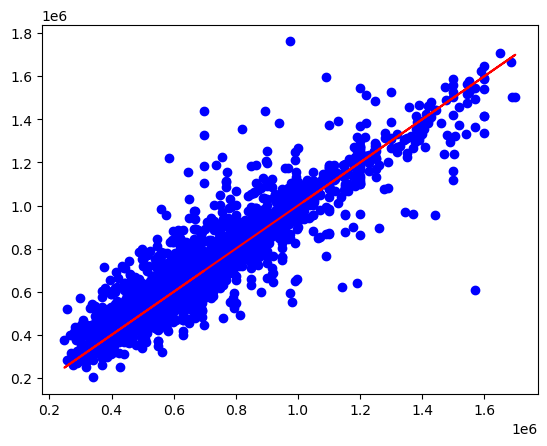

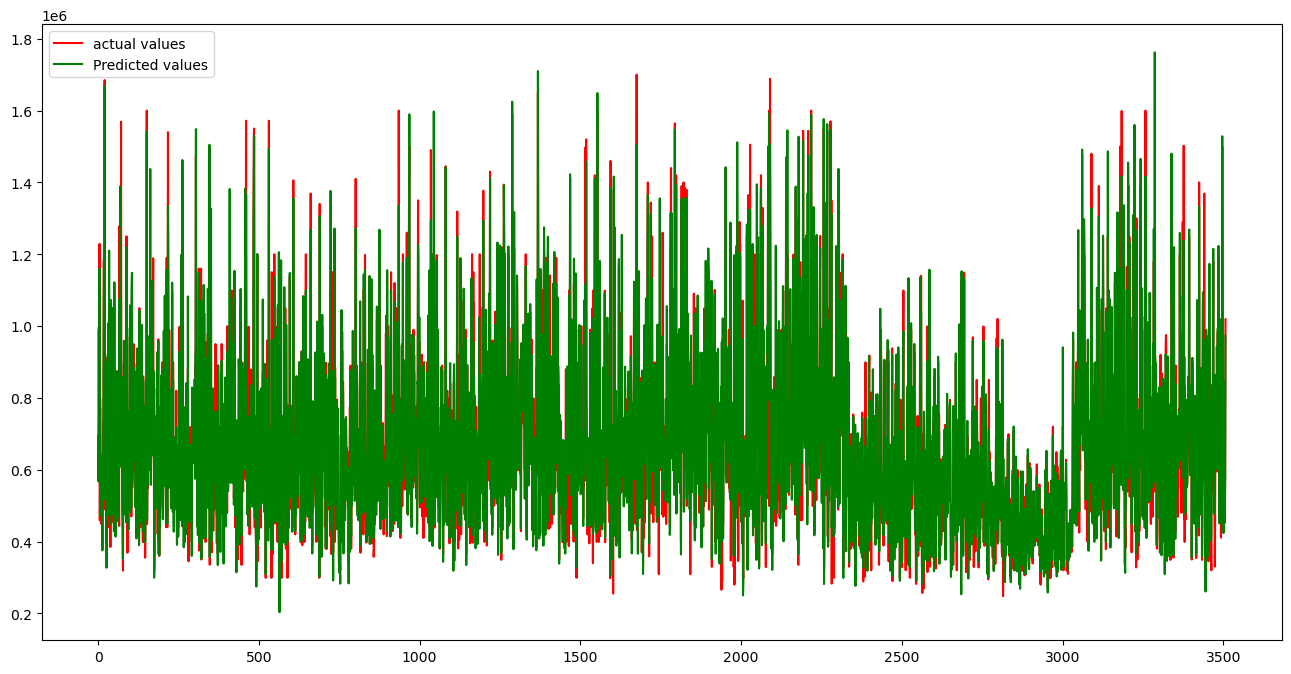

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 54136942592.0000 - mean_absolute_percentage_error: 21.8815 - mean_absolute_error: 145548.3750 - logcosh: 145547.8125
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 21030989824.0000 - mean_absolute_percentage_error: 14.6825 - mean_absolute_error: 100596.5859 - logcosh: 100595.7969
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 20390586368.0000 - mean_absolute_percentage_error: 14.3897 - mean_absolute_error: 98792.8828 - logcosh: 98792.1641
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 19606607872.0000 - mean_absolute_percentage_error: 14.0230 - mean_absolute_error: 96519.8438 - logcosh: 96519.0859
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 19292788736.0000 - mean_absolute_percentage_error: 13.8721 - mea

987/987 [==============================] - 3s 3ms/step - loss: 10988325888.0000 - mean_absolute_percentage_error: 10.6986 - mean_absolute_error: 72843.2422 - logcosh: 72842.5312
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 11015255040.0000 - mean_absolute_percentage_error: 10.7348 - mean_absolute_error: 73116.9453 - logcosh: 73116.2422
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 10827930624.0000 - mean_absolute_percentage_error: 10.6312 - mean_absolute_error: 72505.0781 - logcosh: 72504.3672
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 10451499008.0000 - mean_absolute_percentage_error: 10.4751 - mean_absolute_error: 71213.5078 - logcosh: 71212.8594
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 10357510144.0000 - mean_absolute_percentage_error: 10.4669 - mean_absolute_error: 71066.3359 - logcosh: 71065.6484
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 4540959744.0000 - mean_absolute_percentage_error: 7.1180 - mean_absolute_error: 47341.9414 - logcosh: 47341.2070
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 4556251648.0000 - mean_absolute_percentage_error: 7.1392 - mean_absolute_error: 47684.8594 - logcosh: 47684.2344
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 4381757952.0000 - mean_absolute_percentage_error: 6.9540 - mean_absolute_error: 46373.7578 - logcosh: 46373.0508
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 4156216320.0000 - mean_absolute_percentage_error: 6.8432 - mean_absolute_error: 45281.1172 - logcosh: 45280.4062
Epoch 90/200
987/987 [==============================] - 3s 3ms/step - loss: 4197182976.0000 - mean_absolute_percentage_error: 6.8607 - mean_absolute_error: 45503.9961 - logcosh: 45503.3281
Epoch 91/200
987/987 [==============================] - 3s 3ms/step 

987/987 [==============================] - 3s 3ms/step - loss: 2156358912.0000 - mean_absolute_percentage_error: 5.0070 - mean_absolute_error: 33076.9805 - logcosh: 33076.2852
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 2114410880.0000 - mean_absolute_percentage_error: 4.9504 - mean_absolute_error: 32623.6797 - logcosh: 32622.9902
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 2088372224.0000 - mean_absolute_percentage_error: 4.8956 - mean_absolute_error: 32329.4707 - logcosh: 32328.7539
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 1855387136.0000 - mean_absolute_percentage_error: 4.6548 - mean_absolute_error: 30657.6055 - logcosh: 30656.9121
Epoch 133/200
987/987 [==============================] - 3s 3ms/step - loss: 1953897088.0000 - mean_absolute_percentage_error: 4.7471 - mean_absolute_error: 31345.3477 - logcosh: 31344.6484
Epoch 134/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 1198858880.0000 - mean_absolute_percentage_error: 3.7497 - mean_absolute_error: 24645.8438 - logcosh: 24645.1582
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 1108580864.0000 - mean_absolute_percentage_error: 3.6290 - mean_absolute_error: 23771.5938 - logcosh: 23770.9238
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 1242526976.0000 - mean_absolute_percentage_error: 3.8064 - mean_absolute_error: 25100.0527 - logcosh: 25099.3516
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 1239163264.0000 - mean_absolute_percentage_error: 3.7934 - mean_absolute_error: 25050.8926 - logcosh: 25050.1621
Epoch 176/200
987/987 [==============================] - 3s 3ms/step - loss: 1161633280.0000 - mean_absolute_percentage_error: 3.6739 - mean_absolute_error: 24212.3027 - logcosh: 24211.6504
Epoch 177/200
987/987 [==============================] - 3s 3ms/

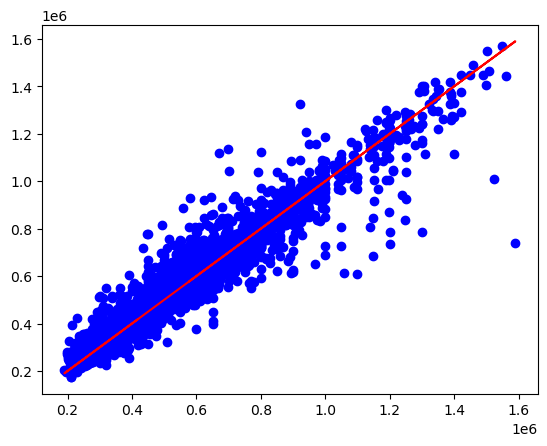

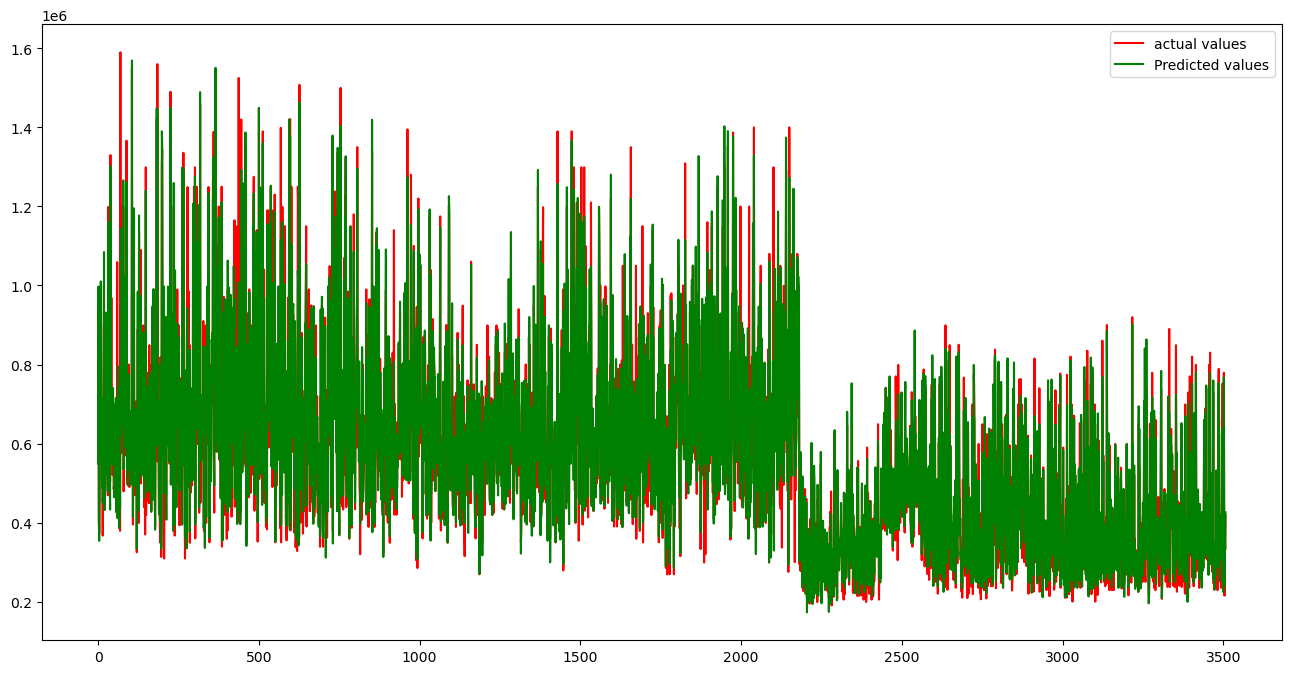

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 546606972928.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 672416.3125 - logcosh: 672415.6250
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 546605105152.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 672414.7500 - logcosh: 672414.0625
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 546604318720.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 672414.0000 - logcosh: 672413.5625
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 546602090496.0000 - mean_absolute_percentage_error: 99.9999 - mean_absolute_error: 672412.7500 - logcosh: 672412.3125
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 546601140224.0000 - mean_absolute_percentage_error: 9

987/987 [==============================] - 2s 3ms/step - loss: 546552676352.0000 - mean_absolute_percentage_error: 99.9923 - mean_absolute_error: 672376.0000 - logcosh: 672374.9375
Epoch 43/200
987/987 [==============================] - 2s 3ms/step - loss: 546550644736.0000 - mean_absolute_percentage_error: 99.9923 - mean_absolute_error: 672374.2500 - logcosh: 672373.6250
Epoch 44/200
987/987 [==============================] - 2s 3ms/step - loss: 546549465088.0000 - mean_absolute_percentage_error: 99.9922 - mean_absolute_error: 672374.0000 - logcosh: 672373.2500
Epoch 45/200
987/987 [==============================] - 2s 3ms/step - loss: 546548613120.0000 - mean_absolute_percentage_error: 99.9921 - mean_absolute_error: 672372.5000 - logcosh: 672371.6875
Epoch 46/200
987/987 [==============================] - 2s 3ms/step - loss: 546546974720.0000 - mean_absolute_percentage_error: 99.9921 - mean_absolute_error: 672372.3125 - logcosh: 672371.6875
Epoch 47/200
987/987 [=====================

987/987 [==============================] - 2s 2ms/step - loss: 546496741376.0000 - mean_absolute_percentage_error: 99.9848 - mean_absolute_error: 672334.1250 - logcosh: 672333.5000
Epoch 85/200
987/987 [==============================] - 2s 3ms/step - loss: 546495758336.0000 - mean_absolute_percentage_error: 99.9847 - mean_absolute_error: 672333.5625 - logcosh: 672332.8750
Epoch 86/200
987/987 [==============================] - 2s 3ms/step - loss: 546493988864.0000 - mean_absolute_percentage_error: 99.9846 - mean_absolute_error: 672332.8750 - logcosh: 672332.0000
Epoch 87/200
987/987 [==============================] - 2s 2ms/step - loss: 546492809216.0000 - mean_absolute_percentage_error: 99.9845 - mean_absolute_error: 672331.4375 - logcosh: 672330.6875
Epoch 88/200
987/987 [==============================] - 2s 2ms/step - loss: 546491596800.0000 - mean_absolute_percentage_error: 99.9844 - mean_absolute_error: 672331.1875 - logcosh: 672330.4375
Epoch 89/200
987/987 [=====================

987/987 [==============================] - 3s 3ms/step - loss: 546441527296.0000 - mean_absolute_percentage_error: 99.9773 - mean_absolute_error: 672293.1250 - logcosh: 672292.4375
Epoch 127/200
987/987 [==============================] - 3s 3ms/step - loss: 546439921664.0000 - mean_absolute_percentage_error: 99.9774 - mean_absolute_error: 672292.3125 - logcosh: 672291.3125
Epoch 128/200
987/987 [==============================] - 3s 3ms/step - loss: 546438479872.0000 - mean_absolute_percentage_error: 99.9772 - mean_absolute_error: 672291.3125 - logcosh: 672290.5000
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 546436644864.0000 - mean_absolute_percentage_error: 99.9769 - mean_absolute_error: 672290.4375 - logcosh: 672289.7500
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 546435989504.0000 - mean_absolute_percentage_error: 99.9768 - mean_absolute_error: 672289.1250 - logcosh: 672288.6250
Epoch 131/200
987/987 [================

987/987 [==============================] - 3s 3ms/step - loss: 546385920000.0000 - mean_absolute_percentage_error: 99.9700 - mean_absolute_error: 672252.0625 - logcosh: 672251.3125
Epoch 169/200
987/987 [==============================] - 3s 3ms/step - loss: 546384576512.0000 - mean_absolute_percentage_error: 99.9699 - mean_absolute_error: 672250.6250 - logcosh: 672250.1875
Epoch 170/200
987/987 [==============================] - 3s 3ms/step - loss: 546383069184.0000 - mean_absolute_percentage_error: 99.9697 - mean_absolute_error: 672249.6875 - logcosh: 672248.8750
Epoch 171/200
987/987 [==============================] - 3s 3ms/step - loss: 546381791232.0000 - mean_absolute_percentage_error: 99.9696 - mean_absolute_error: 672248.7500 - logcosh: 672248.0625
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 546380316672.0000 - mean_absolute_percentage_error: 99.9694 - mean_absolute_error: 672247.3750 - logcosh: 672246.8125
Epoch 173/200
987/987 [================

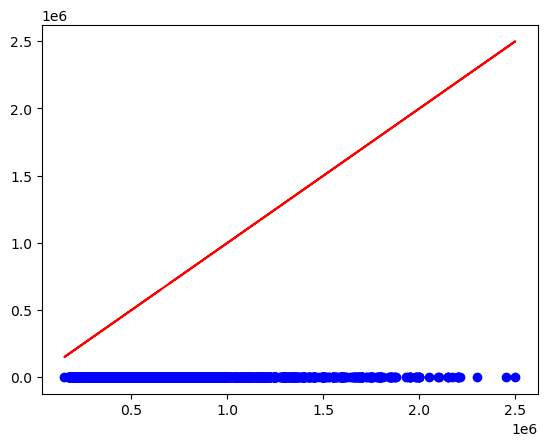

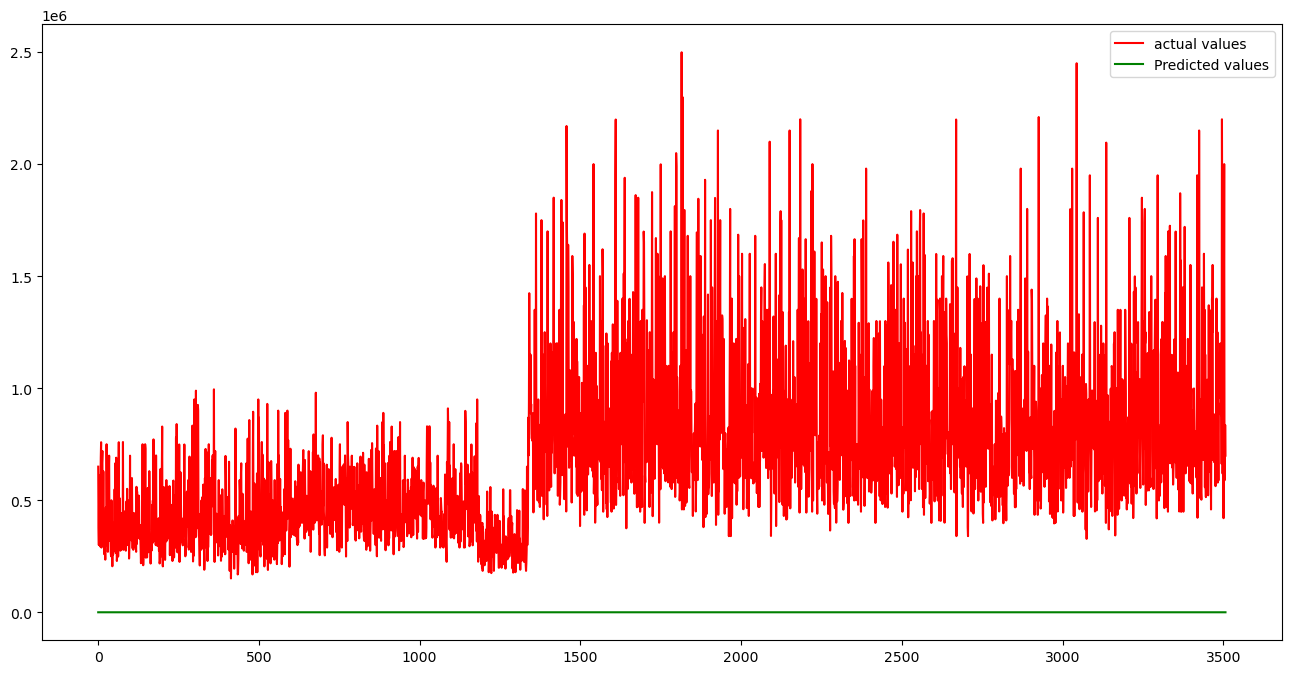

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 50097315840.0000 - mean_absolute_percentage_error: 21.5962 - mean_absolute_error: 139993.2031 - logcosh: 139992.5156
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 19645630464.0000 - mean_absolute_percentage_error: 14.4740 - mean_absolute_error: 96839.2266 - logcosh: 96838.4766
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 18936053760.0000 - mean_absolute_percentage_error: 14.1516 - mean_absolute_error: 94743.9922 - logcosh: 94743.3125
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 18389098496.0000 - mean_absolute_percentage_error: 13.8456 - mean_absolute_error: 93069.7422 - logcosh: 93068.9922
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 18088828928.0000 - mean_absolute_percentage_error: 13.7059 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 11006285824.0000 - mean_absolute_percentage_error: 10.9652 - mean_absolute_error: 72754.5625 - logcosh: 72753.8750
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 10817822720.0000 - mean_absolute_percentage_error: 10.8761 - mean_absolute_error: 72257.1562 - logcosh: 72256.5078
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 10684226560.0000 - mean_absolute_percentage_error: 10.8075 - mean_absolute_error: 71794.6328 - logcosh: 71793.9141
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 10347318272.0000 - mean_absolute_percentage_error: 10.6831 - mean_absolute_error: 70770.1562 - logcosh: 70769.4922
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 10365670400.0000 - mean_absolute_percentage_error: 10.7114 - mean_absolute_error: 70821.8516 - logcosh: 70821.1953
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 5304464896.0000 - mean_absolute_percentage_error: 7.8696 - mean_absolute_error: 50984.2891 - logcosh: 50983.6094
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 5384619008.0000 - mean_absolute_percentage_error: 7.9618 - mean_absolute_error: 51599.4375 - logcosh: 51598.7266
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 5014368768.0000 - mean_absolute_percentage_error: 7.6736 - mean_absolute_error: 49532.1914 - logcosh: 49531.4844
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 5105321472.0000 - mean_absolute_percentage_error: 7.7477 - mean_absolute_error: 50104.0664 - logcosh: 50103.3555
Epoch 90/200
987/987 [==============================] - 3s 3ms/step - loss: 4841162240.0000 - mean_absolute_percentage_error: 7.5599 - mean_absolute_error: 48729.5117 - logcosh: 48728.8438
Epoch 91/200
987/987 [==============================] - 3s 3ms/step 

987/987 [==============================] - 3s 3ms/step - loss: 2353454592.0000 - mean_absolute_percentage_error: 5.4067 - mean_absolute_error: 34527.9297 - logcosh: 34527.2266
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 2255423232.0000 - mean_absolute_percentage_error: 5.2491 - mean_absolute_error: 33483.9609 - logcosh: 33483.2695
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 2302290176.0000 - mean_absolute_percentage_error: 5.3498 - mean_absolute_error: 34185.1211 - logcosh: 34184.4453
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 2064171520.0000 - mean_absolute_percentage_error: 5.0949 - mean_absolute_error: 32471.7188 - logcosh: 32471.0352
Epoch 133/200
987/987 [==============================] - 3s 3ms/step - loss: 2185756672.0000 - mean_absolute_percentage_error: 5.2084 - mean_absolute_error: 33202.9688 - logcosh: 33202.2969
Epoch 134/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 1225772032.0000 - mean_absolute_percentage_error: 3.9072 - mean_absolute_error: 24831.0352 - logcosh: 24830.3516
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 1230090496.0000 - mean_absolute_percentage_error: 3.9534 - mean_absolute_error: 25122.3340 - logcosh: 25121.6504
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 1294862848.0000 - mean_absolute_percentage_error: 4.0234 - mean_absolute_error: 25657.2949 - logcosh: 25656.6055
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 1241219840.0000 - mean_absolute_percentage_error: 3.9720 - mean_absolute_error: 25203.1289 - logcosh: 25202.4199
Epoch 176/200
987/987 [==============================] - 3s 3ms/step - loss: 1198004224.0000 - mean_absolute_percentage_error: 3.8881 - mean_absolute_error: 24699.4512 - logcosh: 24698.7363
Epoch 177/200
987/987 [==============================] - 3s 3ms/

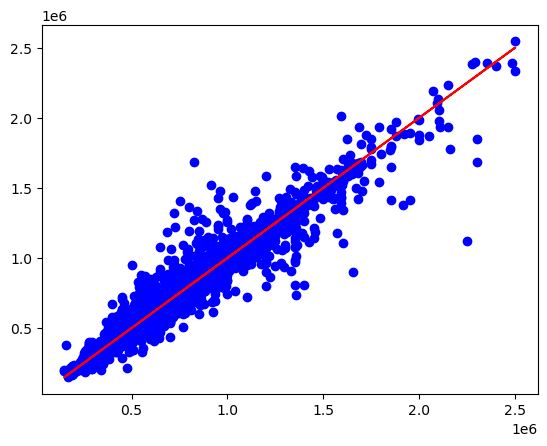

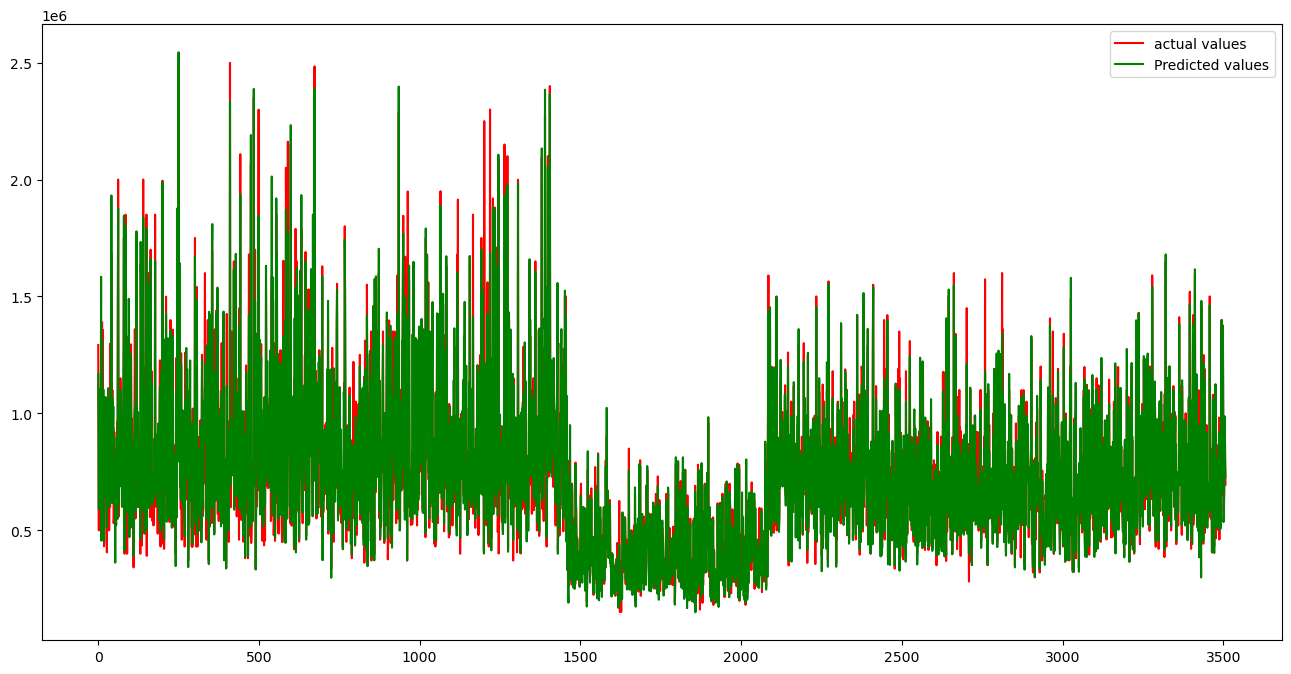

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 57725153280.0000 - mean_absolute_percentage_error: 22.8673 - mean_absolute_error: 149572.4531 - logcosh: 149571.8125
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 20924796928.0000 - mean_absolute_percentage_error: 14.7645 - mean_absolute_error: 99787.4609 - logcosh: 99786.7812
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 20283553792.0000 - mean_absolute_percentage_error: 14.4580 - mean_absolute_error: 97897.0938 - logcosh: 97896.4141
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 19444410368.0000 - mean_absolute_percentage_error: 14.0523 - mean_absolute_error: 95600.4141 - logcosh: 95599.7734
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 18960154624.0000 - mean_absolute_percentage_error: 13.8149 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 11474396160.0000 - mean_absolute_percentage_error: 10.9799 - mean_absolute_error: 73994.6953 - logcosh: 73994.0391
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 11416344576.0000 - mean_absolute_percentage_error: 10.9666 - mean_absolute_error: 73952.7891 - logcosh: 73952.0859
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 11138947072.0000 - mean_absolute_percentage_error: 10.8573 - mean_absolute_error: 73106.6016 - logcosh: 73105.8906
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 10759352320.0000 - mean_absolute_percentage_error: 10.6942 - mean_absolute_error: 71948.6875 - logcosh: 71947.9922
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 10812849152.0000 - mean_absolute_percentage_error: 10.7088 - mean_absolute_error: 72013.5703 - logcosh: 72012.9375
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 5266233344.0000 - mean_absolute_percentage_error: 7.5840 - mean_absolute_error: 50435.3281 - logcosh: 50434.6445
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 5387522560.0000 - mean_absolute_percentage_error: 7.7002 - mean_absolute_error: 51171.9336 - logcosh: 51171.3008
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 5025274880.0000 - mean_absolute_percentage_error: 7.4304 - mean_absolute_error: 49234.4297 - logcosh: 49233.6953
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 5002120704.0000 - mean_absolute_percentage_error: 7.4462 - mean_absolute_error: 49299.3555 - logcosh: 49298.7109
Epoch 90/200
987/987 [==============================] - 3s 3ms/step - loss: 4879570432.0000 - mean_absolute_percentage_error: 7.3396 - mean_absolute_error: 48587.5586 - logcosh: 48586.9062
Epoch 91/200
987/987 [==============================] - 3s 3ms/step 

987/987 [==============================] - 3s 3ms/step - loss: 2379362304.0000 - mean_absolute_percentage_error: 5.2310 - mean_absolute_error: 34386.7266 - logcosh: 34386.0000
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 2122803840.0000 - mean_absolute_percentage_error: 4.9673 - mean_absolute_error: 32419.6387 - logcosh: 32418.9336
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 2340090368.0000 - mean_absolute_percentage_error: 5.1681 - mean_absolute_error: 33915.9023 - logcosh: 33915.2148
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 2140036736.0000 - mean_absolute_percentage_error: 5.0003 - mean_absolute_error: 32672.3613 - logcosh: 32671.6738
Epoch 133/200
987/987 [==============================] - 3s 3ms/step - loss: 2184031232.0000 - mean_absolute_percentage_error: 5.0286 - mean_absolute_error: 32995.1719 - logcosh: 32994.4766
Epoch 134/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 1397437056.0000 - mean_absolute_percentage_error: 4.0429 - mean_absolute_error: 26525.8105 - logcosh: 26525.1348
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 1294548992.0000 - mean_absolute_percentage_error: 3.9246 - mean_absolute_error: 25662.4316 - logcosh: 25661.7539
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 1168130560.0000 - mean_absolute_percentage_error: 3.7257 - mean_absolute_error: 24286.0078 - logcosh: 24285.3047
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 1307716864.0000 - mean_absolute_percentage_error: 3.9256 - mean_absolute_error: 25652.7520 - logcosh: 25652.0391
Epoch 176/200
987/987 [==============================] - 3s 3ms/step - loss: 1176725376.0000 - mean_absolute_percentage_error: 3.7475 - mean_absolute_error: 24451.9160 - logcosh: 24451.1777
Epoch 177/200
987/987 [==============================] - 3s 3ms/

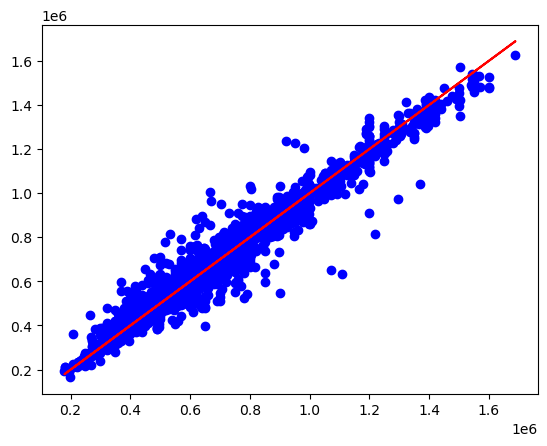

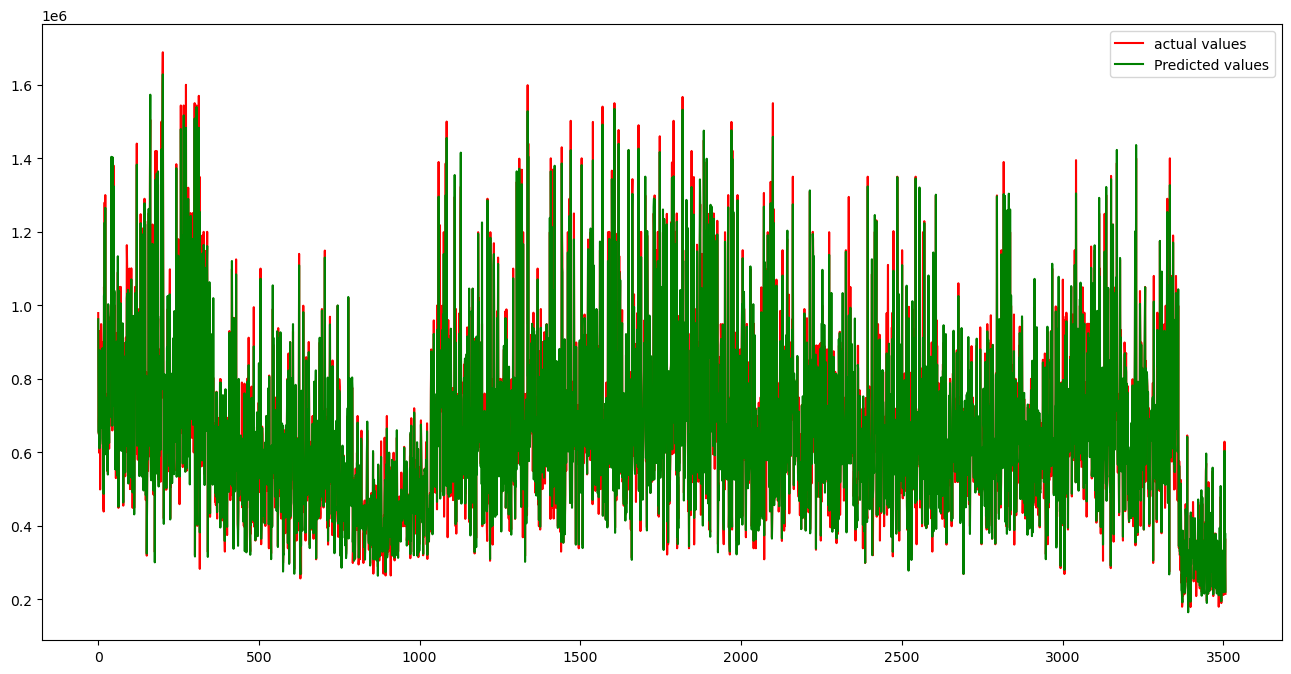

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 48709963776.0000 - mean_absolute_percentage_error: 21.0608 - mean_absolute_error: 139436.7656 - logcosh: 139435.9688
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 20607893504.0000 - mean_absolute_percentage_error: 14.6150 - mean_absolute_error: 99911.1172 - logcosh: 99910.4844
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 20042510336.0000 - mean_absolute_percentage_error: 14.3484 - mean_absolute_error: 98272.9844 - logcosh: 98272.3594
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 19186706432.0000 - mean_absolute_percentage_error: 13.9171 - mean_absolute_error: 95671.6406 - logcosh: 95670.9531
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 18864717824.0000 - mean_absolute_percentage_error: 13.7986 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 10325398528.0000 - mean_absolute_percentage_error: 10.4766 - mean_absolute_error: 70968.6406 - logcosh: 70967.9609
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 10271499264.0000 - mean_absolute_percentage_error: 10.4357 - mean_absolute_error: 70806.6953 - logcosh: 70806.0234
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 9927525376.0000 - mean_absolute_percentage_error: 10.2768 - mean_absolute_error: 69627.5625 - logcosh: 69626.8516
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 9559135232.0000 - mean_absolute_percentage_error: 10.1097 - mean_absolute_error: 68431.5547 - logcosh: 68430.8516
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 9721018368.0000 - mean_absolute_percentage_error: 10.2027 - mean_absolute_error: 68901.3438 - logcosh: 68900.6641
Epoch 48/200
987/987 [==============================] - 3s 3m

987/987 [==============================] - 3s 3ms/step - loss: 4141952512.0000 - mean_absolute_percentage_error: 6.8113 - mean_absolute_error: 45248.8242 - logcosh: 45248.1016
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 4199136256.0000 - mean_absolute_percentage_error: 6.8260 - mean_absolute_error: 45467.8867 - logcosh: 45467.2148
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 3903576064.0000 - mean_absolute_percentage_error: 6.6154 - mean_absolute_error: 43962.9336 - logcosh: 43962.2383
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 3903719680.0000 - mean_absolute_percentage_error: 6.5745 - mean_absolute_error: 43638.1211 - logcosh: 43637.4375
Epoch 90/200
987/987 [==============================] - 3s 3ms/step - loss: 3827429376.0000 - mean_absolute_percentage_error: 6.5773 - mean_absolute_error: 43656.8867 - logcosh: 43656.2422
Epoch 91/200
987/987 [==============================] - 3s 3ms/step 

987/987 [==============================] - 3s 3ms/step - loss: 1913487488.0000 - mean_absolute_percentage_error: 4.6956 - mean_absolute_error: 30956.8828 - logcosh: 30956.1816
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 1901228160.0000 - mean_absolute_percentage_error: 4.7081 - mean_absolute_error: 31133.8164 - logcosh: 31133.0879
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 1726856704.0000 - mean_absolute_percentage_error: 4.4979 - mean_absolute_error: 29540.4043 - logcosh: 29539.6914
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 1722396544.0000 - mean_absolute_percentage_error: 4.5171 - mean_absolute_error: 29673.0801 - logcosh: 29672.3828
Epoch 133/200
987/987 [==============================] - 3s 3ms/step - loss: 1842214656.0000 - mean_absolute_percentage_error: 4.6056 - mean_absolute_error: 30404.5469 - logcosh: 30403.8672
Epoch 134/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 959842688.0000 - mean_absolute_percentage_error: 3.3903 - mean_absolute_error: 22165.1797 - logcosh: 22164.4863
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 995777792.0000 - mean_absolute_percentage_error: 3.4560 - mean_absolute_error: 22623.1934 - logcosh: 22622.4980
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 1096718720.0000 - mean_absolute_percentage_error: 3.5926 - mean_absolute_error: 23647.3496 - logcosh: 23646.6641
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 1038170944.0000 - mean_absolute_percentage_error: 3.4985 - mean_absolute_error: 22959.7480 - logcosh: 22959.0547
Epoch 176/200
987/987 [==============================] - 3s 3ms/step - loss: 989090944.0000 - mean_absolute_percentage_error: 3.4562 - mean_absolute_error: 22621.6953 - logcosh: 22621.0039
Epoch 177/200
987/987 [==============================] - 3s 3ms/ste

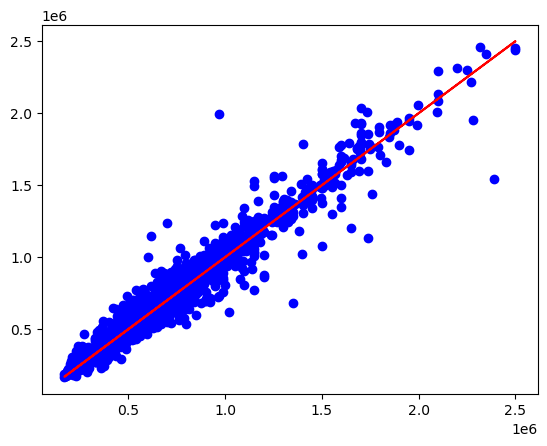

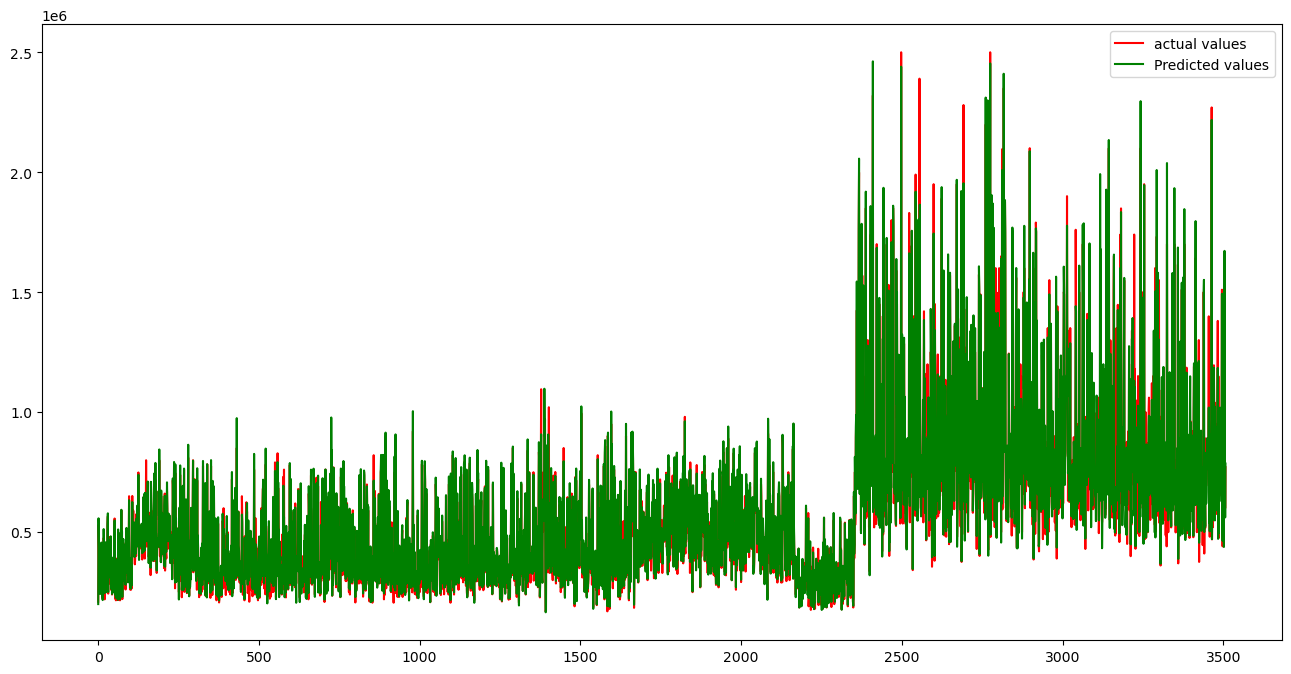

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 531609419776.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 662340.0000 - logcosh: 662339.5000
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 531608764416.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 662338.6875 - logcosh: 662338.0000
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 531607257088.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 662337.5625 - logcosh: 662336.8750
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 531605520384.0000 - mean_absolute_percentage_error: 99.9999 - mean_absolute_error: 662336.5625 - logcosh: 662336.1875
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 531604602880.0000 - mean_absolute_percentage_error: 9

987/987 [==============================] - 3s 3ms/step - loss: 531556007936.0000 - mean_absolute_percentage_error: 99.9923 - mean_absolute_error: 662299.8125 - logcosh: 662298.8750
Epoch 43/200
987/987 [==============================] - 3s 3ms/step - loss: 531554828288.0000 - mean_absolute_percentage_error: 99.9922 - mean_absolute_error: 662299.0000 - logcosh: 662298.1875
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 531553517568.0000 - mean_absolute_percentage_error: 99.9922 - mean_absolute_error: 662298.0000 - logcosh: 662297.2500
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 531552567296.0000 - mean_absolute_percentage_error: 99.9921 - mean_absolute_error: 662297.4375 - logcosh: 662296.7500
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 531551387648.0000 - mean_absolute_percentage_error: 99.9921 - mean_absolute_error: 662296.3125 - logcosh: 662295.8125
Epoch 47/200
987/987 [=====================

987/987 [==============================] - 3s 3ms/step - loss: 531501252608.0000 - mean_absolute_percentage_error: 99.9847 - mean_absolute_error: 662258.3750 - logcosh: 662257.7500
Epoch 85/200
987/987 [==============================] - 3s 3ms/step - loss: 531500302336.0000 - mean_absolute_percentage_error: 99.9846 - mean_absolute_error: 662256.9375 - logcosh: 662256.3750
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 531499253760.0000 - mean_absolute_percentage_error: 99.9845 - mean_absolute_error: 662257.4375 - logcosh: 662256.7500
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 531497517056.0000 - mean_absolute_percentage_error: 99.9843 - mean_absolute_error: 662255.2500 - logcosh: 662254.5625
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 531496239104.0000 - mean_absolute_percentage_error: 99.9842 - mean_absolute_error: 662254.0625 - logcosh: 662253.5000
Epoch 89/200
987/987 [=====================

987/987 [==============================] - 2s 2ms/step - loss: 531446530048.0000 - mean_absolute_percentage_error: 99.9771 - mean_absolute_error: 662217.1250 - logcosh: 662216.4375
Epoch 127/200
987/987 [==============================] - 2s 2ms/step - loss: 531445547008.0000 - mean_absolute_percentage_error: 99.9770 - mean_absolute_error: 662216.0000 - logcosh: 662215.3125
Epoch 128/200
987/987 [==============================] - 2s 2ms/step - loss: 531444072448.0000 - mean_absolute_percentage_error: 99.9768 - mean_absolute_error: 662215.1250 - logcosh: 662214.4375
Epoch 129/200
987/987 [==============================] - 2s 3ms/step - loss: 531443023872.0000 - mean_absolute_percentage_error: 99.9767 - mean_absolute_error: 662213.8750 - logcosh: 662213.0000
Epoch 130/200
987/987 [==============================] - 2s 3ms/step - loss: 531441647616.0000 - mean_absolute_percentage_error: 99.9766 - mean_absolute_error: 662212.9375 - logcosh: 662212.3125
Epoch 131/200
987/987 [================

987/987 [==============================] - 2s 2ms/step - loss: 531391741952.0000 - mean_absolute_percentage_error: 99.9696 - mean_absolute_error: 662175.8750 - logcosh: 662175.2500
Epoch 169/200
987/987 [==============================] - 2s 2ms/step - loss: 531390857216.0000 - mean_absolute_percentage_error: 99.9695 - mean_absolute_error: 662174.6250 - logcosh: 662174.0625
Epoch 170/200
987/987 [==============================] - 2s 2ms/step - loss: 531389087744.0000 - mean_absolute_percentage_error: 99.9693 - mean_absolute_error: 662174.1875 - logcosh: 662173.5625
Epoch 171/200
987/987 [==============================] - 2s 3ms/step - loss: 531388399616.0000 - mean_absolute_percentage_error: 99.9691 - mean_absolute_error: 662173.1250 - logcosh: 662172.4375
Epoch 172/200
987/987 [==============================] - 2s 3ms/step - loss: 531386925056.0000 - mean_absolute_percentage_error: 99.9690 - mean_absolute_error: 662172.3750 - logcosh: 662171.8125
Epoch 173/200
987/987 [================

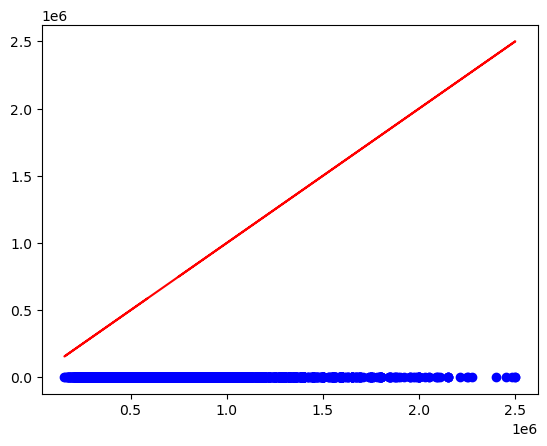

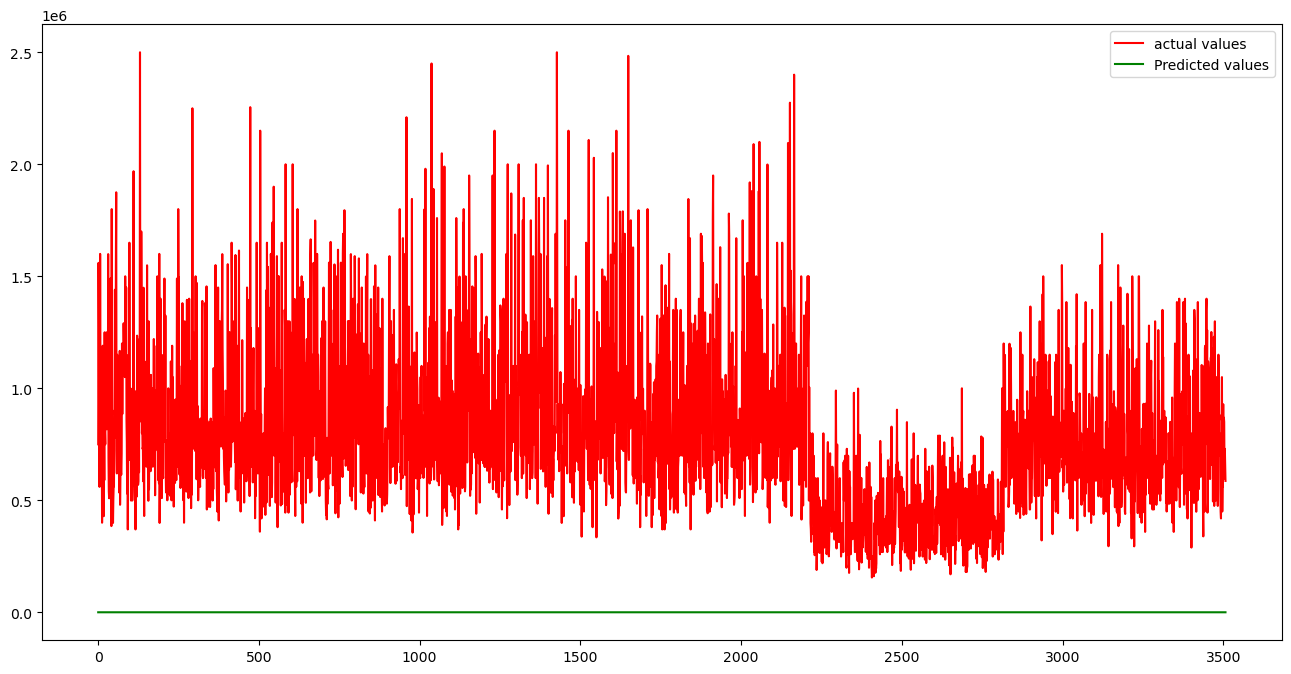

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 50852040704.0000 - mean_absolute_percentage_error: 21.5542 - mean_absolute_error: 140781.8594 - logcosh: 140781.1719
Epoch 2/200
987/987 [==============================] - 2s 3ms/step - loss: 20835584000.0000 - mean_absolute_percentage_error: 14.7709 - mean_absolute_error: 99419.5156 - logcosh: 99418.8203
Epoch 3/200
987/987 [==============================] - 2s 2ms/step - loss: 20263309312.0000 - mean_absolute_percentage_error: 14.5148 - mean_absolute_error: 97722.4219 - logcosh: 97721.7812
Epoch 4/200
987/987 [==============================] - 2s 2ms/step - loss: 19122223104.0000 - mean_absolute_percentage_error: 13.9231 - mean_absolute_error: 94186.5547 - logcosh: 94185.8672
Epoch 5/200
987/987 [==============================] - 2s 2ms/step - loss: 18990120960.0000 - mean_absolute_percentage_error: 13.9129 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 10630522880.0000 - mean_absolute_percentage_error: 10.7630 - mean_absolute_error: 71540.1250 - logcosh: 71539.4688
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 10505202688.0000 - mean_absolute_percentage_error: 10.6538 - mean_absolute_error: 70962.7266 - logcosh: 70962.0000
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 10114780160.0000 - mean_absolute_percentage_error: 10.5133 - mean_absolute_error: 69849.0859 - logcosh: 69848.3750
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 9728623616.0000 - mean_absolute_percentage_error: 10.3175 - mean_absolute_error: 68445.2812 - logcosh: 68444.6016
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 10253611008.0000 - mean_absolute_percentage_error: 10.5791 - mean_absolute_error: 70284.6094 - logcosh: 70283.8984
Epoch 48/200
987/987 [==============================] - 3s 

987/987 [==============================] - 3s 3ms/step - loss: 4878562304.0000 - mean_absolute_percentage_error: 7.3946 - mean_absolute_error: 48493.6758 - logcosh: 48492.9609
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 4590724608.0000 - mean_absolute_percentage_error: 7.2336 - mean_absolute_error: 47133.7617 - logcosh: 47133.0898
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 4405326848.0000 - mean_absolute_percentage_error: 7.1255 - mean_absolute_error: 46315.0039 - logcosh: 46314.2852
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 4392066560.0000 - mean_absolute_percentage_error: 7.0677 - mean_absolute_error: 46165.9805 - logcosh: 46165.2656
Epoch 90/200
987/987 [==============================] - 3s 3ms/step - loss: 4363598336.0000 - mean_absolute_percentage_error: 7.0297 - mean_absolute_error: 45930.8984 - logcosh: 45930.2188
Epoch 91/200
987/987 [==============================] - 3s 3ms/step 

987/987 [==============================] - 3s 3ms/step - loss: 1968789376.0000 - mean_absolute_percentage_error: 4.8271 - mean_absolute_error: 31077.0117 - logcosh: 31076.3301
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 1935372160.0000 - mean_absolute_percentage_error: 4.8555 - mean_absolute_error: 31118.0332 - logcosh: 31117.3418
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 1999725696.0000 - mean_absolute_percentage_error: 4.8882 - mean_absolute_error: 31511.5312 - logcosh: 31510.8125
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 1938822912.0000 - mean_absolute_percentage_error: 4.7945 - mean_absolute_error: 30985.0449 - logcosh: 30984.3516
Epoch 133/200
987/987 [==============================] - 3s 3ms/step - loss: 1978475392.0000 - mean_absolute_percentage_error: 4.8160 - mean_absolute_error: 31154.0547 - logcosh: 31153.3672
Epoch 134/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 1162128896.0000 - mean_absolute_percentage_error: 3.7396 - mean_absolute_error: 24137.7754 - logcosh: 24137.0820
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 1421950208.0000 - mean_absolute_percentage_error: 4.0148 - mean_absolute_error: 25995.3906 - logcosh: 25994.6914
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 1028098432.0000 - mean_absolute_percentage_error: 3.5677 - mean_absolute_error: 22819.1602 - logcosh: 22818.4668
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 1210083968.0000 - mean_absolute_percentage_error: 3.8090 - mean_absolute_error: 24602.0977 - logcosh: 24601.4180
Epoch 176/200
987/987 [==============================] - 3s 3ms/step - loss: 1204536832.0000 - mean_absolute_percentage_error: 3.7681 - mean_absolute_error: 24341.1133 - logcosh: 24340.4180
Epoch 177/200
987/987 [==============================] - 3s 3ms/

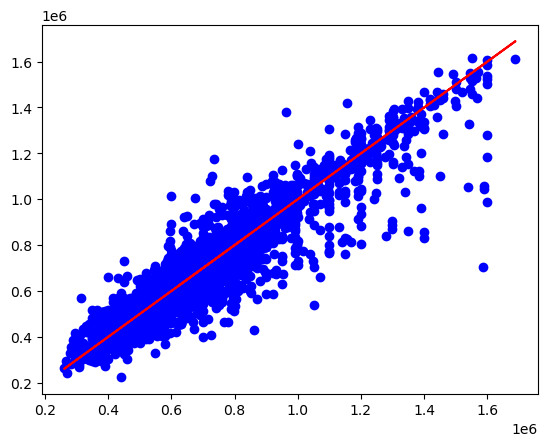

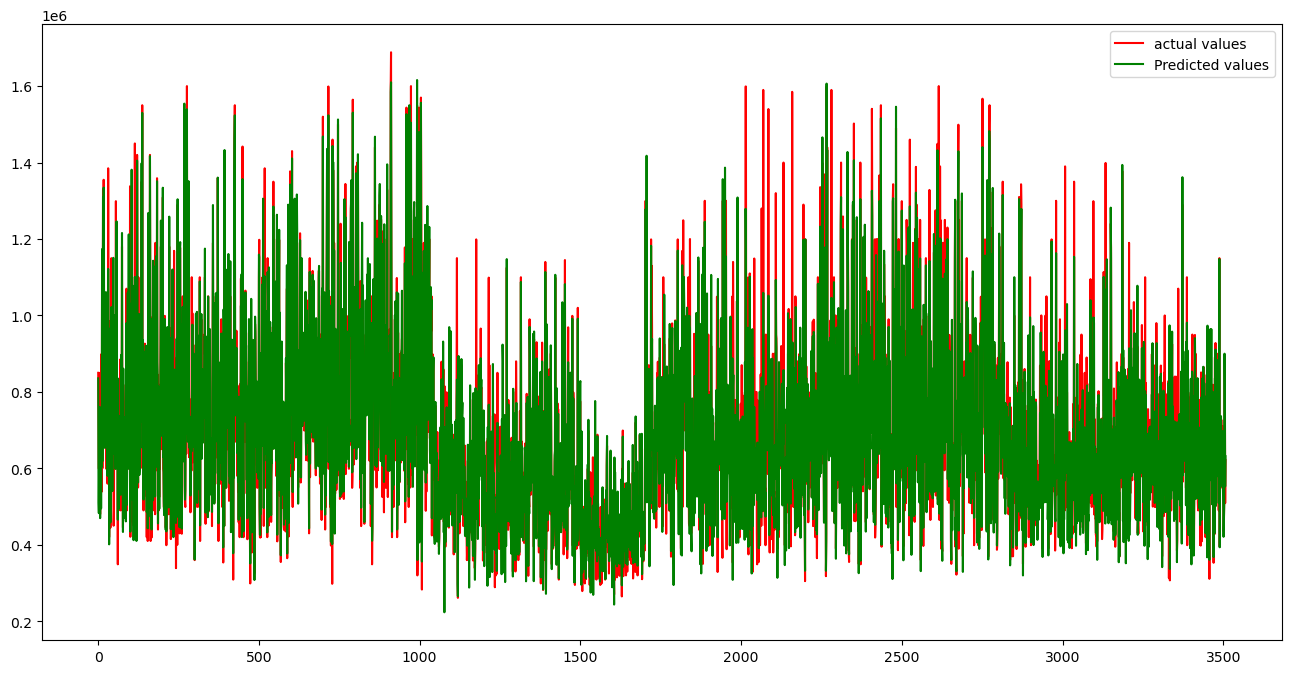

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 573615243264.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 689880.3750 - logcosh: 689879.8125
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 573613604864.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 689879.8750 - logcosh: 689879.1250
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 573612490752.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 689878.7500 - logcosh: 689878.0625
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 573610721280.0000 - mean_absolute_percentage_error: 99.9999 - mean_absolute_error: 689877.6875 - logcosh: 689877.2500
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 573609869312.0000 - mean_absolute_percentage_error: 9

987/987 [==============================] - 3s 3ms/step - loss: 573559537664.0000 - mean_absolute_percentage_error: 99.9924 - mean_absolute_error: 689840.5000 - logcosh: 689839.7500
Epoch 43/200
987/987 [==============================] - 3s 3ms/step - loss: 573558751232.0000 - mean_absolute_percentage_error: 99.9923 - mean_absolute_error: 689839.3750 - logcosh: 689838.5625
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 573556981760.0000 - mean_absolute_percentage_error: 99.9923 - mean_absolute_error: 689838.5625 - logcosh: 689838.0625
Epoch 45/200
987/987 [==============================] - 2s 3ms/step - loss: 573555343360.0000 - mean_absolute_percentage_error: 99.9922 - mean_absolute_error: 689837.5000 - logcosh: 689836.6250
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 573554360320.0000 - mean_absolute_percentage_error: 99.9922 - mean_absolute_error: 689836.3125 - logcosh: 689835.5000
Epoch 47/200
987/987 [=====================

987/987 [==============================] - 3s 3ms/step - loss: 573502390272.0000 - mean_absolute_percentage_error: 99.9851 - mean_absolute_error: 689799.3750 - logcosh: 689798.7500
Epoch 85/200
987/987 [==============================] - 3s 3ms/step - loss: 573501276160.0000 - mean_absolute_percentage_error: 99.9850 - mean_absolute_error: 689798.2500 - logcosh: 689797.3750
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 573500096512.0000 - mean_absolute_percentage_error: 99.9849 - mean_absolute_error: 689797.6250 - logcosh: 689797.0625
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 573498589184.0000 - mean_absolute_percentage_error: 99.9847 - mean_absolute_error: 689796.2500 - logcosh: 689795.6875
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 573497081856.0000 - mean_absolute_percentage_error: 99.9847 - mean_absolute_error: 689795.4375 - logcosh: 689794.8125
Epoch 89/200
987/987 [=====================

987/987 [==============================] - 3s 3ms/step - loss: 573445505024.0000 - mean_absolute_percentage_error: 99.9780 - mean_absolute_error: 689758.0000 - logcosh: 689757.0625
Epoch 127/200
987/987 [==============================] - 3s 3ms/step - loss: 573444063232.0000 - mean_absolute_percentage_error: 99.9778 - mean_absolute_error: 689756.8750 - logcosh: 689755.8750
Epoch 128/200
987/987 [==============================] - 3s 3ms/step - loss: 573442686976.0000 - mean_absolute_percentage_error: 99.9777 - mean_absolute_error: 689755.9375 - logcosh: 689755.0625
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 573441441792.0000 - mean_absolute_percentage_error: 99.9775 - mean_absolute_error: 689754.7500 - logcosh: 689754.0000
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 573439541248.0000 - mean_absolute_percentage_error: 99.9774 - mean_absolute_error: 689753.7500 - logcosh: 689753.1250
Epoch 131/200
987/987 [================

987/987 [==============================] - 3s 3ms/step - loss: 573388619776.0000 - mean_absolute_percentage_error: 99.9709 - mean_absolute_error: 689716.3125 - logcosh: 689715.5625
Epoch 169/200
987/987 [==============================] - 3s 3ms/step - loss: 573387243520.0000 - mean_absolute_percentage_error: 99.9707 - mean_absolute_error: 689715.2500 - logcosh: 689714.5625
Epoch 170/200
987/987 [==============================] - 3s 3ms/step - loss: 573385998336.0000 - mean_absolute_percentage_error: 99.9706 - mean_absolute_error: 689714.8750 - logcosh: 689714.1875
Epoch 171/200
987/987 [==============================] - 3s 3ms/step - loss: 573384228864.0000 - mean_absolute_percentage_error: 99.9704 - mean_absolute_error: 689714.4375 - logcosh: 689713.3750
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 573382983680.0000 - mean_absolute_percentage_error: 99.9703 - mean_absolute_error: 689712.9375 - logcosh: 689712.1875
Epoch 173/200
987/987 [================

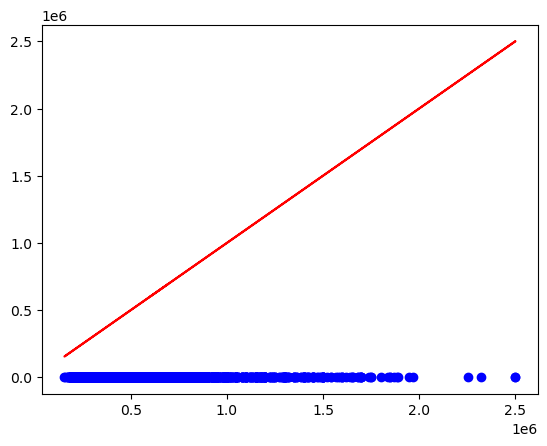

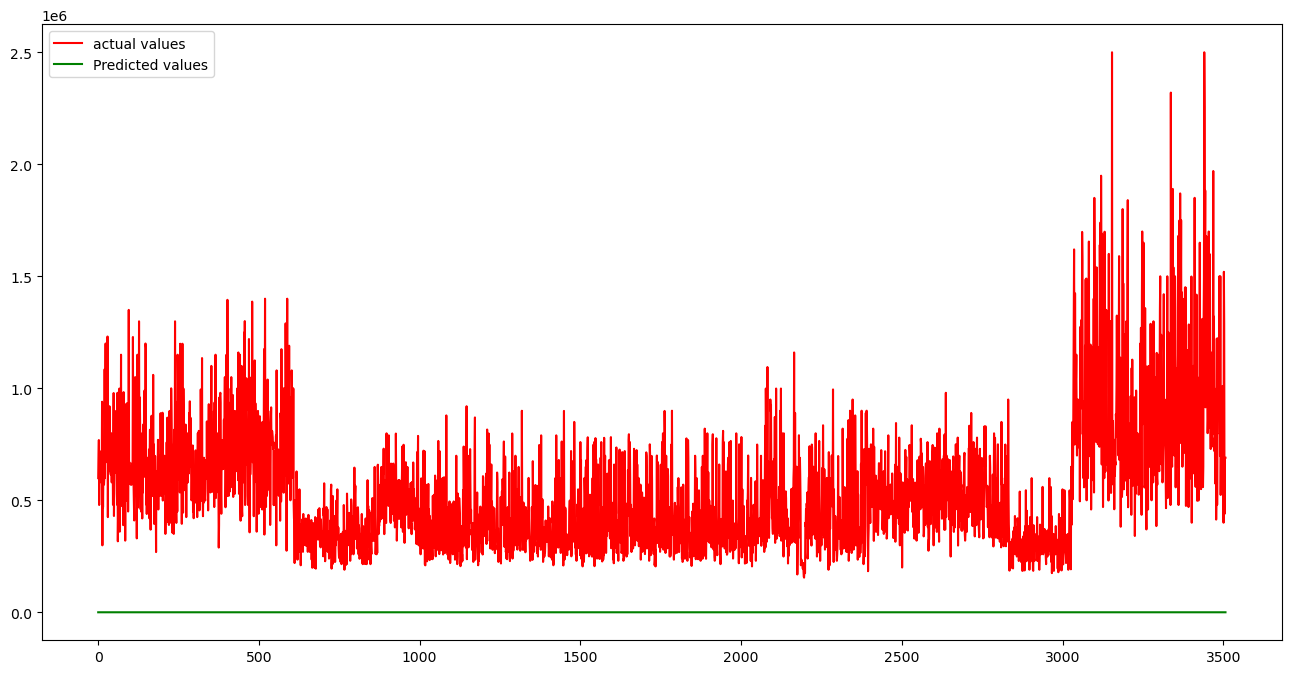

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/200
987/987 [==============================] - 4s 3ms/step - loss: 50199748608.0000 - mean_absolute_percentage_error: 21.8155 - mean_absolute_error: 139633.4688 - logcosh: 139632.7500
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 18777434112.0000 - mean_absolute_percentage_error: 14.3999 - mean_absolute_error: 94837.1797 - logcosh: 94836.5156
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 18132600832.0000 - mean_absolute_percentage_error: 14.1473 - mean_absolute_error: 93118.4844 - logcosh: 93117.7266
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 17400776704.0000 - mean_absolute_percentage_error: 13.7460 - mean_absolute_error: 90875.7500 - logcosh: 90875.0703
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 17183266816.0000 - mean_absolute_percentage_error: 13.6260 - mean

987/987 [==============================] - 3s 3ms/step - loss: 10166129664.0000 - mean_absolute_percentage_error: 10.6776 - mean_absolute_error: 69982.7891 - logcosh: 69982.1016
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 9929635840.0000 - mean_absolute_percentage_error: 10.5503 - mean_absolute_error: 69155.4609 - logcosh: 69154.7344
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 9708286976.0000 - mean_absolute_percentage_error: 10.4365 - mean_absolute_error: 68358.9141 - logcosh: 68358.2422
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 9543512064.0000 - mean_absolute_percentage_error: 10.3675 - mean_absolute_error: 67842.0156 - logcosh: 67841.3359
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 9562798080.0000 - mean_absolute_percentage_error: 10.4034 - mean_absolute_error: 68051.0469 - logcosh: 68050.3594
Epoch 48/200
987/987 [==============================] - 3s 3ms

987/987 [==============================] - 3s 3ms/step - loss: 4391039488.0000 - mean_absolute_percentage_error: 7.2532 - mean_absolute_error: 46460.3594 - logcosh: 46459.6875
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 4358511104.0000 - mean_absolute_percentage_error: 7.1537 - mean_absolute_error: 45882.6914 - logcosh: 45881.9883
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 4071593472.0000 - mean_absolute_percentage_error: 7.0174 - mean_absolute_error: 44855.7812 - logcosh: 44855.0508
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 4146003712.0000 - mean_absolute_percentage_error: 7.0448 - mean_absolute_error: 45124.2188 - logcosh: 45123.5273
Epoch 90/200
987/987 [==============================] - 3s 3ms/step - loss: 4080738304.0000 - mean_absolute_percentage_error: 6.9839 - mean_absolute_error: 44687.6055 - logcosh: 44686.8438
Epoch 91/200
987/987 [==============================] - 3s 3ms/step 

987/987 [==============================] - 3s 3ms/step - loss: 1935126656.0000 - mean_absolute_percentage_error: 4.8989 - mean_absolute_error: 31058.0332 - logcosh: 31057.3379
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 1958329344.0000 - mean_absolute_percentage_error: 4.9515 - mean_absolute_error: 31384.7266 - logcosh: 31384.0742
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 1942030976.0000 - mean_absolute_percentage_error: 4.8792 - mean_absolute_error: 30870.7031 - logcosh: 30869.9883
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 1876874624.0000 - mean_absolute_percentage_error: 4.8692 - mean_absolute_error: 30816.0234 - logcosh: 30815.3184
Epoch 133/200
987/987 [==============================] - 3s 3ms/step - loss: 1830418944.0000 - mean_absolute_percentage_error: 4.7517 - mean_absolute_error: 30076.9629 - logcosh: 30076.2832
Epoch 134/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 1168544256.0000 - mean_absolute_percentage_error: 3.8496 - mean_absolute_error: 24391.3262 - logcosh: 24390.6328
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 1192531200.0000 - mean_absolute_percentage_error: 3.8732 - mean_absolute_error: 24524.3965 - logcosh: 24523.6836
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 1122957952.0000 - mean_absolute_percentage_error: 3.7518 - mean_absolute_error: 23758.3555 - logcosh: 23757.6445
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 1128251136.0000 - mean_absolute_percentage_error: 3.7756 - mean_absolute_error: 23956.3730 - logcosh: 23955.6621
Epoch 176/200
987/987 [==============================] - 3s 3ms/step - loss: 1148891136.0000 - mean_absolute_percentage_error: 3.8042 - mean_absolute_error: 24101.9004 - logcosh: 24101.2012
Epoch 177/200
987/987 [==============================] - 3s 3ms/

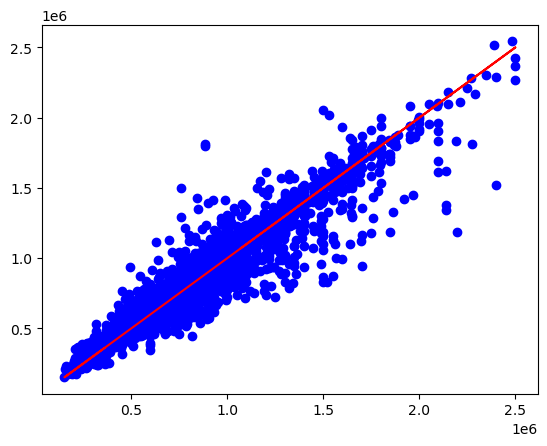

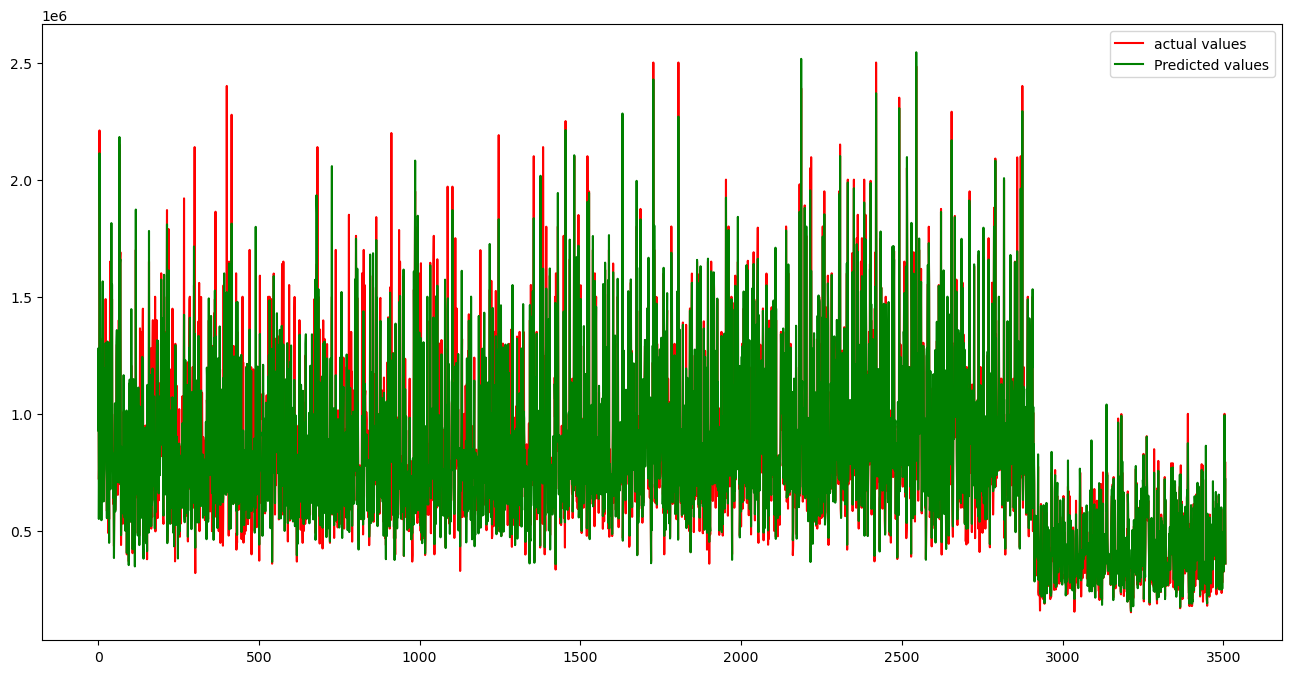

In [5]:
kfold = KFold(n_splits=10)
fold_no = 1
stats = []
for train, test in kfold.split(features, labels):
    model = create_model(32)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(features[train], 
                        labels[train], 
                        epochs = 200)
    #model.save('model' + str(fold_no) + '.keras')
    scores = model.evaluate(features[test], labels[test])
    preds_house = model.predict(features[test])
    print('R score is :', r2_score(labels[test], preds_house))
    print('Test metrics: ', scores)
    stats.append(scores)
    stats[fold_no-1].append(r2_score(labels[test], preds_house))
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1

In [6]:
stats_df = pd.DataFrame(stats)
stats_df = stats_df.rename(columns={0:'Mean squared error', 1:'Mean absolute percentage error', 2:'Mean absolute error', 3:'LogCosH', 4:'R2'})
stats_df.describe()

Mean squared error  Mean absolute percentage error  \
count               10.00                           10.00   
mean      179378587750.40                           35.22   
std       291979103202.73                           44.69   
min         2392683776.00                            4.89   
25%         5345892480.00                            7.69   
50%         8215488512.00                            8.40   
75%       284442184704.00                           77.21   
max       752697278464.00                           99.97   

       Mean absolute error   LogCosH    R2  
count                10.00     10.00 10.00  
mean             238256.14 238255.45 -0.64  
std              310509.25 310509.21  2.52  
min               30577.71  30577.03 -5.04  
25%               44999.30  44998.63 -2.64  
50%               55168.77  55168.08  0.89  
75%              426195.54 426194.95  0.92  
max              792547.81 792547.00  0.96

# Usunięcie kolumn o najmniejszej korelcji z ceną

In [8]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL.corr()["price"]

squareMeters             0.62
rooms                    0.44
floor                    0.00
floorCount               0.05
buildYear                0.21
latitude                 0.05
longitude                0.16
centreDistance           0.22
poiCount                 0.09
hasParkingSpace          0.17
hasBalcony               0.09
hasElevator              0.29
hasSecurity              0.16
hasStorageRoom          -0.19
price                    1.00
offerMonth               0.04
ownership_condominium    0.13
ownership_cooperative   -0.13
city_bialystok          -0.10
city_bydgoszcz          -0.20
city_czestochowa        -0.15
city_gdansk              0.04
city_gdynia               NaN
city_katowice           -0.12
city_krakow              0.09
city_lodz               -0.29
city_lublin             -0.12
city_poznan             -0.07
city_radom              -0.16
city_rzeszow            -0.06
city_szczecin             NaN
city_warszawa            0.44
city_wroclaw            -0.01
Name: pric

In [9]:
data_ALL.drop(columns=['floor', 'floorCount', 'latitude', 'longitude', 'poiCount', 'hasBalcony', 'offerMonth'], inplace=True)

In [10]:
features = data_ALL
labels = features.pop('price')

features = features.to_numpy()
labels = labels.to_numpy()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 50788712448.0000 - mean_absolute_percentage_error: 21.0488 - mean_absolute_error: 140008.7188 - logcosh: 140007.9688
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 21368027136.0000 - mean_absolute_percentage_error: 14.7917 - mean_absolute_error: 100798.5391 - logcosh: 100797.8438
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 20922482688.0000 - mean_absolute_percentage_error: 14.5580 - mean_absolute_error: 99553.9219 - logcosh: 99553.1719
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 20028495872.0000 - mean_absolute_percentage_error: 14.1649 - mean_absolute_error: 97078.7656 - logcosh: 97078.1016
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 19825414144.0000 - mean_absolute_percentage_error: 14.0383 - mea

987/987 [==============================] - 3s 3ms/step - loss: 15163930624.0000 - mean_absolute_percentage_error: 12.1996 - mean_absolute_error: 83452.8203 - logcosh: 83452.1094
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 15354736640.0000 - mean_absolute_percentage_error: 12.2743 - mean_absolute_error: 83923.5391 - logcosh: 83922.8438
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 15003985920.0000 - mean_absolute_percentage_error: 12.1190 - mean_absolute_error: 82769.8594 - logcosh: 82769.1172
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 14844841984.0000 - mean_absolute_percentage_error: 12.1443 - mean_absolute_error: 82742.1719 - logcosh: 82741.4766
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 14830893056.0000 - mean_absolute_percentage_error: 12.0889 - mean_absolute_error: 82626.3125 - logcosh: 82625.5625
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11359405056.0000 - mean_absolute_percentage_error: 10.6844 - mean_absolute_error: 72289.9062 - logcosh: 72289.2031
Epoch 86/100
987/987 [==============================] - 3s 3ms/step - loss: 11558413312.0000 - mean_absolute_percentage_error: 10.7445 - mean_absolute_error: 72809.6484 - logcosh: 72808.9453
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 11437528064.0000 - mean_absolute_percentage_error: 10.7574 - mean_absolute_error: 72630.8906 - logcosh: 72630.2656
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 11301216256.0000 - mean_absolute_percentage_error: 10.6565 - mean_absolute_error: 72202.8828 - logcosh: 72202.2031
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 11148973056.0000 - mean_absolute_percentage_error: 10.6007 - mean_absolute_error: 71581.8516 - logcosh: 71581.1641
Epoch 90/100
987/987 [==============================] - 3s

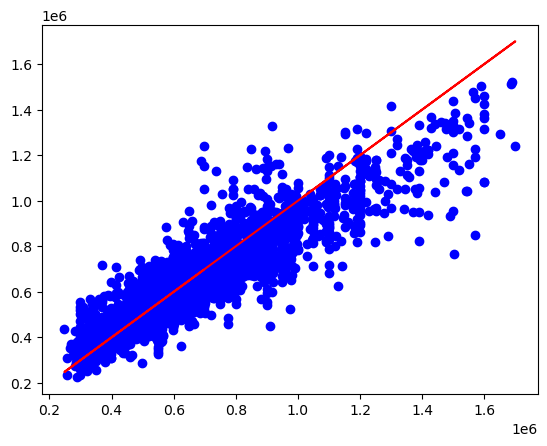

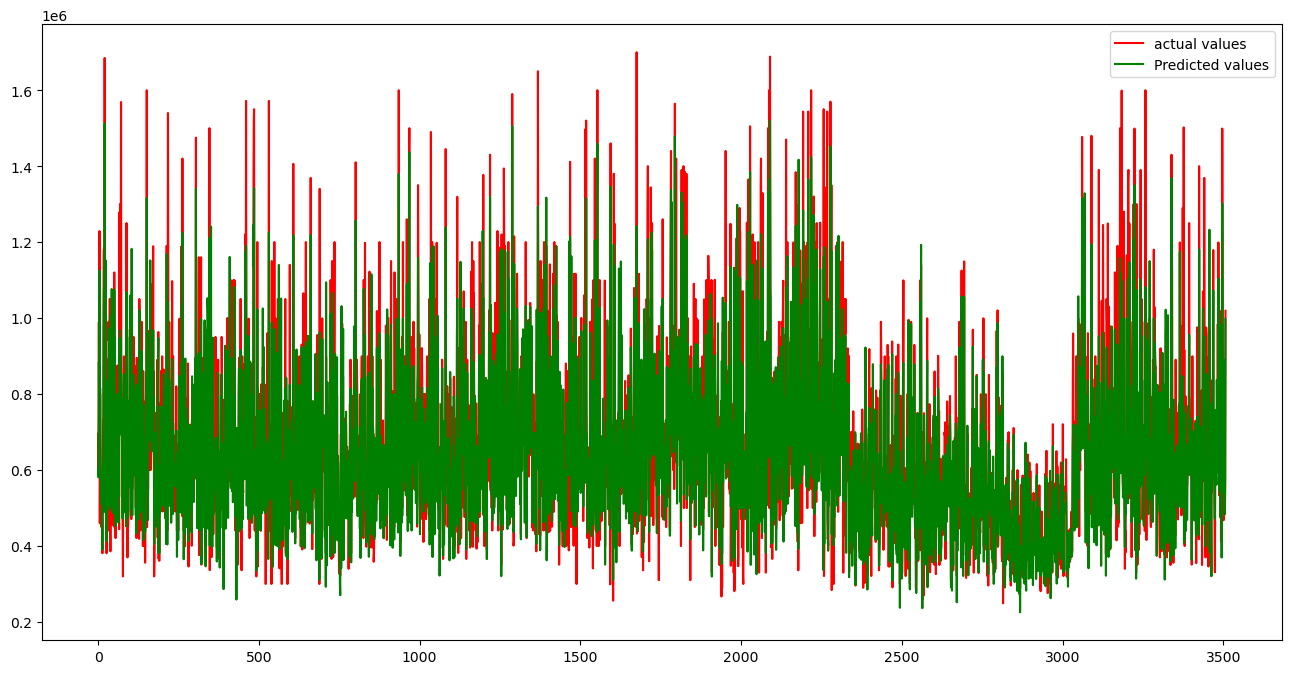

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 60031131648.0000 - mean_absolute_percentage_error: 22.4742 - mean_absolute_error: 151582.2344 - logcosh: 151581.5938
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 22645135360.0000 - mean_absolute_percentage_error: 15.1674 - mean_absolute_error: 104301.3125 - logcosh: 104300.5938
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 21766924288.0000 - mean_absolute_percentage_error: 14.7178 - mean_absolute_error: 101797.3828 - logcosh: 101796.7031
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 20795764736.0000 - mean_absolute_percentage_error: 14.3252 - mean_absolute_error: 99333.2734 - logcosh: 99332.6250
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 20463439872.0000 - mean_absolute_percentage_error: 14.1542 - m

987/987 [==============================] - 3s 3ms/step - loss: 15628437504.0000 - mean_absolute_percentage_error: 12.2433 - mean_absolute_error: 85182.6250 - logcosh: 85181.9297
Epoch 44/100
987/987 [==============================] - 2s 3ms/step - loss: 15674587136.0000 - mean_absolute_percentage_error: 12.2602 - mean_absolute_error: 85209.2578 - logcosh: 85208.5938
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 15586633728.0000 - mean_absolute_percentage_error: 12.2036 - mean_absolute_error: 84927.7969 - logcosh: 84927.1016
Epoch 46/100
987/987 [==============================] - 2s 3ms/step - loss: 15395189760.0000 - mean_absolute_percentage_error: 12.2127 - mean_absolute_error: 84682.2109 - logcosh: 84681.4609
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 15279539200.0000 - mean_absolute_percentage_error: 12.1437 - mean_absolute_error: 84332.9688 - logcosh: 84332.2500
Epoch 48/100
987/987 [==============================] - 2s

987/987 [==============================] - 3s 3ms/step - loss: 11432069120.0000 - mean_absolute_percentage_error: 10.5185 - mean_absolute_error: 72434.4688 - logcosh: 72433.6953
Epoch 86/100
987/987 [==============================] - 3s 3ms/step - loss: 11532193792.0000 - mean_absolute_percentage_error: 10.6123 - mean_absolute_error: 73032.8281 - logcosh: 73032.1719
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 11438304256.0000 - mean_absolute_percentage_error: 10.5854 - mean_absolute_error: 72708.0469 - logcosh: 72707.3594
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 11389101056.0000 - mean_absolute_percentage_error: 10.5879 - mean_absolute_error: 72819.1719 - logcosh: 72818.4141
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 11121552384.0000 - mean_absolute_percentage_error: 10.4007 - mean_absolute_error: 71421.4453 - logcosh: 71420.6875
Epoch 90/100
987/987 [==============================] - 3s

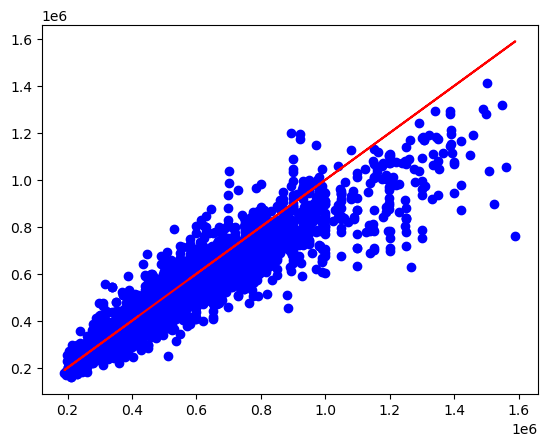

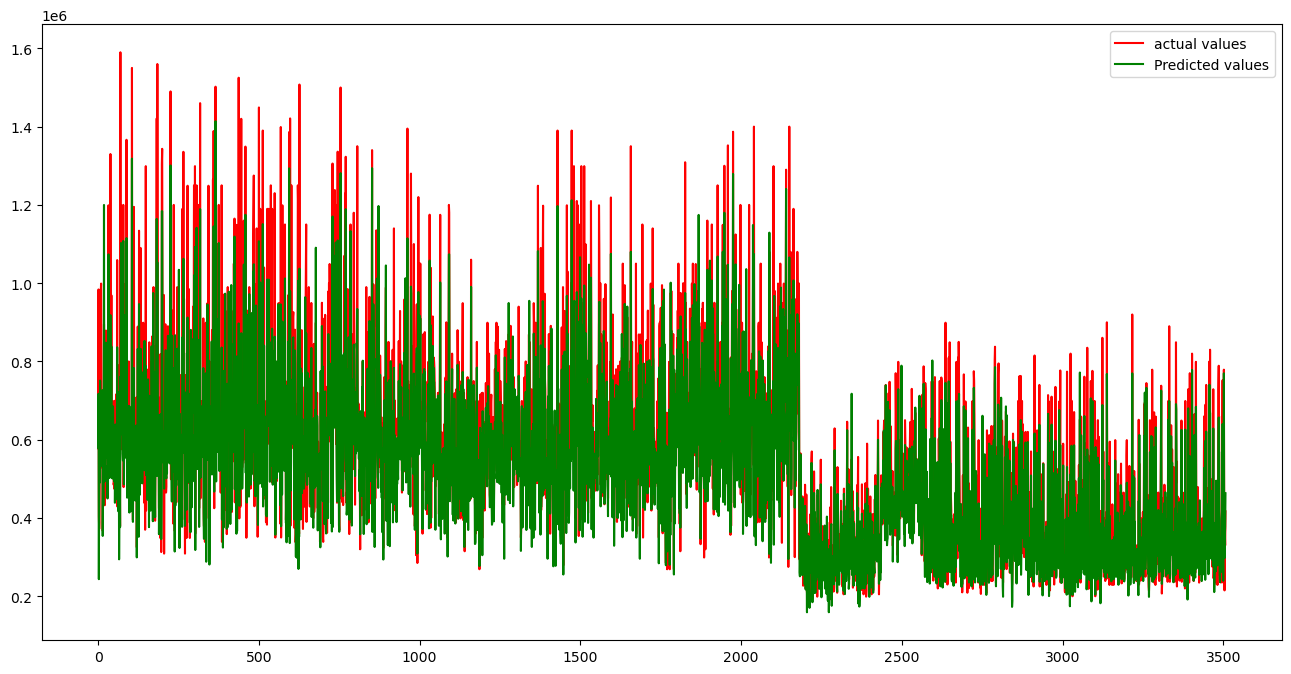

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 49109897216.0000 - mean_absolute_percentage_error: 20.8868 - mean_absolute_error: 137970.5312 - logcosh: 137969.8750
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 20692383744.0000 - mean_absolute_percentage_error: 14.7525 - mean_absolute_error: 99651.8359 - logcosh: 99651.1719
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 20018933760.0000 - mean_absolute_percentage_error: 14.4248 - mean_absolute_error: 97662.9688 - logcosh: 97662.2656
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 19495557120.0000 - mean_absolute_percentage_error: 14.1604 - mean_absolute_error: 96122.5078 - logcosh: 96121.8594
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 19250868224.0000 - mean_absolute_percentage_error: 14.0691 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 14779525120.0000 - mean_absolute_percentage_error: 12.1353 - mean_absolute_error: 82521.1406 - logcosh: 82520.4297
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 14707302400.0000 - mean_absolute_percentage_error: 12.1122 - mean_absolute_error: 82381.8906 - logcosh: 82381.2031
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 14664706048.0000 - mean_absolute_percentage_error: 12.1104 - mean_absolute_error: 82303.7031 - logcosh: 82302.9531
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 14365559808.0000 - mean_absolute_percentage_error: 12.0068 - mean_absolute_error: 81427.1406 - logcosh: 81426.4297
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 14415808512.0000 - mean_absolute_percentage_error: 12.0162 - mean_absolute_error: 81671.9141 - logcosh: 81671.1484
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 10586253312.0000 - mean_absolute_percentage_error: 10.2693 - mean_absolute_error: 69199.7891 - logcosh: 69199.1641
Epoch 86/100
987/987 [==============================] - 3s 3ms/step - loss: 10648011776.0000 - mean_absolute_percentage_error: 10.3608 - mean_absolute_error: 69687.4688 - logcosh: 69686.8203
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 10576694272.0000 - mean_absolute_percentage_error: 10.3144 - mean_absolute_error: 69394.2188 - logcosh: 69393.5469
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 10519696384.0000 - mean_absolute_percentage_error: 10.3339 - mean_absolute_error: 69488.9297 - logcosh: 69488.2422
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 10361018368.0000 - mean_absolute_percentage_error: 10.2512 - mean_absolute_error: 68817.9688 - logcosh: 68817.2891
Epoch 90/100
987/987 [==============================] - 3s

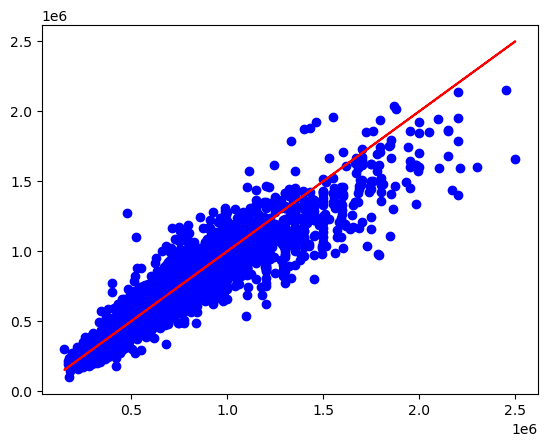

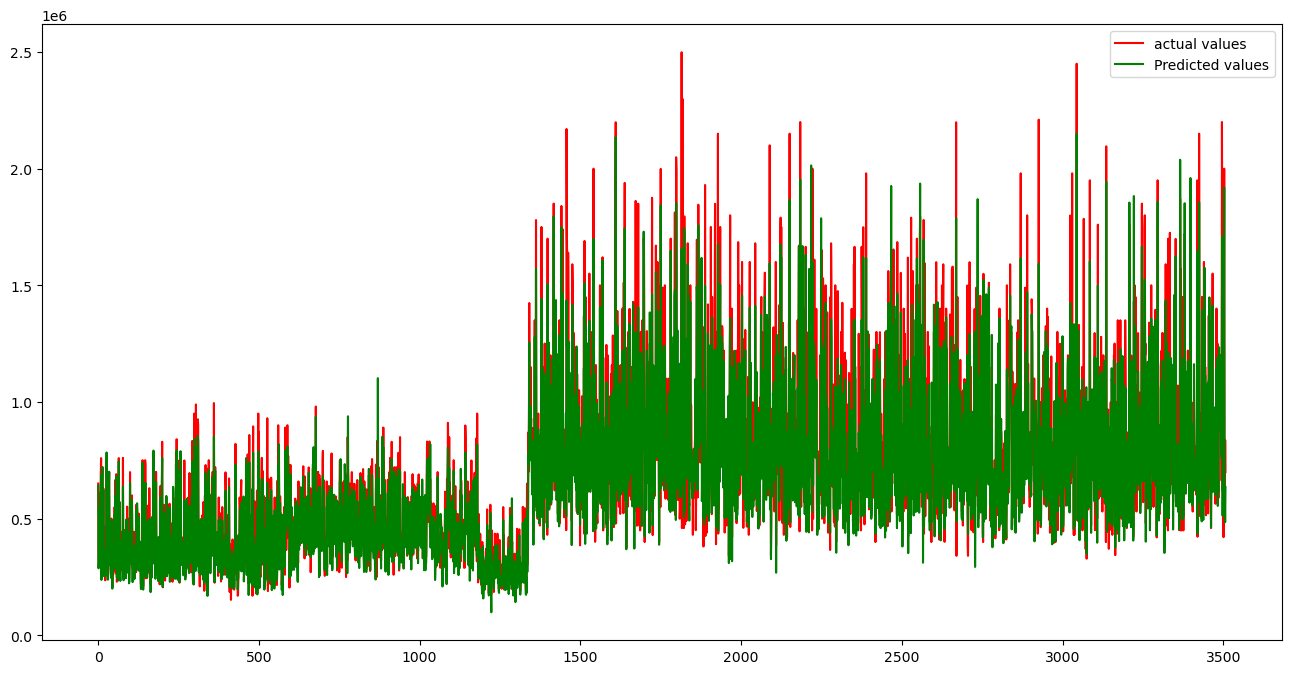

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 49403072512.0000 - mean_absolute_percentage_error: 20.9998 - mean_absolute_error: 138367.8594 - logcosh: 138367.1250
Epoch 2/100
987/987 [==============================] - 2s 3ms/step - loss: 20834039808.0000 - mean_absolute_percentage_error: 14.7764 - mean_absolute_error: 99504.4531 - logcosh: 99503.8047
Epoch 3/100
987/987 [==============================] - 2s 2ms/step - loss: 20044711936.0000 - mean_absolute_percentage_error: 14.4386 - mean_absolute_error: 97432.7344 - logcosh: 97432.0078
Epoch 4/100
987/987 [==============================] - 2s 2ms/step - loss: 19570132992.0000 - mean_absolute_percentage_error: 14.2116 - mean_absolute_error: 96152.3125 - logcosh: 96151.6328
Epoch 5/100
987/987 [==============================] - 2s 3ms/step - loss: 19278225408.0000 - mean_absolute_percentage_error: 14.0580 - mean_

987/987 [==============================] - 2s 3ms/step - loss: 14830913536.0000 - mean_absolute_percentage_error: 12.2351 - mean_absolute_error: 82596.6797 - logcosh: 82596.0000
Epoch 44/100
987/987 [==============================] - 2s 3ms/step - loss: 14777472000.0000 - mean_absolute_percentage_error: 12.1980 - mean_absolute_error: 82445.0000 - logcosh: 82444.3750
Epoch 45/100
987/987 [==============================] - 2s 3ms/step - loss: 14867523584.0000 - mean_absolute_percentage_error: 12.2629 - mean_absolute_error: 82841.3203 - logcosh: 82840.5859
Epoch 46/100
987/987 [==============================] - 2s 3ms/step - loss: 14355064832.0000 - mean_absolute_percentage_error: 12.0569 - mean_absolute_error: 81319.6953 - logcosh: 81318.9062
Epoch 47/100
987/987 [==============================] - 2s 2ms/step - loss: 14494834688.0000 - mean_absolute_percentage_error: 12.1461 - mean_absolute_error: 81964.4922 - logcosh: 81963.7969
Epoch 48/100
987/987 [==============================] - 2s

987/987 [==============================] - 2s 2ms/step - loss: 11864244224.0000 - mean_absolute_percentage_error: 10.9123 - mean_absolute_error: 73391.5625 - logcosh: 73390.9141
Epoch 86/100
987/987 [==============================] - 2s 2ms/step - loss: 11810789376.0000 - mean_absolute_percentage_error: 10.8369 - mean_absolute_error: 73063.1250 - logcosh: 73062.4375
Epoch 87/100
987/987 [==============================] - 2s 3ms/step - loss: 11699883008.0000 - mean_absolute_percentage_error: 10.8473 - mean_absolute_error: 72926.2969 - logcosh: 72925.6094
Epoch 88/100
987/987 [==============================] - 2s 3ms/step - loss: 11802231808.0000 - mean_absolute_percentage_error: 10.9156 - mean_absolute_error: 73384.8047 - logcosh: 73384.0547
Epoch 89/100
987/987 [==============================] - 2s 2ms/step - loss: 11740921856.0000 - mean_absolute_percentage_error: 10.9255 - mean_absolute_error: 73422.1406 - logcosh: 73421.4531
Epoch 90/100
987/987 [==============================] - 2s

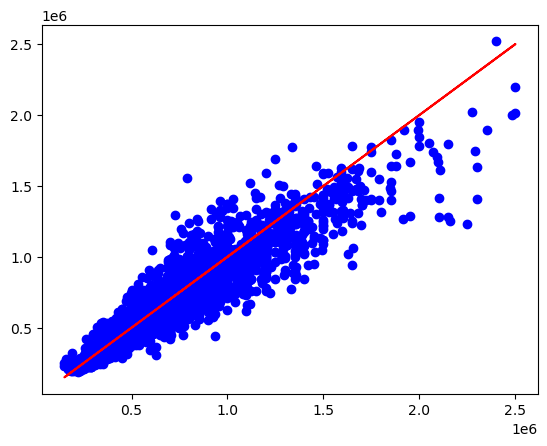

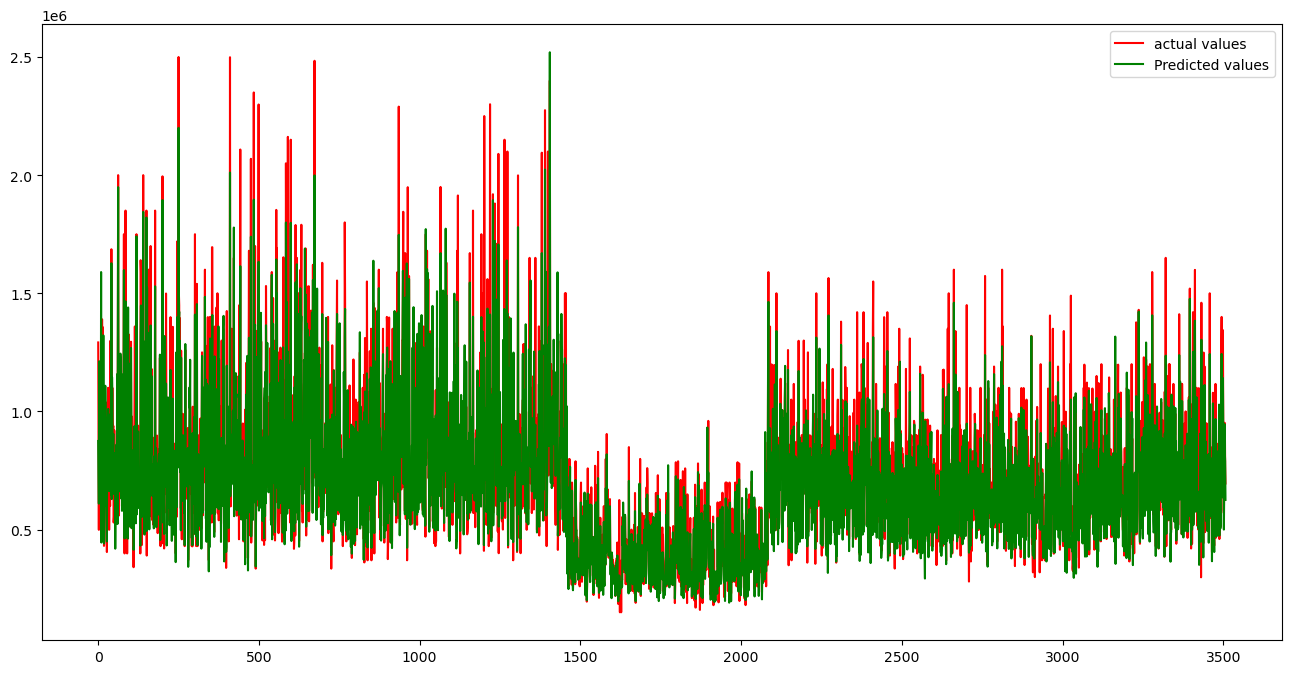

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 56530358272.0000 - mean_absolute_percentage_error: 22.0792 - mean_absolute_error: 146784.1406 - logcosh: 146783.5312
Epoch 2/100
987/987 [==============================] - 2s 3ms/step - loss: 22158997504.0000 - mean_absolute_percentage_error: 15.0407 - mean_absolute_error: 102310.2578 - logcosh: 102309.5000
Epoch 3/100
987/987 [==============================] - 2s 3ms/step - loss: 21493170176.0000 - mean_absolute_percentage_error: 14.7129 - mean_absolute_error: 100498.4922 - logcosh: 100497.8281
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 20670539776.0000 - mean_absolute_percentage_error: 14.3508 - mean_absolute_error: 98334.5781 - logcosh: 98334.0000
Epoch 5/100
987/987 [==============================] - 2s 3ms/step - loss: 20269858816.0000 - mean_absolute_percentage_error: 14.1681 - m

987/987 [==============================] - 3s 3ms/step - loss: 15501232128.0000 - mean_absolute_percentage_error: 12.2832 - mean_absolute_error: 84223.2266 - logcosh: 84222.5000
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 15516551168.0000 - mean_absolute_percentage_error: 12.2906 - mean_absolute_error: 84343.7812 - logcosh: 84343.0547
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 15390848000.0000 - mean_absolute_percentage_error: 12.2186 - mean_absolute_error: 83923.1797 - logcosh: 83922.4219
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 15068333056.0000 - mean_absolute_percentage_error: 12.1220 - mean_absolute_error: 83140.1484 - logcosh: 83139.4766
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 15012160512.0000 - mean_absolute_percentage_error: 12.1110 - mean_absolute_error: 83069.2578 - logcosh: 83068.4766
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11734508544.0000 - mean_absolute_percentage_error: 10.7524 - mean_absolute_error: 73387.5703 - logcosh: 73386.8672
Epoch 86/100
987/987 [==============================] - 3s 3ms/step - loss: 11775052800.0000 - mean_absolute_percentage_error: 10.7275 - mean_absolute_error: 73228.1250 - logcosh: 73227.3906
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 11606044672.0000 - mean_absolute_percentage_error: 10.7094 - mean_absolute_error: 72902.9297 - logcosh: 72902.2188
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 11564835840.0000 - mean_absolute_percentage_error: 10.6941 - mean_absolute_error: 72865.3281 - logcosh: 72864.6719
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 11528546304.0000 - mean_absolute_percentage_error: 10.6869 - mean_absolute_error: 72805.6484 - logcosh: 72804.9688
Epoch 90/100
987/987 [==============================] - 3s

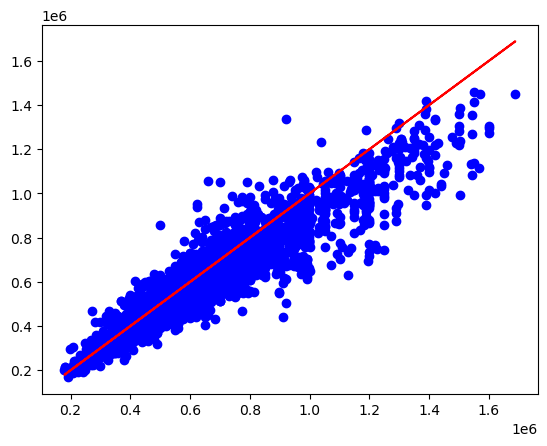

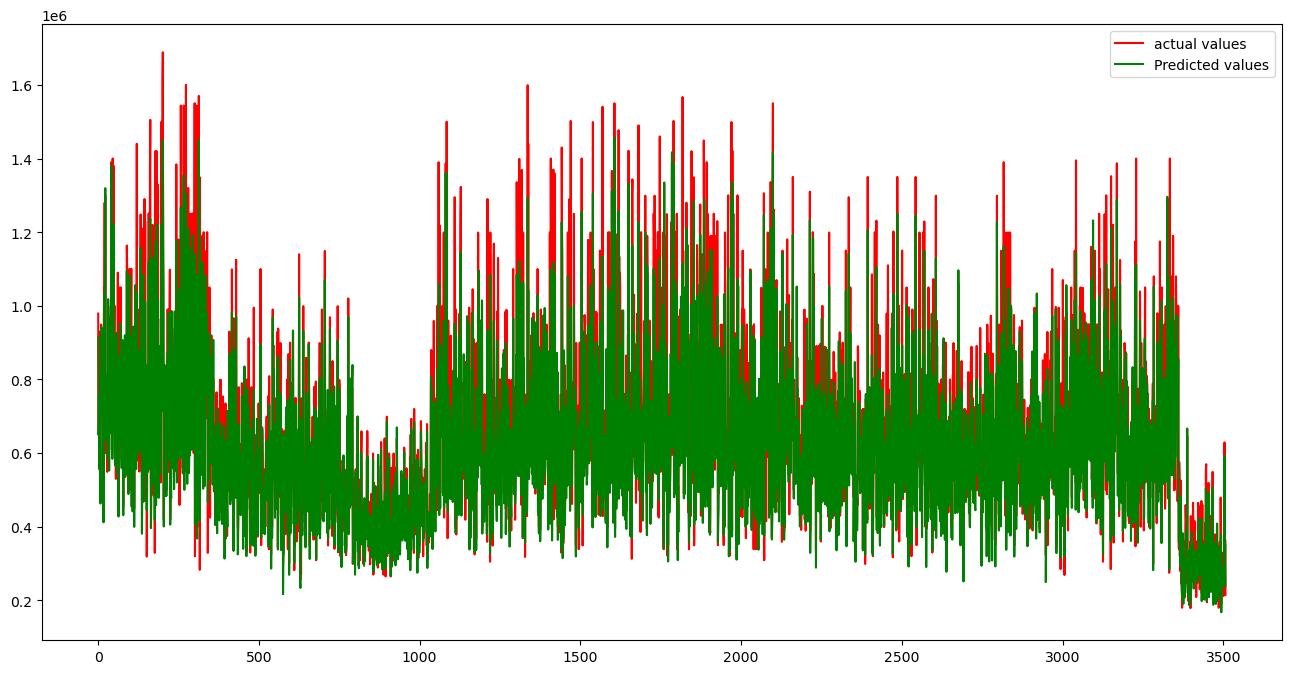

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/100
987/987 [==============================] - 4s 3ms/step - loss: 50092531712.0000 - mean_absolute_percentage_error: 20.8263 - mean_absolute_error: 140194.6562 - logcosh: 140193.9688
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 21770690560.0000 - mean_absolute_percentage_error: 14.8700 - mean_absolute_error: 102484.3750 - logcosh: 102483.6875
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 21261852672.0000 - mean_absolute_percentage_error: 14.6268 - mean_absolute_error: 101021.1484 - logcosh: 101020.4609
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 20383744000.0000 - mean_absolute_percentage_error: 14.2335 - mean_absolute_error: 98603.2188 - logcosh: 98602.6172
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 20058761216.0000 - mean_absolute_percentage_error: 14.1175 - m

987/987 [==============================] - 3s 3ms/step - loss: 15489792000.0000 - mean_absolute_percentage_error: 12.3522 - mean_absolute_error: 85310.6172 - logcosh: 85309.8984
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 15482893312.0000 - mean_absolute_percentage_error: 12.3561 - mean_absolute_error: 85327.2188 - logcosh: 85326.4766
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 15269004288.0000 - mean_absolute_percentage_error: 12.2464 - mean_absolute_error: 84671.0000 - logcosh: 84670.3516
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 15066165248.0000 - mean_absolute_percentage_error: 12.1578 - mean_absolute_error: 84002.3281 - logcosh: 84001.6406
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 14946034688.0000 - mean_absolute_percentage_error: 12.1334 - mean_absolute_error: 83804.9844 - logcosh: 83804.2422
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11278612480.0000 - mean_absolute_percentage_error: 10.5500 - mean_absolute_error: 72156.0156 - logcosh: 72155.3359
Epoch 86/100
987/987 [==============================] - 3s 3ms/step - loss: 11549984768.0000 - mean_absolute_percentage_error: 10.6575 - mean_absolute_error: 73026.5000 - logcosh: 73025.7656
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 11243515904.0000 - mean_absolute_percentage_error: 10.5883 - mean_absolute_error: 72318.8906 - logcosh: 72318.1484
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 11264430080.0000 - mean_absolute_percentage_error: 10.6196 - mean_absolute_error: 72591.8438 - logcosh: 72591.1875
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 11203693568.0000 - mean_absolute_percentage_error: 10.5764 - mean_absolute_error: 72238.9297 - logcosh: 72238.3125
Epoch 90/100
987/987 [==============================] - 3s

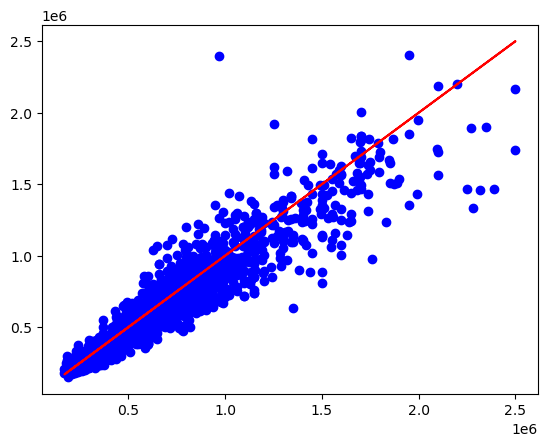

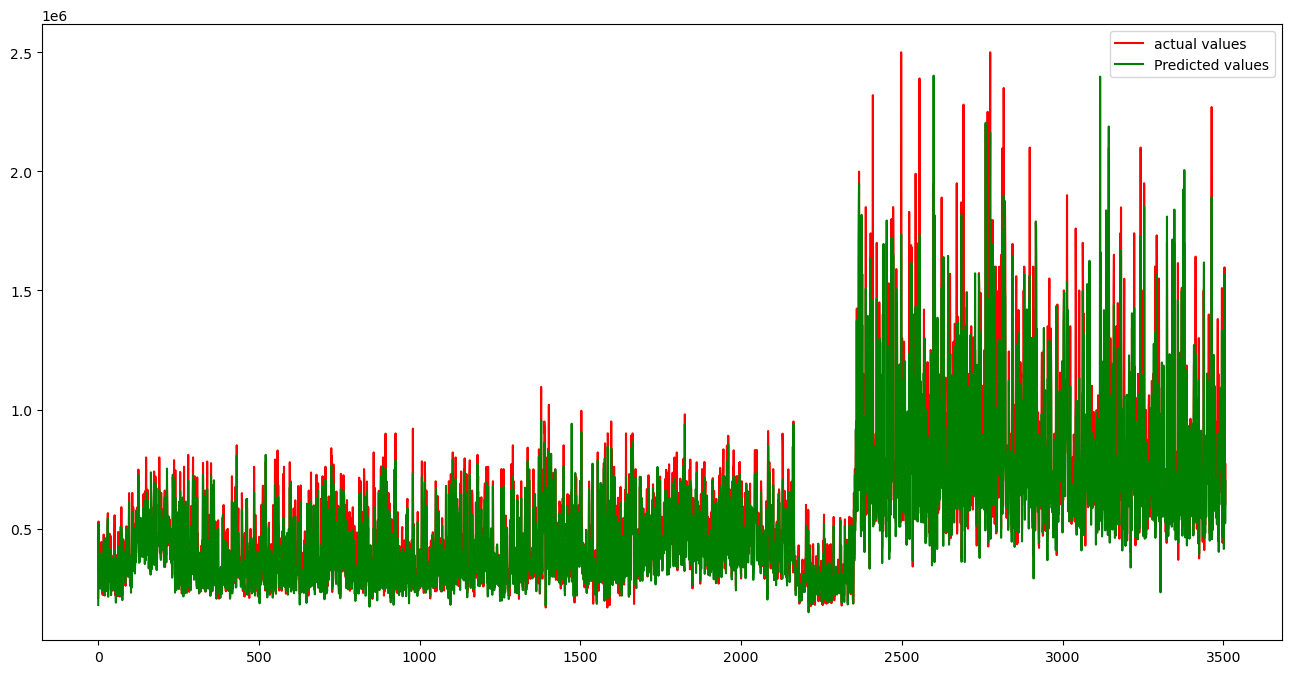

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 47567462400.0000 - mean_absolute_percentage_error: 20.7776 - mean_absolute_error: 135591.8750 - logcosh: 135591.2031
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 20355377152.0000 - mean_absolute_percentage_error: 14.7800 - mean_absolute_error: 98584.1641 - logcosh: 98583.4609
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 19603496960.0000 - mean_absolute_percentage_error: 14.4526 - mean_absolute_error: 96409.6719 - logcosh: 96409.0000
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 18861748224.0000 - mean_absolute_percentage_error: 14.0913 - mean_absolute_error: 94274.9844 - logcosh: 94274.3125
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 18592112640.0000 - mean_absolute_percentage_error: 14.0050 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 14212720640.0000 - mean_absolute_percentage_error: 12.0865 - mean_absolute_error: 80838.4922 - logcosh: 80837.8203
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 14352738304.0000 - mean_absolute_percentage_error: 12.1407 - mean_absolute_error: 81239.8594 - logcosh: 81239.0859
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 13978168320.0000 - mean_absolute_percentage_error: 11.9416 - mean_absolute_error: 79993.4062 - logcosh: 79992.6953
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 13813341184.0000 - mean_absolute_percentage_error: 11.8759 - mean_absolute_error: 79549.7969 - logcosh: 79549.0859
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 13803781120.0000 - mean_absolute_percentage_error: 11.8874 - mean_absolute_error: 79480.1797 - logcosh: 79479.5156
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 10421972992.0000 - mean_absolute_percentage_error: 10.3400 - mean_absolute_error: 68852.0234 - logcosh: 68851.3281
Epoch 86/100
987/987 [==============================] - 3s 3ms/step - loss: 10353559552.0000 - mean_absolute_percentage_error: 10.2717 - mean_absolute_error: 68474.1875 - logcosh: 68473.5234
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 10251053056.0000 - mean_absolute_percentage_error: 10.3152 - mean_absolute_error: 68419.6875 - logcosh: 68419.0000
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 10200623104.0000 - mean_absolute_percentage_error: 10.2974 - mean_absolute_error: 68341.5781 - logcosh: 68340.9141
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 10014922752.0000 - mean_absolute_percentage_error: 10.1366 - mean_absolute_error: 67264.8906 - logcosh: 67264.1875
Epoch 90/100
987/987 [==============================] - 3s

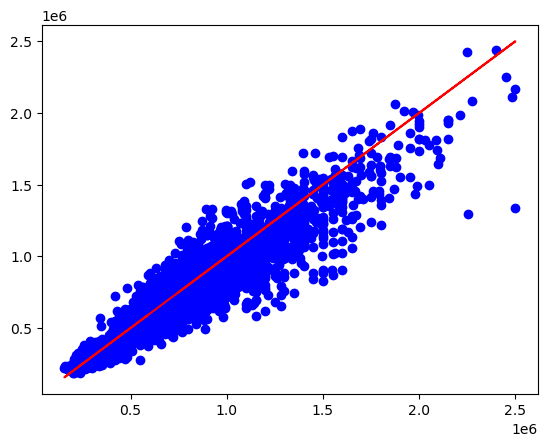

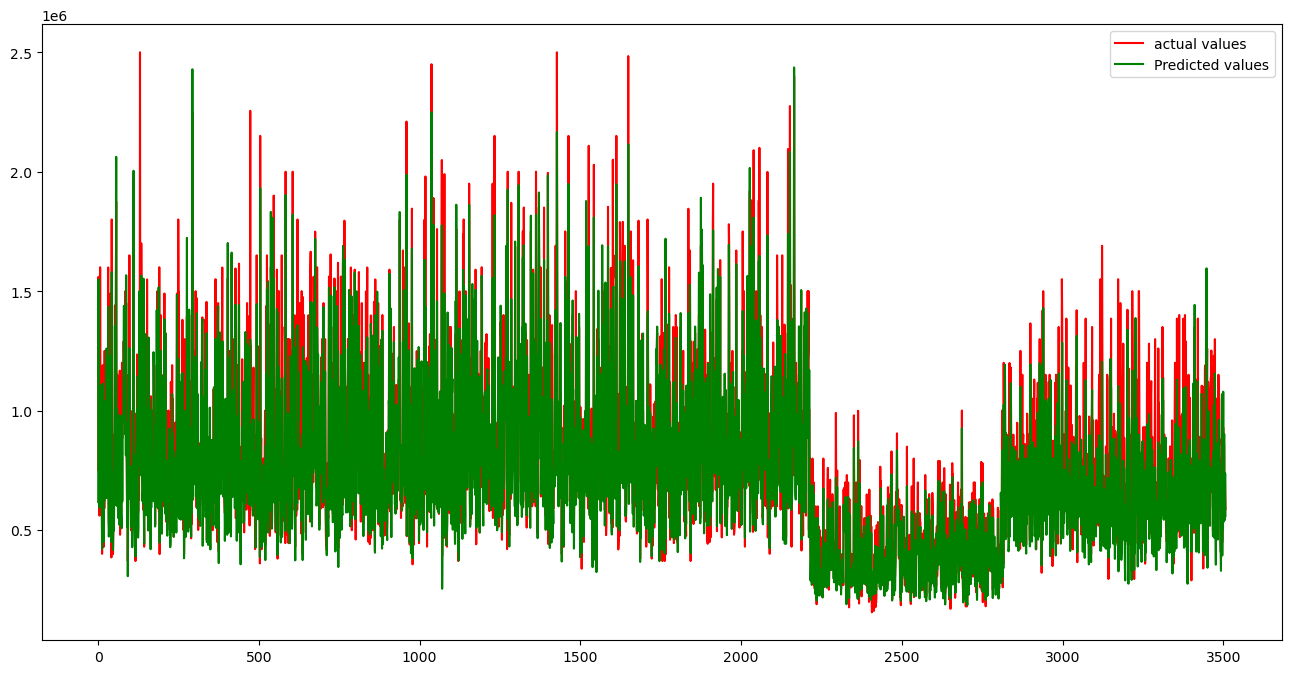

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 51747643392.0000 - mean_absolute_percentage_error: 21.2727 - mean_absolute_error: 140771.5938 - logcosh: 140770.8125
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 21702809600.0000 - mean_absolute_percentage_error: 14.9242 - mean_absolute_error: 101219.4531 - logcosh: 101218.7109
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 21143093248.0000 - mean_absolute_percentage_error: 14.6036 - mean_absolute_error: 99388.1562 - logcosh: 99387.4922
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 19982936064.0000 - mean_absolute_percentage_error: 14.1012 - mean_absolute_error: 96125.2109 - logcosh: 96124.5234
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 19854520320.0000 - mean_absolute_percentage_error: 14.1026 - mea

987/987 [==============================] - 3s 3ms/step - loss: 15255847936.0000 - mean_absolute_percentage_error: 12.2730 - mean_absolute_error: 83513.0938 - logcosh: 83512.4766
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 15201226752.0000 - mean_absolute_percentage_error: 12.2156 - mean_absolute_error: 83223.8438 - logcosh: 83223.1328
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 14928153600.0000 - mean_absolute_percentage_error: 12.1089 - mean_absolute_error: 82365.7266 - logcosh: 82365.0469
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 14884705280.0000 - mean_absolute_percentage_error: 12.1069 - mean_absolute_error: 82483.2188 - logcosh: 82482.5078
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 14837552128.0000 - mean_absolute_percentage_error: 12.1122 - mean_absolute_error: 82363.8750 - logcosh: 82363.1953
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11481908224.0000 - mean_absolute_percentage_error: 10.6732 - mean_absolute_error: 72061.0000 - logcosh: 72060.2812
Epoch 86/100
987/987 [==============================] - 3s 3ms/step - loss: 11600191488.0000 - mean_absolute_percentage_error: 10.6913 - mean_absolute_error: 72437.2969 - logcosh: 72436.6250
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 11441481728.0000 - mean_absolute_percentage_error: 10.6630 - mean_absolute_error: 71992.3594 - logcosh: 71991.7500
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 11357124608.0000 - mean_absolute_percentage_error: 10.6479 - mean_absolute_error: 71889.8125 - logcosh: 71889.1328
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 11276174336.0000 - mean_absolute_percentage_error: 10.5433 - mean_absolute_error: 71248.9609 - logcosh: 71248.2422
Epoch 90/100
987/987 [==============================] - 3s

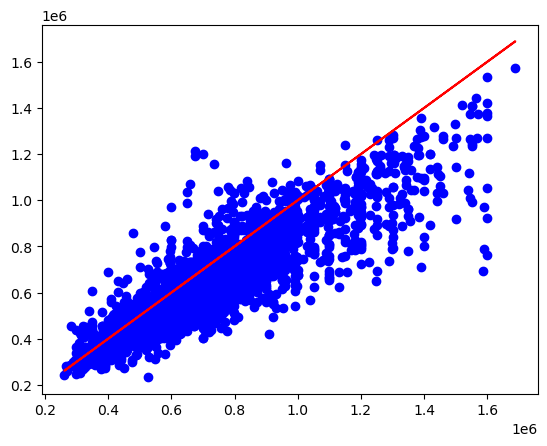

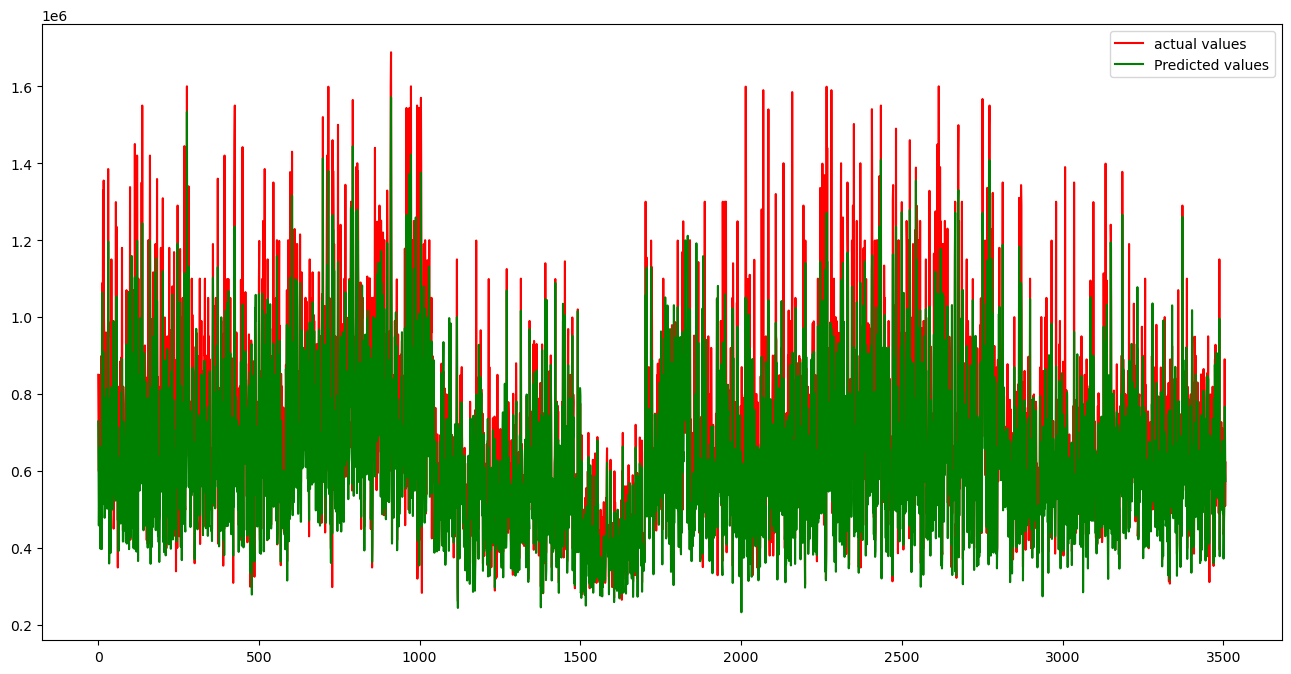

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/100
987/987 [==============================] - 3s 3ms/step - loss: 65130631168.0000 - mean_absolute_percentage_error: 23.3646 - mean_absolute_error: 158380.8281 - logcosh: 158380.2500
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 23036190720.0000 - mean_absolute_percentage_error: 15.2294 - mean_absolute_error: 105339.1328 - logcosh: 105338.4297
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 21940318208.0000 - mean_absolute_percentage_error: 14.6960 - mean_absolute_error: 102206.6875 - logcosh: 102205.9844
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 20916252672.0000 - mean_absolute_percentage_error: 14.2558 - mean_absolute_error: 99394.8594 - logcosh: 99394.1953
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 20636745728.0000 - mean_absolute_percentage_error: 14.1446 - m

987/987 [==============================] - 3s 3ms/step - loss: 16174607360.0000 - mean_absolute_percentage_error: 12.4352 - mean_absolute_error: 86897.6875 - logcosh: 86897.0078
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 15988425728.0000 - mean_absolute_percentage_error: 12.3373 - mean_absolute_error: 86351.1328 - logcosh: 86350.4609
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 15836572672.0000 - mean_absolute_percentage_error: 12.2561 - mean_absolute_error: 85713.3281 - logcosh: 85712.6406
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 15720617984.0000 - mean_absolute_percentage_error: 12.2550 - mean_absolute_error: 85659.8750 - logcosh: 85659.1172
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 15640717312.0000 - mean_absolute_percentage_error: 12.2003 - mean_absolute_error: 85223.5781 - logcosh: 85222.8438
Epoch 48/100
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11685921792.0000 - mean_absolute_percentage_error: 10.6730 - mean_absolute_error: 73720.5156 - logcosh: 73719.8203
Epoch 86/100
987/987 [==============================] - 3s 3ms/step - loss: 11968458752.0000 - mean_absolute_percentage_error: 10.7902 - mean_absolute_error: 74647.9297 - logcosh: 74647.2422
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 11684984832.0000 - mean_absolute_percentage_error: 10.6385 - mean_absolute_error: 73642.8750 - logcosh: 73642.1797
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 11581023232.0000 - mean_absolute_percentage_error: 10.6679 - mean_absolute_error: 73621.0469 - logcosh: 73620.4297
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 11601158144.0000 - mean_absolute_percentage_error: 10.6201 - mean_absolute_error: 73479.6562 - logcosh: 73478.9609
Epoch 90/100
987/987 [==============================] - 3s

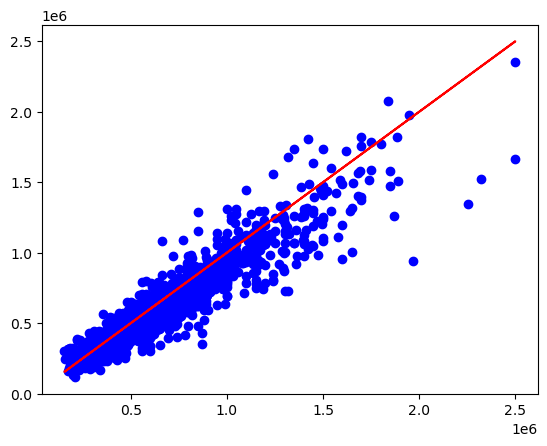

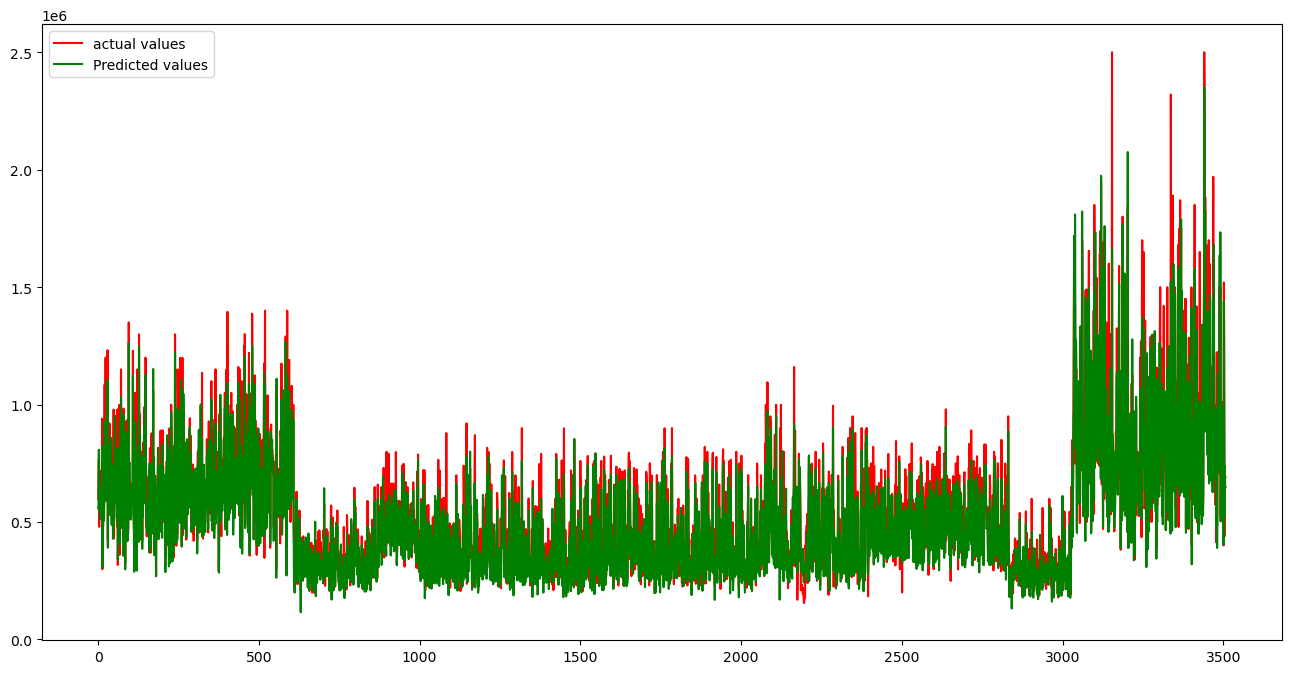

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/100
987/987 [==============================] - 4s 3ms/step - loss: 48701820928.0000 - mean_absolute_percentage_error: 20.9246 - mean_absolute_error: 136346.0781 - logcosh: 136345.5312
Epoch 2/100
987/987 [==============================] - 3s 3ms/step - loss: 19816138752.0000 - mean_absolute_percentage_error: 14.6269 - mean_absolute_error: 97086.7500 - logcosh: 97086.0625
Epoch 3/100
987/987 [==============================] - 3s 3ms/step - loss: 19332866048.0000 - mean_absolute_percentage_error: 14.4312 - mean_absolute_error: 95838.8984 - logcosh: 95838.1641
Epoch 4/100
987/987 [==============================] - 3s 3ms/step - loss: 18430404608.0000 - mean_absolute_percentage_error: 14.0232 - mean_absolute_error: 93419.3828 - logcosh: 93418.8125
Epoch 5/100
987/987 [==============================] - 3s 3ms/step - loss: 18298761216.0000 - mean_absolute_percentage_error: 13.9600 - mean

987/987 [==============================] - 3s 3ms/step - loss: 13784499200.0000 - mean_absolute_percentage_error: 12.0640 - mean_absolute_error: 80166.3438 - logcosh: 80165.7344
Epoch 44/100
987/987 [==============================] - 3s 3ms/step - loss: 13536021504.0000 - mean_absolute_percentage_error: 11.8681 - mean_absolute_error: 79102.6172 - logcosh: 79101.9375
Epoch 45/100
987/987 [==============================] - 3s 3ms/step - loss: 13388545024.0000 - mean_absolute_percentage_error: 11.7896 - mean_absolute_error: 78530.0078 - logcosh: 78529.3281
Epoch 46/100
987/987 [==============================] - 3s 3ms/step - loss: 13201082368.0000 - mean_absolute_percentage_error: 11.7262 - mean_absolute_error: 78161.2188 - logcosh: 78160.4688
Epoch 47/100
987/987 [==============================] - 3s 3ms/step - loss: 13179390976.0000 - mean_absolute_percentage_error: 11.7565 - mean_absolute_error: 78092.9141 - logcosh: 78092.1406
Epoch 48/100
987/987 [==============================] - 3s

Epoch 86/100
987/987 [==============================] - 3s 3ms/step - loss: 9702460416.0000 - mean_absolute_percentage_error: 10.0790 - mean_absolute_error: 66577.9844 - logcosh: 66577.3047
Epoch 87/100
987/987 [==============================] - 3s 3ms/step - loss: 9577161728.0000 - mean_absolute_percentage_error: 10.0357 - mean_absolute_error: 66033.7656 - logcosh: 66033.1406
Epoch 88/100
987/987 [==============================] - 3s 3ms/step - loss: 9465839616.0000 - mean_absolute_percentage_error: 10.0051 - mean_absolute_error: 65930.6094 - logcosh: 65929.9453
Epoch 89/100
987/987 [==============================] - 3s 3ms/step - loss: 9397895168.0000 - mean_absolute_percentage_error: 9.9191 - mean_absolute_error: 65468.5312 - logcosh: 65467.7695
Epoch 90/100
987/987 [==============================] - 3s 3ms/step - loss: 9351129088.0000 - mean_absolute_percentage_error: 9.8811 - mean_absolute_error: 65210.1094 - logcosh: 65209.4688
Epoch 91/100
987/987 [==============================

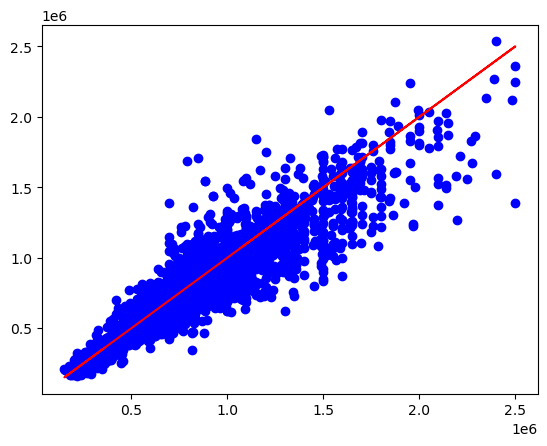

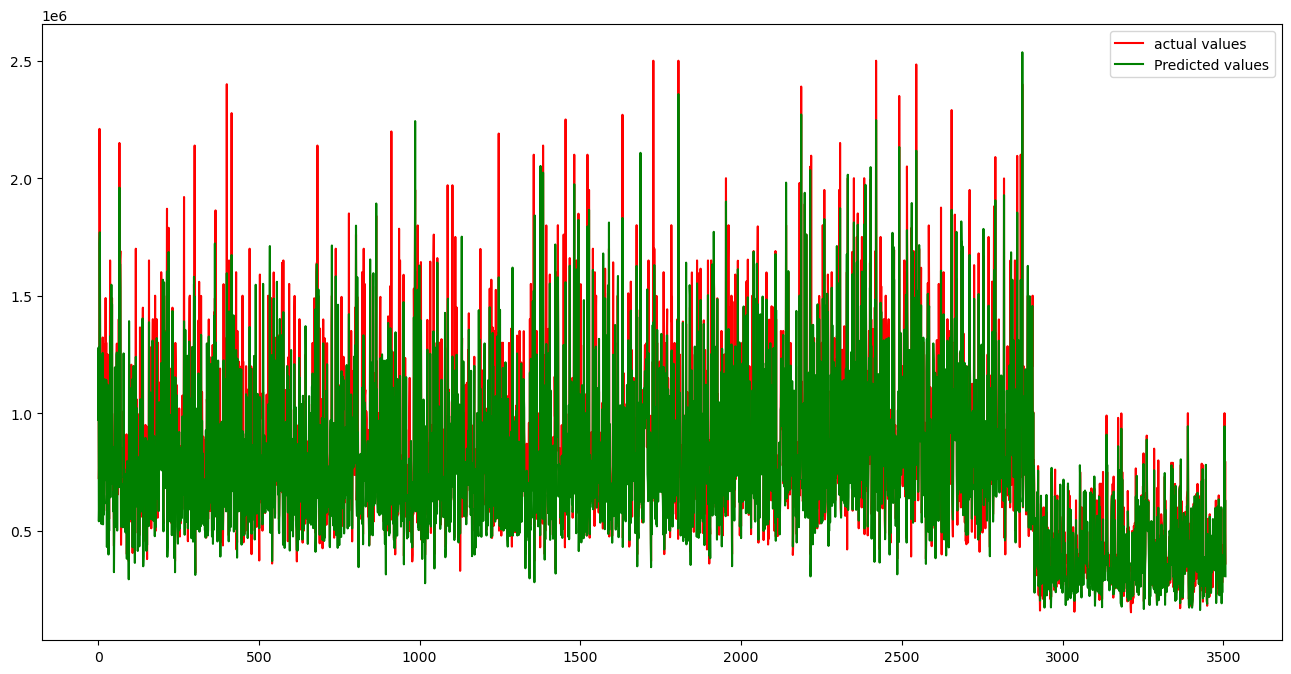

In [11]:
kfold = KFold(n_splits=10)
fold_no = 1
stats = []
for train, test in kfold.split(features, labels):
    model = create_model(25)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(features[train], 
                        labels[train], 
                        epochs = 100)
    #model.save('model' + str(fold_no) + '.keras')
    scores = model.evaluate(features[test], labels[test])
    preds_house = model.predict(features[test])
    print('R score is :', r2_score(labels[test], preds_house))
    print('Test metrics: ', scores)
    stats.append(scores)
    stats[fold_no-1].append(r2_score(labels[test], preds_house))
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1

In [12]:
stats_df = pd.DataFrame(stats)
stats_df = stats_df.rename(columns={0:'Mean squared error', 1:'Mean absolute percentage error', 2:'Mean absolute error', 3:'LogCosH', 4:'R2'})
stats_df.describe()

Mean squared error  Mean absolute percentage error  \
count               10.00                           10.00   
mean       14828522496.00                           11.67   
std         5053645151.52                            0.81   
min         9414662144.00                           10.34   
25%        10370944512.00                           11.17   
50%        14490363904.00                           11.61   
75%        17715784192.00                           12.35   
max        23861647360.00                           12.91   

       Mean absolute error   LogCosH    R2  
count                10.00     10.00 10.00  
mean              82525.56  82524.87  0.83  
std               15435.05  15435.05  0.05  
min               63159.78  63159.11  0.69  
25%               69865.06  69864.37  0.82  
50%               80683.71  80683.00  0.83  
75%               94548.27  94547.57  0.86  
max              105332.61 105331.95  0.88

# Usunięcie kolumn + większa liczba epok

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 55687102464.0000 - mean_absolute_percentage_error: 21.9686 - mean_absolute_error: 145926.1094 - logcosh: 145925.5000
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 21780422656.0000 - mean_absolute_percentage_error: 14.9261 - mean_absolute_error: 101612.4922 - logcosh: 101611.8516
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 21034907648.0000 - mean_absolute_percentage_error: 14.5594 - mean_absolute_error: 99651.5391 - logcosh: 99650.8203
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 20095455232.0000 - mean_absolute_percentage_error: 14.1852 - mean_absolute_error: 97238.5234 - logcosh: 97237.8750
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 19881058304.0000 - mean_absolute_percentage_error: 14.0347 - mea

987/987 [==============================] - 3s 3ms/step - loss: 15625559040.0000 - mean_absolute_percentage_error: 12.3726 - mean_absolute_error: 84698.1250 - logcosh: 84697.3828
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 15765140480.0000 - mean_absolute_percentage_error: 12.4332 - mean_absolute_error: 85151.8281 - logcosh: 85151.1719
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 15481473024.0000 - mean_absolute_percentage_error: 12.2954 - mean_absolute_error: 84253.6250 - logcosh: 84252.9141
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 15385985024.0000 - mean_absolute_percentage_error: 12.3163 - mean_absolute_error: 84132.4219 - logcosh: 84131.7422
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 15305227264.0000 - mean_absolute_percentage_error: 12.2454 - mean_absolute_error: 83883.4844 - logcosh: 83882.7656
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 12477874176.0000 - mean_absolute_percentage_error: 11.0732 - mean_absolute_error: 75422.1406 - logcosh: 75421.4922
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 12683604992.0000 - mean_absolute_percentage_error: 11.1709 - mean_absolute_error: 76116.5859 - logcosh: 76115.8594
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 12521691136.0000 - mean_absolute_percentage_error: 11.1470 - mean_absolute_error: 75723.5391 - logcosh: 75722.8750
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 12461214720.0000 - mean_absolute_percentage_error: 11.1014 - mean_absolute_error: 75567.6797 - logcosh: 75567.0859
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 12325526528.0000 - mean_absolute_percentage_error: 11.0385 - mean_absolute_error: 74979.3281 - logcosh: 74978.6250
Epoch 90/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 10008478720.0000 - mean_absolute_percentage_error: 9.9322 - mean_absolute_error: 67163.8594 - logcosh: 67163.1250
Epoch 128/200
987/987 [==============================] - 3s 3ms/step - loss: 9989150720.0000 - mean_absolute_percentage_error: 9.9591 - mean_absolute_error: 67138.9609 - logcosh: 67138.2891
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 10035713024.0000 - mean_absolute_percentage_error: 9.9519 - mean_absolute_error: 67334.5234 - logcosh: 67333.7734
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 9894436864.0000 - mean_absolute_percentage_error: 9.9127 - mean_absolute_error: 66939.1484 - logcosh: 66938.5312
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 9872377856.0000 - mean_absolute_percentage_error: 9.9087 - mean_absolute_error: 66763.8125 - logcosh: 66763.1875
Epoch 132/200
987/987 [==============================] - 3s 3m

987/987 [==============================] - 3s 3ms/step - loss: 7859184640.0000 - mean_absolute_percentage_error: 8.8953 - mean_absolute_error: 59403.3203 - logcosh: 59402.6250
Epoch 171/200
987/987 [==============================] - 3s 3ms/step - loss: 7567319552.0000 - mean_absolute_percentage_error: 8.6967 - mean_absolute_error: 58073.9180 - logcosh: 58073.1992
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 7626334720.0000 - mean_absolute_percentage_error: 8.7200 - mean_absolute_error: 58317.0234 - logcosh: 58316.2578
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 7557111808.0000 - mean_absolute_percentage_error: 8.6903 - mean_absolute_error: 57960.5117 - logcosh: 57959.8125
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 7602294784.0000 - mean_absolute_percentage_error: 8.7418 - mean_absolute_error: 58378.0547 - logcosh: 58377.3477
Epoch 175/200
987/987 [==============================] - 3s 3ms/

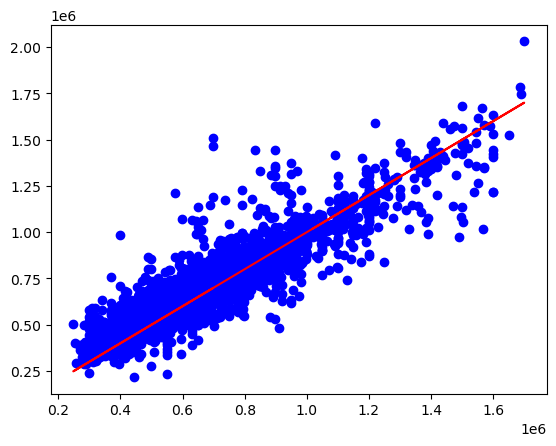

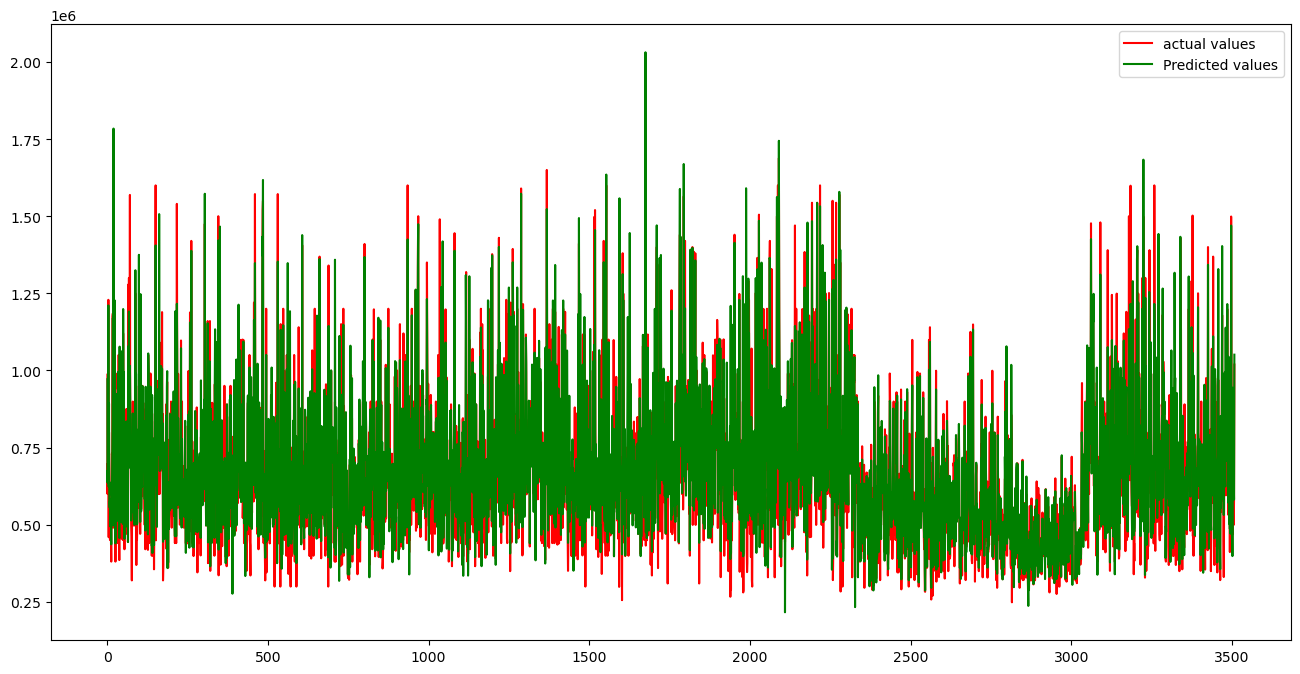

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 54477385728.0000 - mean_absolute_percentage_error: 21.5787 - mean_absolute_error: 145380.7031 - logcosh: 145380.0156
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 22341136384.0000 - mean_absolute_percentage_error: 15.0462 - mean_absolute_error: 103617.4297 - logcosh: 103616.7266
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 21543280640.0000 - mean_absolute_percentage_error: 14.6389 - mean_absolute_error: 101384.6484 - logcosh: 101383.9844
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 20696375296.0000 - mean_absolute_percentage_error: 14.2982 - mean_absolute_error: 99171.6797 - logcosh: 99170.9062
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 20435380224.0000 - mean_absolute_percentage_error: 14.1623 - m

987/987 [==============================] - 3s 3ms/step - loss: 15636941824.0000 - mean_absolute_percentage_error: 12.2534 - mean_absolute_error: 85156.5703 - logcosh: 85155.8359
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 15683937280.0000 - mean_absolute_percentage_error: 12.2625 - mean_absolute_error: 85211.4062 - logcosh: 85210.7109
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 15489691648.0000 - mean_absolute_percentage_error: 12.1358 - mean_absolute_error: 84474.3984 - logcosh: 84473.6484
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 15305031680.0000 - mean_absolute_percentage_error: 12.1527 - mean_absolute_error: 84256.9844 - logcosh: 84256.2656
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 15304226816.0000 - mean_absolute_percentage_error: 12.1479 - mean_absolute_error: 84322.1328 - logcosh: 84321.4141
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11412552704.0000 - mean_absolute_percentage_error: 10.4670 - mean_absolute_error: 72137.4297 - logcosh: 72136.7891
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 11500894208.0000 - mean_absolute_percentage_error: 10.4928 - mean_absolute_error: 72387.3750 - logcosh: 72386.6562
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 11417920512.0000 - mean_absolute_percentage_error: 10.5214 - mean_absolute_error: 72408.3828 - logcosh: 72407.7188
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 11308409856.0000 - mean_absolute_percentage_error: 10.4519 - mean_absolute_error: 71993.8281 - logcosh: 71993.1797
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 11116511232.0000 - mean_absolute_percentage_error: 10.3328 - mean_absolute_error: 71061.3828 - logcosh: 71060.7422
Epoch 90/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 8225670656.0000 - mean_absolute_percentage_error: 8.9204 - mean_absolute_error: 60686.7891 - logcosh: 60686.1367
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 8200778240.0000 - mean_absolute_percentage_error: 8.9430 - mean_absolute_error: 60892.6758 - logcosh: 60892.0234
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 7978491392.0000 - mean_absolute_percentage_error: 8.8168 - mean_absolute_error: 59924.6836 - logcosh: 59923.9883
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 7971051520.0000 - mean_absolute_percentage_error: 8.8092 - mean_absolute_error: 59835.5273 - logcosh: 59834.8906
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 7850101248.0000 - mean_absolute_percentage_error: 8.7764 - mean_absolute_error: 59616.6680 - logcosh: 59615.9727
Epoch 133/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 5972000768.0000 - mean_absolute_percentage_error: 7.5999 - mean_absolute_error: 51152.5273 - logcosh: 51151.8281
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 6043445248.0000 - mean_absolute_percentage_error: 7.6126 - mean_absolute_error: 51478.3477 - logcosh: 51477.6875
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 5973976064.0000 - mean_absolute_percentage_error: 7.5401 - mean_absolute_error: 50926.4141 - logcosh: 50925.7617
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 5990010880.0000 - mean_absolute_percentage_error: 7.6288 - mean_absolute_error: 51343.1953 - logcosh: 51342.5312
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 5800306688.0000 - mean_absolute_percentage_error: 7.4771 - mean_absolute_error: 50270.4766 - logcosh: 50269.8711
Epoch 176/200
987/987 [==============================] - 3s 3ms/

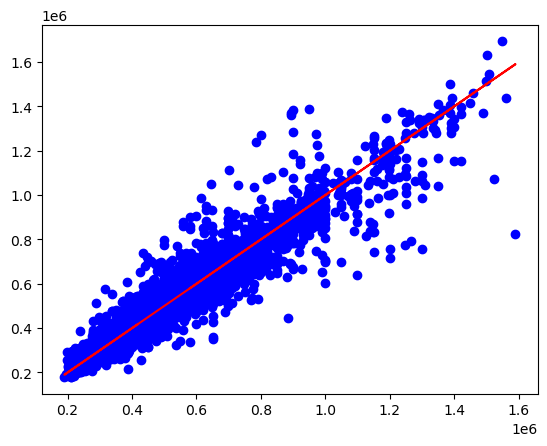

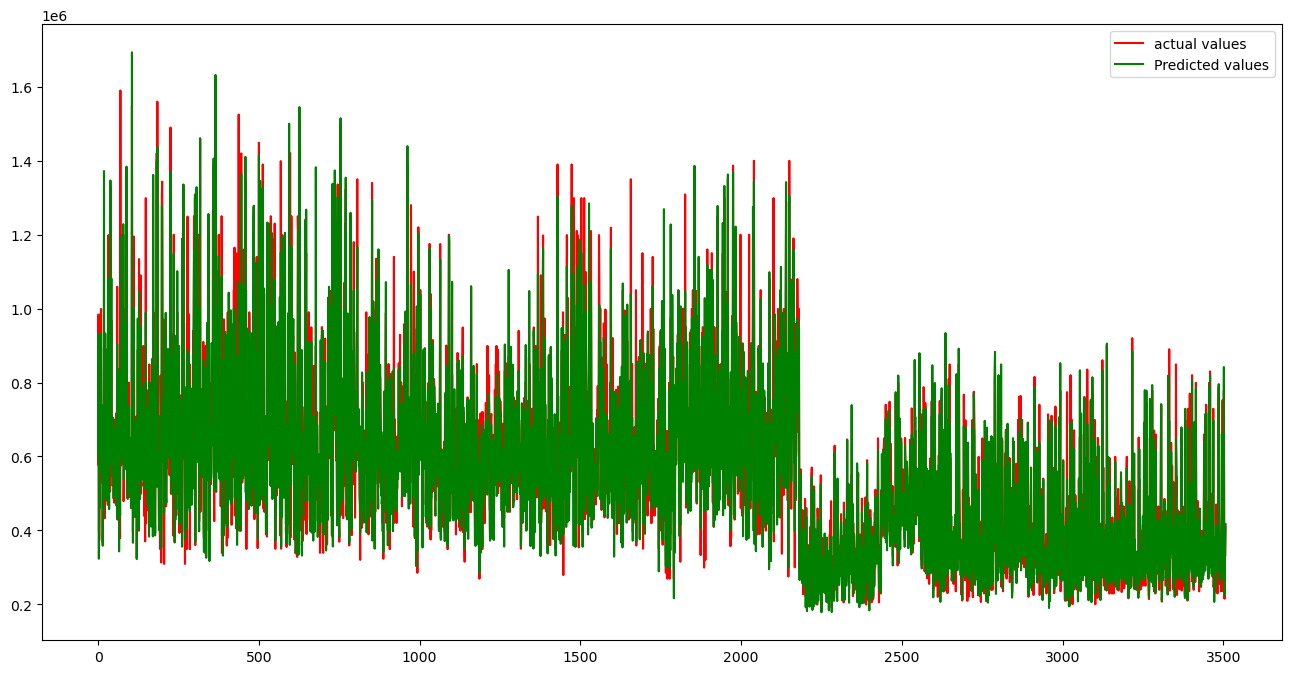

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 51524595712.0000 - mean_absolute_percentage_error: 21.3542 - mean_absolute_error: 140994.0625 - logcosh: 140993.4062
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 20819953664.0000 - mean_absolute_percentage_error: 14.8036 - mean_absolute_error: 99929.3047 - logcosh: 99928.7344
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 20050888704.0000 - mean_absolute_percentage_error: 14.4548 - mean_absolute_error: 97786.6953 - logcosh: 97786.0312
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 19454558208.0000 - mean_absolute_percentage_error: 14.1426 - mean_absolute_error: 95988.4922 - logcosh: 95987.7969
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 19233005568.0000 - mean_absolute_percentage_error: 14.0621 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 14835251200.0000 - mean_absolute_percentage_error: 12.1838 - mean_absolute_error: 82705.7578 - logcosh: 82705.0859
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 14726390784.0000 - mean_absolute_percentage_error: 12.1375 - mean_absolute_error: 82388.4297 - logcosh: 82387.7422
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 14707215360.0000 - mean_absolute_percentage_error: 12.1726 - mean_absolute_error: 82634.5391 - logcosh: 82633.8828
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 14463380480.0000 - mean_absolute_percentage_error: 12.0738 - mean_absolute_error: 81795.0703 - logcosh: 81794.3594
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 14521252864.0000 - mean_absolute_percentage_error: 12.0947 - mean_absolute_error: 82139.8359 - logcosh: 82139.1250
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11060837376.0000 - mean_absolute_percentage_error: 10.4845 - mean_absolute_error: 70671.1484 - logcosh: 70670.5156
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 11124347904.0000 - mean_absolute_percentage_error: 10.5510 - mean_absolute_error: 71191.1328 - logcosh: 71190.4141
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 10942085120.0000 - mean_absolute_percentage_error: 10.4846 - mean_absolute_error: 70584.1953 - logcosh: 70583.4375
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 10983949312.0000 - mean_absolute_percentage_error: 10.5406 - mean_absolute_error: 70949.6016 - logcosh: 70948.9688
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 10767424512.0000 - mean_absolute_percentage_error: 10.3964 - mean_absolute_error: 69949.5078 - logcosh: 69948.8281
Epoch 90/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 7945376768.0000 - mean_absolute_percentage_error: 8.9495 - mean_absolute_error: 59685.2188 - logcosh: 59684.5547
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 7799736832.0000 - mean_absolute_percentage_error: 8.8837 - mean_absolute_error: 59084.0352 - logcosh: 59083.3516
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 7885429248.0000 - mean_absolute_percentage_error: 8.9501 - mean_absolute_error: 59577.8008 - logcosh: 59577.1250
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 7799565824.0000 - mean_absolute_percentage_error: 8.8605 - mean_absolute_error: 59005.7695 - logcosh: 59005.0703
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 7639432704.0000 - mean_absolute_percentage_error: 8.7300 - mean_absolute_error: 58235.1602 - logcosh: 58234.4062
Epoch 133/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 5654126080.0000 - mean_absolute_percentage_error: 7.5021 - mean_absolute_error: 49456.9922 - logcosh: 49456.3008
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 5650815488.0000 - mean_absolute_percentage_error: 7.5524 - mean_absolute_error: 49751.0703 - logcosh: 49750.3555
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 5787659264.0000 - mean_absolute_percentage_error: 7.6122 - mean_absolute_error: 50293.7383 - logcosh: 50293.0273
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 5659241984.0000 - mean_absolute_percentage_error: 7.5792 - mean_absolute_error: 49913.5586 - logcosh: 49912.8789
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 5606381056.0000 - mean_absolute_percentage_error: 7.4981 - mean_absolute_error: 49417.9453 - logcosh: 49417.2617
Epoch 176/200
987/987 [==============================] - 3s 3ms/

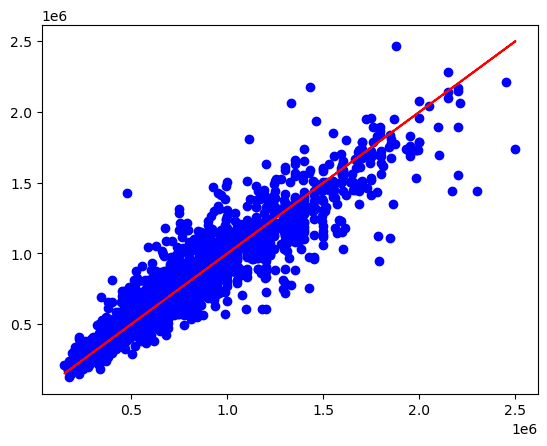

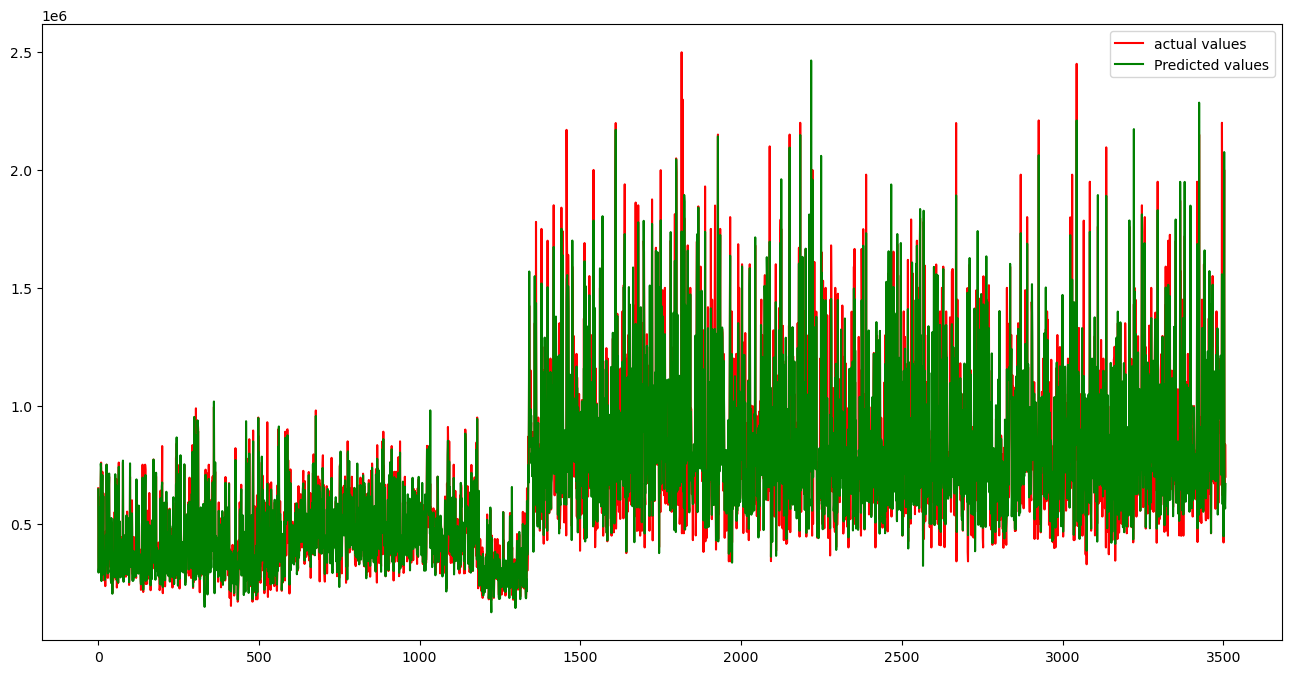

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 55269662720.0000 - mean_absolute_percentage_error: 22.0125 - mean_absolute_error: 145059.0000 - logcosh: 145058.3281
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 21031454720.0000 - mean_absolute_percentage_error: 14.8667 - mean_absolute_error: 99960.8672 - logcosh: 99960.2969
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 20098349056.0000 - mean_absolute_percentage_error: 14.4407 - mean_absolute_error: 97463.8594 - logcosh: 97463.2031
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 19553294336.0000 - mean_absolute_percentage_error: 14.1616 - mean_absolute_error: 95934.1016 - logcosh: 95933.4375
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 19219343360.0000 - mean_absolute_percentage_error: 13.9916 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 14859068416.0000 - mean_absolute_percentage_error: 12.1861 - mean_absolute_error: 82525.7578 - logcosh: 82525.1094
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 14720914432.0000 - mean_absolute_percentage_error: 12.1310 - mean_absolute_error: 82234.0625 - logcosh: 82233.3359
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 14866478080.0000 - mean_absolute_percentage_error: 12.2341 - mean_absolute_error: 82846.7109 - logcosh: 82846.0234
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 14327257088.0000 - mean_absolute_percentage_error: 11.9636 - mean_absolute_error: 81021.7031 - logcosh: 81020.9844
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 14419926016.0000 - mean_absolute_percentage_error: 12.0178 - mean_absolute_error: 81428.8281 - logcosh: 81428.1328
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11052017664.0000 - mean_absolute_percentage_error: 10.5170 - mean_absolute_error: 70801.3438 - logcosh: 70800.6797
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 10987886592.0000 - mean_absolute_percentage_error: 10.4722 - mean_absolute_error: 70615.9688 - logcosh: 70615.2891
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 10940843008.0000 - mean_absolute_percentage_error: 10.4505 - mean_absolute_error: 70322.2734 - logcosh: 70321.5625
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 10902484992.0000 - mean_absolute_percentage_error: 10.5161 - mean_absolute_error: 70775.0391 - logcosh: 70774.3438
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 10819302400.0000 - mean_absolute_percentage_error: 10.4692 - mean_absolute_error: 70365.5156 - logcosh: 70364.8672
Epoch 90/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 8080214016.0000 - mean_absolute_percentage_error: 8.9866 - mean_absolute_error: 59980.2188 - logcosh: 59979.5195
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 7890470400.0000 - mean_absolute_percentage_error: 8.8876 - mean_absolute_error: 59257.6953 - logcosh: 59257.0000
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 7936992256.0000 - mean_absolute_percentage_error: 8.9317 - mean_absolute_error: 59588.1328 - logcosh: 59587.4258
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 7898962944.0000 - mean_absolute_percentage_error: 8.9158 - mean_absolute_error: 59325.4805 - logcosh: 59324.8281
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 7683844096.0000 - mean_absolute_percentage_error: 8.7879 - mean_absolute_error: 58565.3242 - logcosh: 58564.6797
Epoch 133/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 5915330560.0000 - mean_absolute_percentage_error: 7.6498 - mean_absolute_error: 50651.4766 - logcosh: 50650.7852
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 5841924608.0000 - mean_absolute_percentage_error: 7.6124 - mean_absolute_error: 50377.6211 - logcosh: 50376.9531
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 5963750912.0000 - mean_absolute_percentage_error: 7.6767 - mean_absolute_error: 50867.0703 - logcosh: 50866.3594
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 5876025856.0000 - mean_absolute_percentage_error: 7.6605 - mean_absolute_error: 50675.7695 - logcosh: 50675.1406
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 5753395712.0000 - mean_absolute_percentage_error: 7.5318 - mean_absolute_error: 49871.2305 - logcosh: 49870.4922
Epoch 176/200
987/987 [==============================] - 3s 3ms/

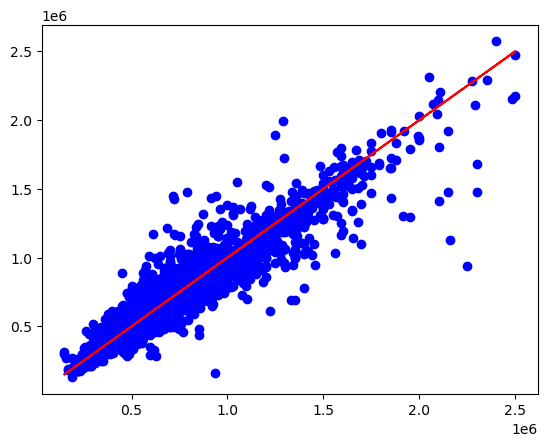

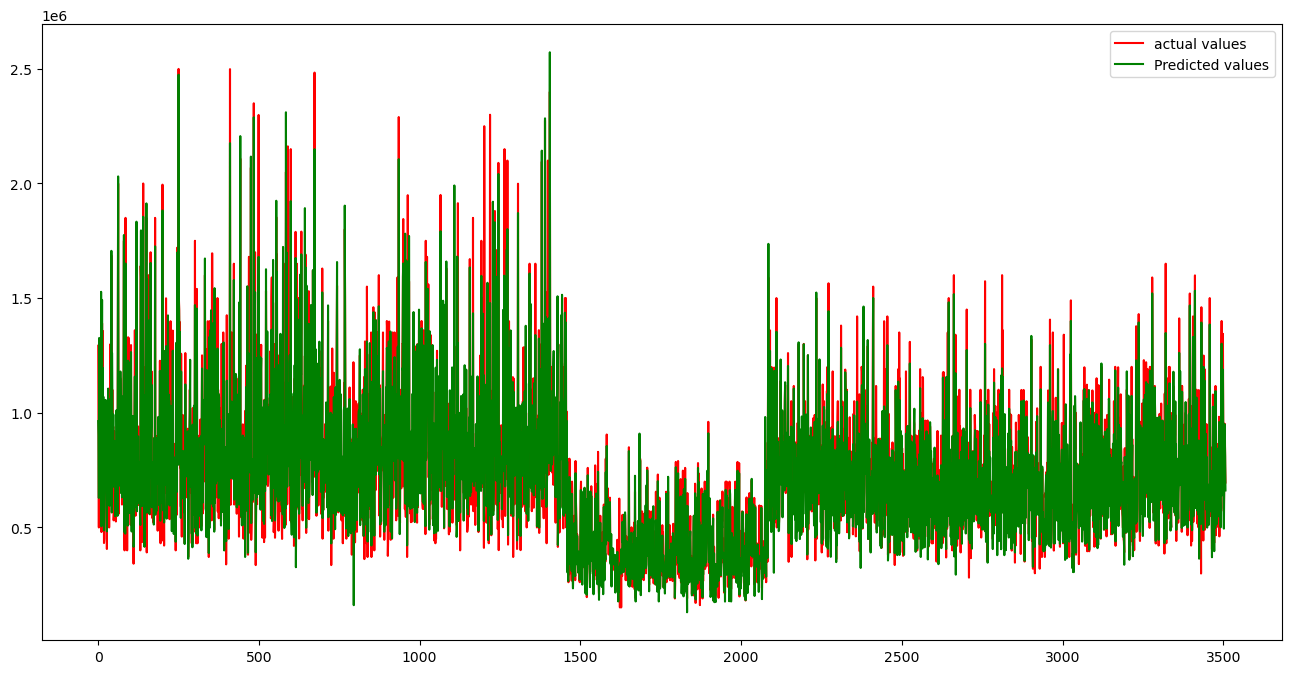

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 52071165952.0000 - mean_absolute_percentage_error: 21.2704 - mean_absolute_error: 141380.8125 - logcosh: 141380.1250
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 21804013568.0000 - mean_absolute_percentage_error: 14.8927 - mean_absolute_error: 101513.4766 - logcosh: 101512.8750
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 21218287616.0000 - mean_absolute_percentage_error: 14.6138 - mean_absolute_error: 99944.3438 - logcosh: 99943.7734
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 20392261632.0000 - mean_absolute_percentage_error: 14.2700 - mean_absolute_error: 97841.5859 - logcosh: 97840.9531
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 20032600064.0000 - mean_absolute_percentage_error: 14.0923 - mea

987/987 [==============================] - 3s 3ms/step - loss: 15583784960.0000 - mean_absolute_percentage_error: 12.3940 - mean_absolute_error: 84744.8125 - logcosh: 84744.1641
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 15671618560.0000 - mean_absolute_percentage_error: 12.4291 - mean_absolute_error: 85094.4062 - logcosh: 85093.6875
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 15456501760.0000 - mean_absolute_percentage_error: 12.3188 - mean_absolute_error: 84395.7656 - logcosh: 84395.1484
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 15099129856.0000 - mean_absolute_percentage_error: 12.2045 - mean_absolute_error: 83443.3438 - logcosh: 83442.6562
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 15081870336.0000 - mean_absolute_percentage_error: 12.2266 - mean_absolute_error: 83579.6328 - logcosh: 83578.9297
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 12289944576.0000 - mean_absolute_percentage_error: 11.0421 - mean_absolute_error: 75136.2812 - logcosh: 75135.5547
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 12328751104.0000 - mean_absolute_percentage_error: 10.9698 - mean_absolute_error: 74856.7031 - logcosh: 74856.0703
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 12181194752.0000 - mean_absolute_percentage_error: 10.9805 - mean_absolute_error: 74681.4141 - logcosh: 74680.6875
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 12248465408.0000 - mean_absolute_percentage_error: 11.0360 - mean_absolute_error: 75126.8281 - logcosh: 75126.1562
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 12147213312.0000 - mean_absolute_percentage_error: 11.0043 - mean_absolute_error: 74819.0703 - logcosh: 74818.3828
Epoch 90/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 9346356224.0000 - mean_absolute_percentage_error: 9.6985 - mean_absolute_error: 65405.6133 - logcosh: 65404.9023
Epoch 128/200
987/987 [==============================] - 3s 3ms/step - loss: 9256219648.0000 - mean_absolute_percentage_error: 9.6314 - mean_absolute_error: 64824.2383 - logcosh: 64823.5625
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 9371803648.0000 - mean_absolute_percentage_error: 9.6632 - mean_absolute_error: 65238.1172 - logcosh: 65237.4375
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 9259529216.0000 - mean_absolute_percentage_error: 9.6403 - mean_absolute_error: 64926.4102 - logcosh: 64925.7969
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 9136825344.0000 - mean_absolute_percentage_error: 9.5882 - mean_absolute_error: 64417.3750 - logcosh: 64416.6836
Epoch 132/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 6941033984.0000 - mean_absolute_percentage_error: 8.4101 - mean_absolute_error: 55907.7148 - logcosh: 55906.9844
Epoch 171/200
987/987 [==============================] - 3s 3ms/step - loss: 6921479168.0000 - mean_absolute_percentage_error: 8.3461 - mean_absolute_error: 55500.6367 - logcosh: 55499.9609
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 6821081088.0000 - mean_absolute_percentage_error: 8.3631 - mean_absolute_error: 55527.9648 - logcosh: 55527.2812
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 6905774080.0000 - mean_absolute_percentage_error: 8.3845 - mean_absolute_error: 55801.4531 - logcosh: 55800.7852
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 6904001536.0000 - mean_absolute_percentage_error: 8.3861 - mean_absolute_error: 55774.0078 - logcosh: 55773.3477
Epoch 175/200
987/987 [==============================] - 3s 3ms/

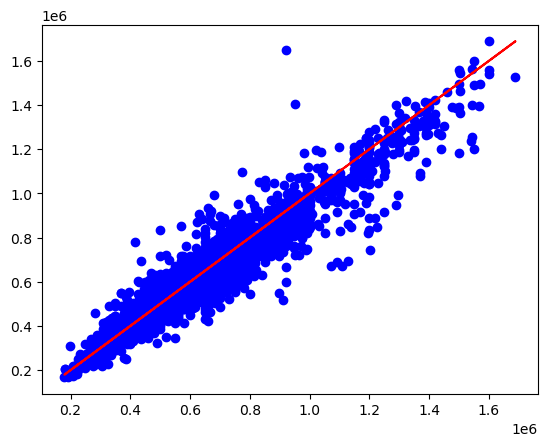

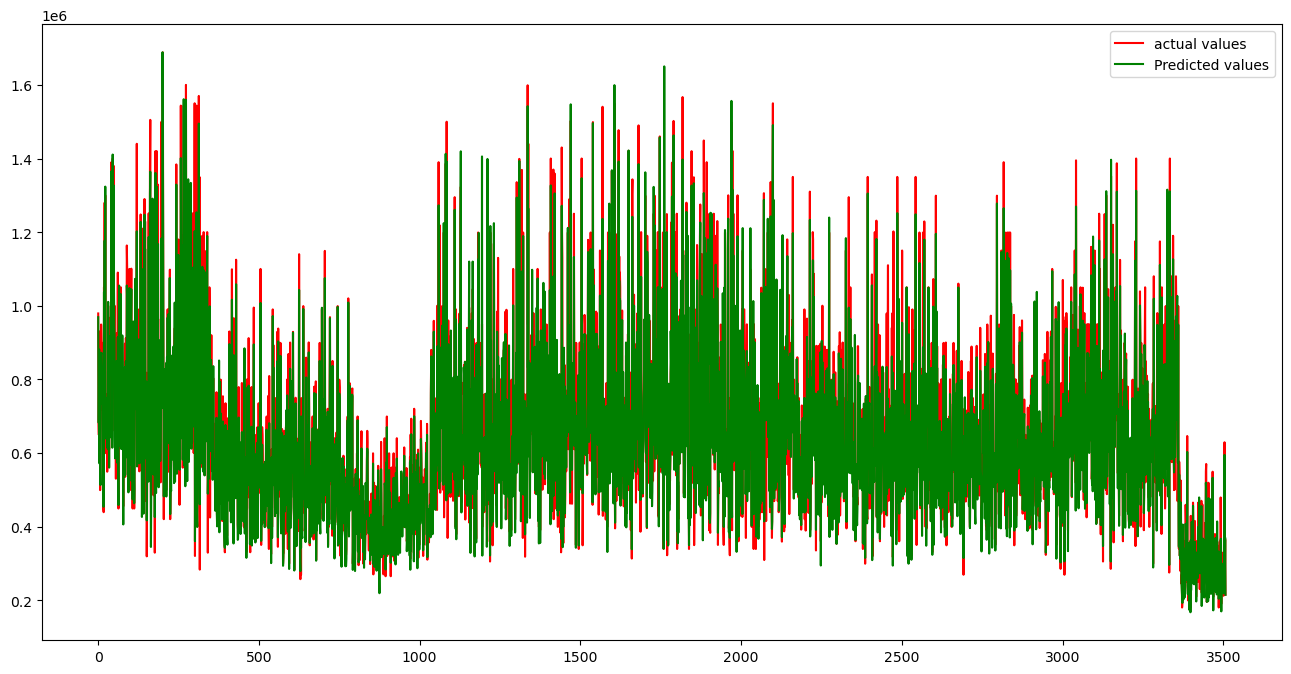

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 567308582912.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 686578.1250 - logcosh: 686577.5625
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 567306878976.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 686577.3750 - logcosh: 686576.6875
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 567305961472.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 686576.3125 - logcosh: 686575.3125
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 567304650752.0000 - mean_absolute_percentage_error: 99.9999 - mean_absolute_error: 686575.0000 - logcosh: 686574.3750
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 567303143424.0000 - mean_absolute_percentage_error: 9

987/987 [==============================] - 3s 3ms/step - loss: 567252942848.0000 - mean_absolute_percentage_error: 99.9924 - mean_absolute_error: 686537.7500 - logcosh: 686537.2500
Epoch 43/200
987/987 [==============================] - 3s 3ms/step - loss: 567251435520.0000 - mean_absolute_percentage_error: 99.9924 - mean_absolute_error: 686537.2500 - logcosh: 686536.5625
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 567250321408.0000 - mean_absolute_percentage_error: 99.9923 - mean_absolute_error: 686536.0625 - logcosh: 686535.4375
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 567248814080.0000 - mean_absolute_percentage_error: 99.9922 - mean_absolute_error: 686534.3750 - logcosh: 686533.7500
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 567247699968.0000 - mean_absolute_percentage_error: 99.9922 - mean_absolute_error: 686534.1875 - logcosh: 686533.4375
Epoch 47/200
987/987 [=====================

987/987 [==============================] - 3s 3ms/step - loss: 567196319744.0000 - mean_absolute_percentage_error: 99.9851 - mean_absolute_error: 686496.6250 - logcosh: 686495.8125
Epoch 85/200
987/987 [==============================] - 3s 3ms/step - loss: 567195402240.0000 - mean_absolute_percentage_error: 99.9850 - mean_absolute_error: 686495.1875 - logcosh: 686494.5625
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 567193632768.0000 - mean_absolute_percentage_error: 99.9848 - mean_absolute_error: 686494.3750 - logcosh: 686493.6250
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 567192518656.0000 - mean_absolute_percentage_error: 99.9847 - mean_absolute_error: 686493.6250 - logcosh: 686492.8125
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 567190683648.0000 - mean_absolute_percentage_error: 99.9846 - mean_absolute_error: 686492.8125 - logcosh: 686492.1875
Epoch 89/200
987/987 [=====================

987/987 [==============================] - 3s 3ms/step - loss: 567139565568.0000 - mean_absolute_percentage_error: 99.9779 - mean_absolute_error: 686455.0625 - logcosh: 686454.5625
Epoch 127/200
987/987 [==============================] - 3s 3ms/step - loss: 567138123776.0000 - mean_absolute_percentage_error: 99.9777 - mean_absolute_error: 686453.8750 - logcosh: 686453.2500
Epoch 128/200
987/987 [==============================] - 3s 3ms/step - loss: 567137402880.0000 - mean_absolute_percentage_error: 99.9776 - mean_absolute_error: 686453.6875 - logcosh: 686452.9375
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 567135830016.0000 - mean_absolute_percentage_error: 99.9774 - mean_absolute_error: 686452.1875 - logcosh: 686451.7500
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 567134322688.0000 - mean_absolute_percentage_error: 99.9773 - mean_absolute_error: 686451.7500 - logcosh: 686451.0000
Epoch 131/200
987/987 [================

987/987 [==============================] - 3s 3ms/step - loss: 567083139072.0000 - mean_absolute_percentage_error: 99.9709 - mean_absolute_error: 686413.6250 - logcosh: 686412.8750
Epoch 169/200
987/987 [==============================] - 3s 3ms/step - loss: 567081435136.0000 - mean_absolute_percentage_error: 99.9706 - mean_absolute_error: 686412.8750 - logcosh: 686412.1250
Epoch 170/200
987/987 [==============================] - 3s 3ms/step - loss: 567080386560.0000 - mean_absolute_percentage_error: 99.9704 - mean_absolute_error: 686412.1250 - logcosh: 686411.4375
Epoch 171/200
987/987 [==============================] - 3s 3ms/step - loss: 567078551552.0000 - mean_absolute_percentage_error: 99.9703 - mean_absolute_error: 686410.4375 - logcosh: 686410.0000
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 567077765120.0000 - mean_absolute_percentage_error: 99.9702 - mean_absolute_error: 686409.8125 - logcosh: 686409.0625
Epoch 173/200
987/987 [================

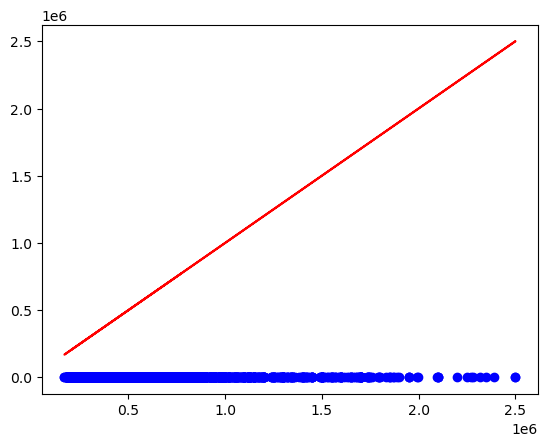

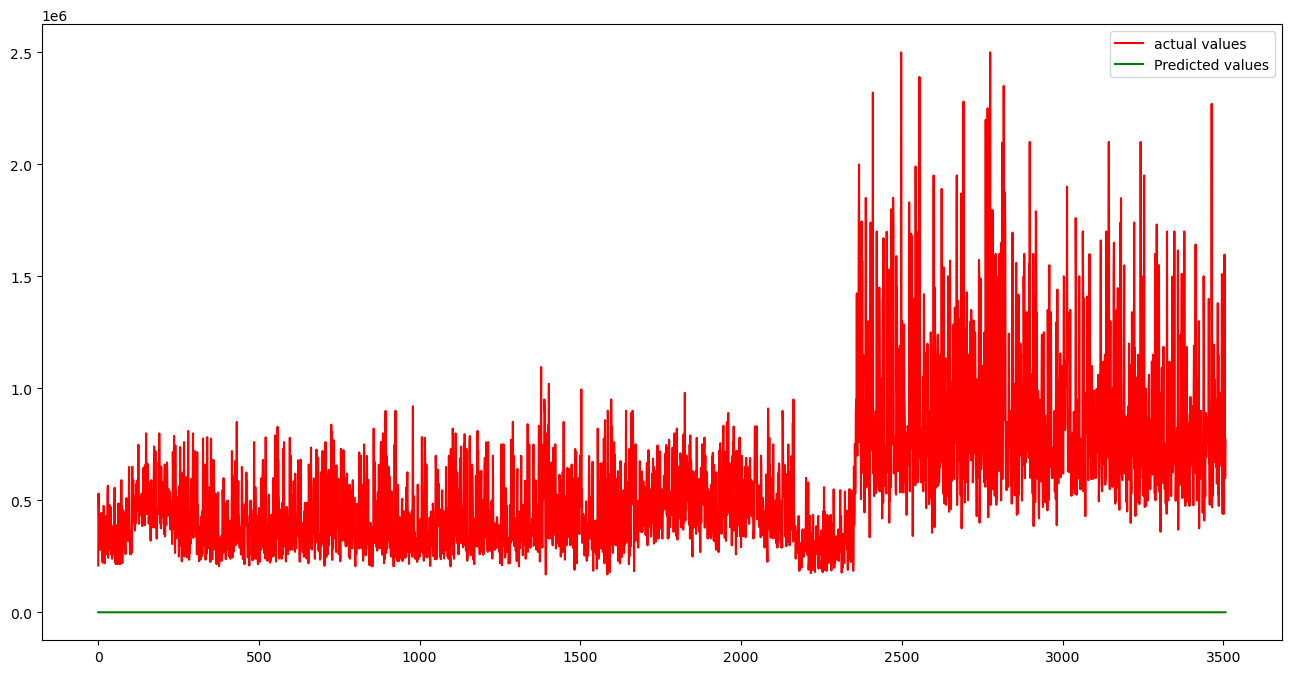

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/200
987/987 [==============================] - 4s 3ms/step - loss: 47258390528.0000 - mean_absolute_percentage_error: 20.7274 - mean_absolute_error: 135305.6406 - logcosh: 135304.9688
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 20497360896.0000 - mean_absolute_percentage_error: 14.8187 - mean_absolute_error: 98809.6406 - logcosh: 98808.9766
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 19662069760.0000 - mean_absolute_percentage_error: 14.4457 - mean_absolute_error: 96435.7969 - logcosh: 96435.1328
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 18841145344.0000 - mean_absolute_percentage_error: 14.0780 - mean_absolute_error: 94201.0859 - logcosh: 94200.3516
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 18601496576.0000 - mean_absolute_percentage_error: 13.9980 - mean_

987/987 [==============================] - 3s 3ms/step - loss: 14246277120.0000 - mean_absolute_percentage_error: 12.1198 - mean_absolute_error: 80967.5000 - logcosh: 80966.7188
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 14547747840.0000 - mean_absolute_percentage_error: 12.2221 - mean_absolute_error: 81801.6719 - logcosh: 81800.9609
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 14126486528.0000 - mean_absolute_percentage_error: 11.9902 - mean_absolute_error: 80259.4062 - logcosh: 80258.7500
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 13969860608.0000 - mean_absolute_percentage_error: 11.9712 - mean_absolute_error: 80133.3750 - logcosh: 80132.6953
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 13974440960.0000 - mean_absolute_percentage_error: 11.9826 - mean_absolute_error: 80057.9844 - logcosh: 80057.3047
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11225196544.0000 - mean_absolute_percentage_error: 10.6698 - mean_absolute_error: 71304.5234 - logcosh: 71303.8047
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 11182972928.0000 - mean_absolute_percentage_error: 10.5660 - mean_absolute_error: 70769.1641 - logcosh: 70768.5000
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 11089040384.0000 - mean_absolute_percentage_error: 10.5829 - mean_absolute_error: 70680.8203 - logcosh: 70680.0703
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 11065873408.0000 - mean_absolute_percentage_error: 10.5939 - mean_absolute_error: 70772.8438 - logcosh: 70772.0938
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 10862364672.0000 - mean_absolute_percentage_error: 10.4338 - mean_absolute_error: 69698.7891 - logcosh: 69698.1172
Epoch 90/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 8455561728.0000 - mean_absolute_percentage_error: 9.1458 - mean_absolute_error: 60766.2656 - logcosh: 60765.5703
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 8447452160.0000 - mean_absolute_percentage_error: 9.1379 - mean_absolute_error: 60902.6211 - logcosh: 60901.9023
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 8316237312.0000 - mean_absolute_percentage_error: 9.0880 - mean_absolute_error: 60348.5625 - logcosh: 60347.8711
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 8100137984.0000 - mean_absolute_percentage_error: 9.0396 - mean_absolute_error: 59970.7734 - logcosh: 59970.1250
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 8206596096.0000 - mean_absolute_percentage_error: 9.0480 - mean_absolute_error: 60156.9375 - logcosh: 60156.1875
Epoch 133/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 6280214528.0000 - mean_absolute_percentage_error: 7.8345 - mean_absolute_error: 51709.2031 - logcosh: 51708.5352
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 6067022848.0000 - mean_absolute_percentage_error: 7.7644 - mean_absolute_error: 51119.4023 - logcosh: 51118.7070
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 6047310848.0000 - mean_absolute_percentage_error: 7.7135 - mean_absolute_error: 50803.4570 - logcosh: 50802.8008
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 6010436096.0000 - mean_absolute_percentage_error: 7.6899 - mean_absolute_error: 50656.6406 - logcosh: 50655.9414
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 5821061632.0000 - mean_absolute_percentage_error: 7.6156 - mean_absolute_error: 50085.4102 - logcosh: 50084.7031
Epoch 176/200
987/987 [==============================] - 3s 3ms/

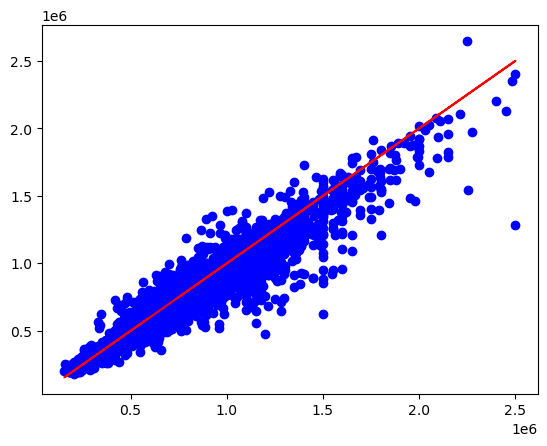

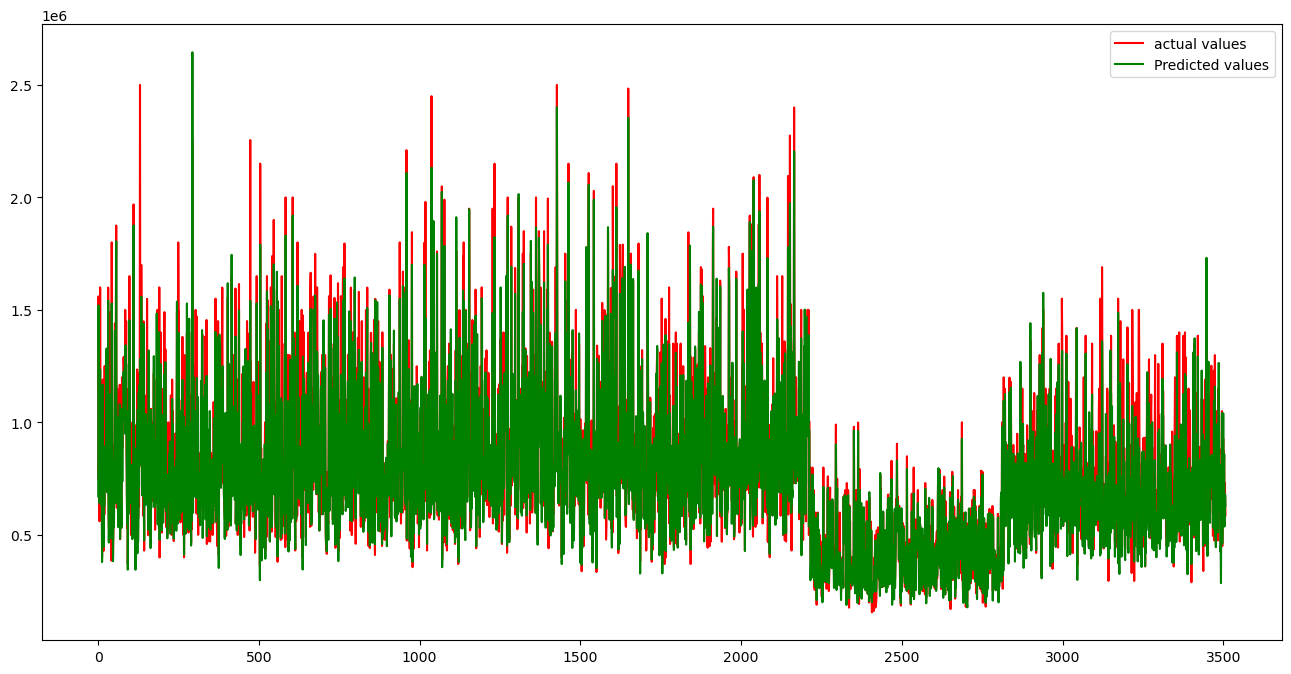

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 56261992448.0000 - mean_absolute_percentage_error: 22.0735 - mean_absolute_error: 146255.2969 - logcosh: 146254.5312
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 22005202944.0000 - mean_absolute_percentage_error: 15.0738 - mean_absolute_error: 101976.4375 - logcosh: 101975.7578
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 21217828864.0000 - mean_absolute_percentage_error: 14.6335 - mean_absolute_error: 99535.6484 - logcosh: 99534.8984
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 20067590144.0000 - mean_absolute_percentage_error: 14.1472 - mean_absolute_error: 96392.3203 - logcosh: 96391.6875
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 19911489536.0000 - mean_absolute_percentage_error: 14.1151 - mea

987/987 [==============================] - 3s 3ms/step - loss: 15235926016.0000 - mean_absolute_percentage_error: 12.2521 - mean_absolute_error: 83269.2266 - logcosh: 83268.6094
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 15229704192.0000 - mean_absolute_percentage_error: 12.2237 - mean_absolute_error: 83273.8828 - logcosh: 83273.2109
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 14982729728.0000 - mean_absolute_percentage_error: 12.1043 - mean_absolute_error: 82410.6797 - logcosh: 82410.0938
Epoch 46/200
987/987 [==============================] - 3s 3ms/step - loss: 14942867456.0000 - mean_absolute_percentage_error: 12.1218 - mean_absolute_error: 82557.2812 - logcosh: 82556.5781
Epoch 47/200
987/987 [==============================] - 3s 3ms/step - loss: 14818323456.0000 - mean_absolute_percentage_error: 12.0611 - mean_absolute_error: 82136.6562 - logcosh: 82135.9062
Epoch 48/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 11241999360.0000 - mean_absolute_percentage_error: 10.5745 - mean_absolute_error: 71305.9219 - logcosh: 71305.2344
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 11471833088.0000 - mean_absolute_percentage_error: 10.6329 - mean_absolute_error: 71877.1641 - logcosh: 71876.4453
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 11207666688.0000 - mean_absolute_percentage_error: 10.5682 - mean_absolute_error: 71319.6328 - logcosh: 71318.9453
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 11030756352.0000 - mean_absolute_percentage_error: 10.5345 - mean_absolute_error: 70991.0391 - logcosh: 70990.3750
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 11042650112.0000 - mean_absolute_percentage_error: 10.4806 - mean_absolute_error: 70619.7344 - logcosh: 70619.0625
Epoch 90/200
987/987 [==============================] - 3s

987/987 [==============================] - 3s 3ms/step - loss: 7832992256.0000 - mean_absolute_percentage_error: 8.9322 - mean_absolute_error: 59344.1484 - logcosh: 59343.4336
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 7976058880.0000 - mean_absolute_percentage_error: 8.9767 - mean_absolute_error: 59720.1758 - logcosh: 59719.4688
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 7675971072.0000 - mean_absolute_percentage_error: 8.8477 - mean_absolute_error: 58682.1602 - logcosh: 58681.4844
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 7572721152.0000 - mean_absolute_percentage_error: 8.8098 - mean_absolute_error: 58392.5664 - logcosh: 58391.8633
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 7576050688.0000 - mean_absolute_percentage_error: 8.7627 - mean_absolute_error: 58230.2734 - logcosh: 58229.5820
Epoch 133/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 5808952832.0000 - mean_absolute_percentage_error: 7.6104 - mean_absolute_error: 50389.8203 - logcosh: 50389.1289
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 5709521920.0000 - mean_absolute_percentage_error: 7.6058 - mean_absolute_error: 50133.9023 - logcosh: 50133.2227
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 5759112704.0000 - mean_absolute_percentage_error: 7.5838 - mean_absolute_error: 50093.8906 - logcosh: 50093.1641
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 5773794816.0000 - mean_absolute_percentage_error: 7.6211 - mean_absolute_error: 50263.1484 - logcosh: 50262.5234
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 5618757632.0000 - mean_absolute_percentage_error: 7.5288 - mean_absolute_error: 49576.2344 - logcosh: 49575.5508
Epoch 176/200
987/987 [==============================] - 3s 3ms/

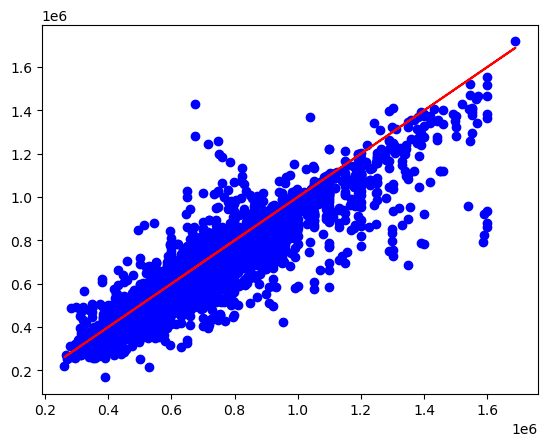

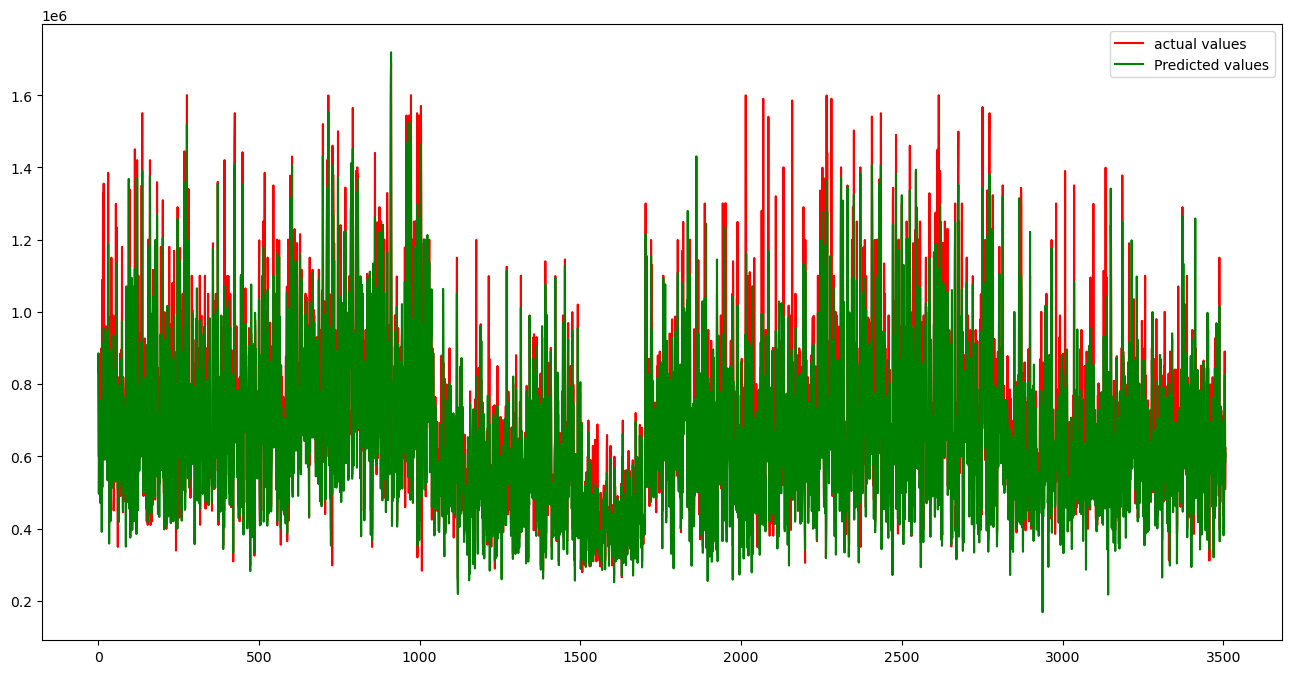

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 573615243264.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 689880.3750 - logcosh: 689879.8125
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 573613604864.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 689879.8750 - logcosh: 689879.1250
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 573612490752.0000 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 689878.7500 - logcosh: 689878.0625
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 573610721280.0000 - mean_absolute_percentage_error: 99.9999 - mean_absolute_error: 689877.6875 - logcosh: 689877.2500
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 573609869312.0000 - mean_absolute_percentage_error: 9

987/987 [==============================] - 3s 3ms/step - loss: 573559537664.0000 - mean_absolute_percentage_error: 99.9924 - mean_absolute_error: 689840.5000 - logcosh: 689839.7500
Epoch 43/200
987/987 [==============================] - 3s 3ms/step - loss: 573558751232.0000 - mean_absolute_percentage_error: 99.9923 - mean_absolute_error: 689839.3750 - logcosh: 689838.5625
Epoch 44/200
987/987 [==============================] - 3s 3ms/step - loss: 573556981760.0000 - mean_absolute_percentage_error: 99.9923 - mean_absolute_error: 689838.5625 - logcosh: 689838.0625
Epoch 45/200
987/987 [==============================] - 3s 3ms/step - loss: 573555343360.0000 - mean_absolute_percentage_error: 99.9922 - mean_absolute_error: 689837.5000 - logcosh: 689836.6250
Epoch 46/200
987/987 [==============================] - 2s 3ms/step - loss: 573554360320.0000 - mean_absolute_percentage_error: 99.9922 - mean_absolute_error: 689836.3125 - logcosh: 689835.5000
Epoch 47/200
987/987 [=====================

987/987 [==============================] - 3s 3ms/step - loss: 573502390272.0000 - mean_absolute_percentage_error: 99.9851 - mean_absolute_error: 689799.3750 - logcosh: 689798.7500
Epoch 85/200
987/987 [==============================] - 2s 3ms/step - loss: 573501276160.0000 - mean_absolute_percentage_error: 99.9850 - mean_absolute_error: 689798.2500 - logcosh: 689797.3750
Epoch 86/200
987/987 [==============================] - 2s 3ms/step - loss: 573500096512.0000 - mean_absolute_percentage_error: 99.9849 - mean_absolute_error: 689797.6250 - logcosh: 689797.0625
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 573498589184.0000 - mean_absolute_percentage_error: 99.9847 - mean_absolute_error: 689796.2500 - logcosh: 689795.6875
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 573497081856.0000 - mean_absolute_percentage_error: 99.9847 - mean_absolute_error: 689795.4375 - logcosh: 689794.8125
Epoch 89/200
987/987 [=====================

987/987 [==============================] - 3s 3ms/step - loss: 573445505024.0000 - mean_absolute_percentage_error: 99.9780 - mean_absolute_error: 689758.0000 - logcosh: 689757.0625
Epoch 127/200
987/987 [==============================] - 3s 3ms/step - loss: 573444063232.0000 - mean_absolute_percentage_error: 99.9778 - mean_absolute_error: 689756.8750 - logcosh: 689755.8750
Epoch 128/200
987/987 [==============================] - 3s 3ms/step - loss: 573442686976.0000 - mean_absolute_percentage_error: 99.9777 - mean_absolute_error: 689755.9375 - logcosh: 689755.0625
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 573441441792.0000 - mean_absolute_percentage_error: 99.9775 - mean_absolute_error: 689754.7500 - logcosh: 689754.0000
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 573439541248.0000 - mean_absolute_percentage_error: 99.9774 - mean_absolute_error: 689753.7500 - logcosh: 689753.1250
Epoch 131/200
987/987 [================

987/987 [==============================] - 3s 3ms/step - loss: 573388619776.0000 - mean_absolute_percentage_error: 99.9709 - mean_absolute_error: 689716.3125 - logcosh: 689715.5625
Epoch 169/200
987/987 [==============================] - 3s 3ms/step - loss: 573387243520.0000 - mean_absolute_percentage_error: 99.9707 - mean_absolute_error: 689715.2500 - logcosh: 689714.5625
Epoch 170/200
987/987 [==============================] - 3s 3ms/step - loss: 573385998336.0000 - mean_absolute_percentage_error: 99.9706 - mean_absolute_error: 689714.8750 - logcosh: 689714.1875
Epoch 171/200
987/987 [==============================] - 3s 3ms/step - loss: 573384228864.0000 - mean_absolute_percentage_error: 99.9704 - mean_absolute_error: 689714.4375 - logcosh: 689713.3750
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 573382983680.0000 - mean_absolute_percentage_error: 99.9703 - mean_absolute_error: 689712.9375 - logcosh: 689712.1875
Epoch 173/200
987/987 [================

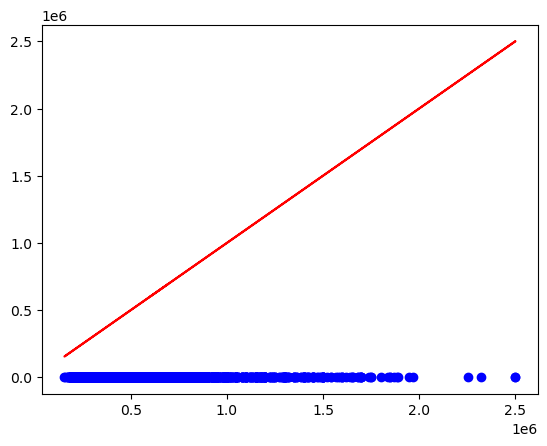

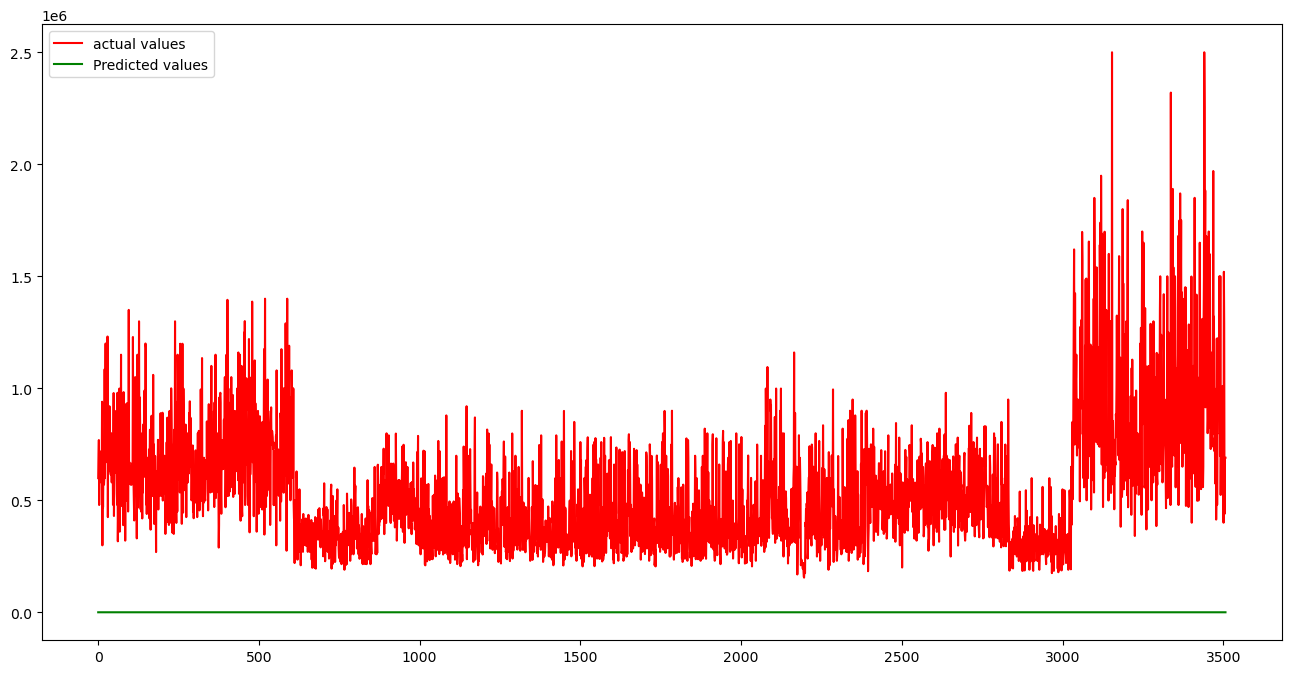

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/200
987/987 [==============================] - 3s 3ms/step - loss: 48796643328.0000 - mean_absolute_percentage_error: 20.9293 - mean_absolute_error: 136420.6719 - logcosh: 136420.0469
Epoch 2/200
987/987 [==============================] - 3s 3ms/step - loss: 19823869952.0000 - mean_absolute_percentage_error: 14.6242 - mean_absolute_error: 97065.1953 - logcosh: 97064.4375
Epoch 3/200
987/987 [==============================] - 3s 3ms/step - loss: 19362813952.0000 - mean_absolute_percentage_error: 14.4412 - mean_absolute_error: 95917.6172 - logcosh: 95916.8594
Epoch 4/200
987/987 [==============================] - 3s 3ms/step - loss: 18477012992.0000 - mean_absolute_percentage_error: 14.0490 - mean_absolute_error: 93577.1953 - logcosh: 93576.4609
Epoch 5/200
987/987 [==============================] - 3s 3ms/step - loss: 18388109312.0000 - mean_absolute_percentage_error: 14.0175 - mean

987/987 [==============================] - 3s 3ms/step - loss: 13707886592.0000 - mean_absolute_percentage_error: 12.0500 - mean_absolute_error: 79987.5391 - logcosh: 79986.8750
Epoch 44/200
987/987 [==============================] - 2s 3ms/step - loss: 13494318080.0000 - mean_absolute_percentage_error: 11.8680 - mean_absolute_error: 78972.2969 - logcosh: 78971.5469
Epoch 45/200
987/987 [==============================] - 2s 3ms/step - loss: 13398602752.0000 - mean_absolute_percentage_error: 11.8474 - mean_absolute_error: 78715.7188 - logcosh: 78714.9922
Epoch 46/200
987/987 [==============================] - 2s 3ms/step - loss: 13230312448.0000 - mean_absolute_percentage_error: 11.7256 - mean_absolute_error: 78046.6016 - logcosh: 78045.8984
Epoch 47/200
987/987 [==============================] - 2s 3ms/step - loss: 13207921664.0000 - mean_absolute_percentage_error: 11.7576 - mean_absolute_error: 78073.5000 - logcosh: 78072.8203
Epoch 48/200
987/987 [==============================] - 2s

987/987 [==============================] - 3s 3ms/step - loss: 9823063040.0000 - mean_absolute_percentage_error: 10.1857 - mean_absolute_error: 66898.2891 - logcosh: 66897.6250
Epoch 86/200
987/987 [==============================] - 3s 3ms/step - loss: 9934906368.0000 - mean_absolute_percentage_error: 10.2778 - mean_absolute_error: 67535.6406 - logcosh: 67534.9453
Epoch 87/200
987/987 [==============================] - 3s 3ms/step - loss: 9859542016.0000 - mean_absolute_percentage_error: 10.2426 - mean_absolute_error: 67213.2266 - logcosh: 67212.4844
Epoch 88/200
987/987 [==============================] - 3s 3ms/step - loss: 9733584896.0000 - mean_absolute_percentage_error: 10.1827 - mean_absolute_error: 66914.6172 - logcosh: 66913.9375
Epoch 89/200
987/987 [==============================] - 3s 3ms/step - loss: 9608769536.0000 - mean_absolute_percentage_error: 10.1200 - mean_absolute_error: 66456.7266 - logcosh: 66455.9922
Epoch 90/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 7102153216.0000 - mean_absolute_percentage_error: 8.7360 - mean_absolute_error: 56657.2617 - logcosh: 56656.5625
Epoch 129/200
987/987 [==============================] - 3s 3ms/step - loss: 7117998592.0000 - mean_absolute_percentage_error: 8.7978 - mean_absolute_error: 57073.9453 - logcosh: 57073.2656
Epoch 130/200
987/987 [==============================] - 3s 3ms/step - loss: 6854576128.0000 - mean_absolute_percentage_error: 8.6172 - mean_absolute_error: 55768.7148 - logcosh: 55768.0156
Epoch 131/200
987/987 [==============================] - 3s 3ms/step - loss: 6830996480.0000 - mean_absolute_percentage_error: 8.6066 - mean_absolute_error: 55608.5391 - logcosh: 55607.8398
Epoch 132/200
987/987 [==============================] - 3s 3ms/step - loss: 6846829568.0000 - mean_absolute_percentage_error: 8.6142 - mean_absolute_error: 55745.4141 - logcosh: 55744.7305
Epoch 133/200
987/987 [==============================] - 3s 3ms/

987/987 [==============================] - 3s 3ms/step - loss: 5275385856.0000 - mean_absolute_percentage_error: 7.5344 - mean_absolute_error: 48436.6914 - logcosh: 48436.0234
Epoch 172/200
987/987 [==============================] - 3s 3ms/step - loss: 5140859392.0000 - mean_absolute_percentage_error: 7.4117 - mean_absolute_error: 47631.6016 - logcosh: 47630.9141
Epoch 173/200
987/987 [==============================] - 3s 3ms/step - loss: 5114597376.0000 - mean_absolute_percentage_error: 7.4205 - mean_absolute_error: 47564.8711 - logcosh: 47564.1719
Epoch 174/200
987/987 [==============================] - 3s 3ms/step - loss: 5200356864.0000 - mean_absolute_percentage_error: 7.4860 - mean_absolute_error: 48136.7891 - logcosh: 48136.1367
Epoch 175/200
987/987 [==============================] - 3s 3ms/step - loss: 5124775424.0000 - mean_absolute_percentage_error: 7.4285 - mean_absolute_error: 47725.1797 - logcosh: 47724.4062
Epoch 176/200
987/987 [==============================] - 3s 3ms/

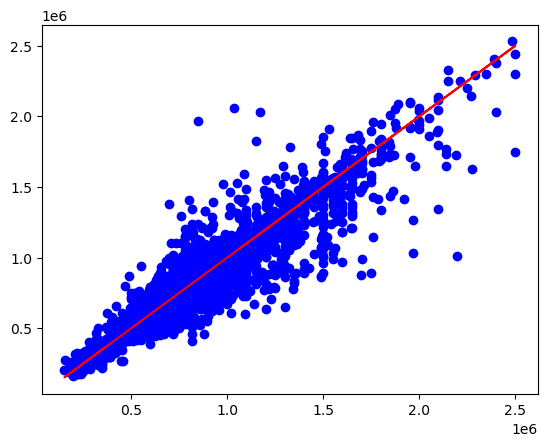

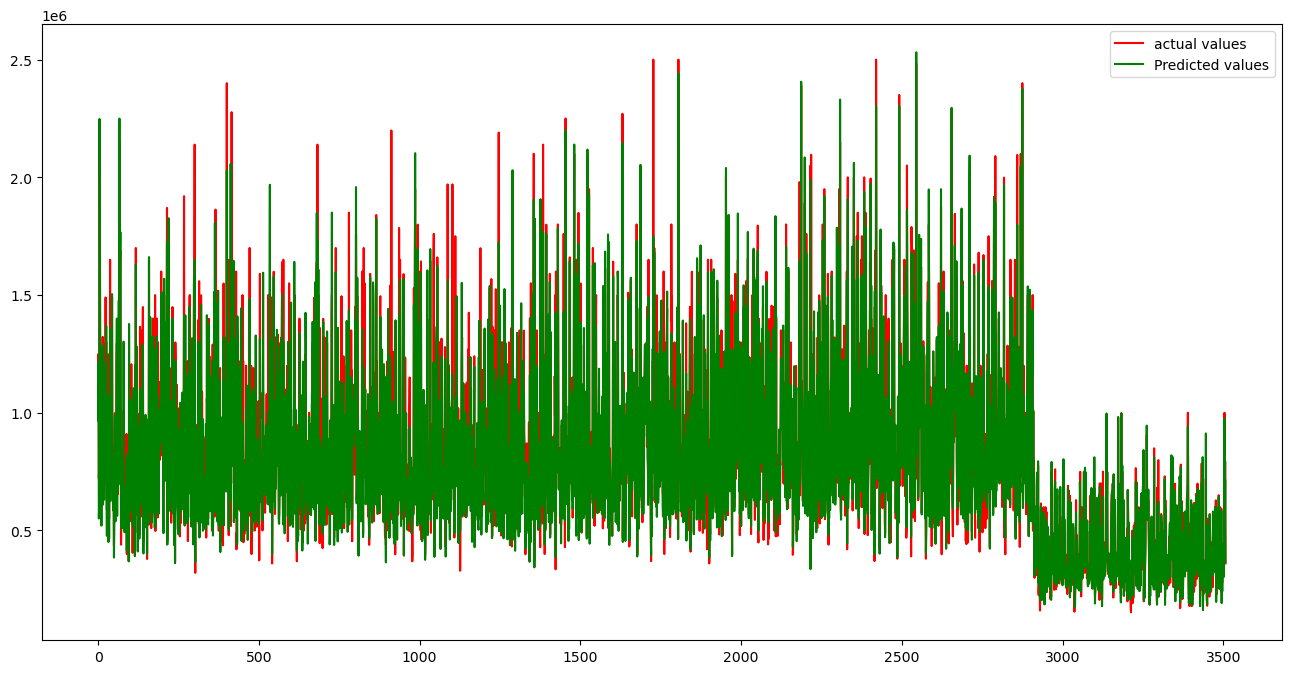

In [14]:
kfold = KFold(n_splits=10)
fold_no = 1
stats = []
for train, test in kfold.split(features, labels):
    model = create_model(25)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(features[train], 
                        labels[train], 
                        epochs = 200)
    #model.save('model' + str(fold_no) + '.keras')
    scores = model.evaluate(features[test], labels[test])
    preds_house = model.predict(features[test])
    print('R score is :', r2_score(labels[test], preds_house))
    print('Test metrics: ', scores)
    stats.append(scores)
    stats[fold_no-1].append(r2_score(labels[test], preds_house))
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1

In [15]:
stats_df = pd.DataFrame(stats)
stats_df = stats_df.rename(columns={0:'Mean squared error', 1:'Mean absolute percentage error', 2:'Mean absolute error', 3:'LogCosH', 4:'R2'})
stats_df.describe()

Mean squared error  Mean absolute percentage error  \
count               10.00                           10.00   
mean       90022892697.60                           27.95   
std       165603615848.91                           37.96   
min         5418358272.00                            7.91   
25%        10517167616.00                            9.78   
50%        13484132352.00                           10.64   
75%        17652593408.00                           10.74   
max       431493545984.00                           99.96   

       Mean absolute error   LogCosH    R2  
count                10.00     10.00 10.00  
mean             167595.69 167595.01 -0.01  
std              207001.58 207001.59  1.86  
min               51262.90  51262.20 -3.80  
25%               67695.42  67694.73  0.79  
50%               75132.93  75132.24  0.87  
75%               85300.46  85299.76  0.89  
max              574404.31 574403.56  0.91

# Trenowanie sieci na danych zawierających outlayery

In [ ]:
data_ALL_outlayers = pd.read_csv("data_ALL_outlayers.csv")
data_ALL_outlayers.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL_outlayers

In [ ]:
features = data_ALL_outlayers
labels = features.pop('price')

features = features.to_numpy()
labels = labels.to_numpy()

In [ ]:
kfold = KFold(n_splits=10)
fold_no = 1
for train, test in kfold.split(features, labels):
    model = create_model(25)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(features[train], 
                        labels[train], 
                        epochs = 100)
    #model.save('model' + str(fold_no) + '.keras')
    scores = model.evaluate(features[test], labels[test])
    preds_house = model.predict(features[test])
    print('R score is :', r2_score(labels[test], preds_house))
    print('Test metrics: ', scores)
    stats.append(scores)
    stats[fold_no-1].append(r2_score(labels[test], preds_house))
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1

In [ ]:
stats_df = pd.DataFrame(stats)
stats_df = stats_df.rename(columns={0:'Mean squared error', 1:'Mean absolute percentage error', 2:'Mean absolute error', 3:'LogCosH', 4:'R2'})
stats_df.describe()